In [142]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re

## Link Dataset
https://www.kaggle.com/datasets/pradeepjangirml007/laptop-data-set

In [143]:
df = pd.read_csv("laptop.csv")
df

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,22990,MediaTek Octa-core,MediaTek,Not Expandable,4 GB,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,21990,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB LP,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3971,4403,ASUS,ASUS Zenbook UX430UN-GV022T Laptop (14 Inch | ...,84990,Intel Core i5 (8th Gen),Intel,32 GB Expandable,8 GB,DDR4 RAM,1.6 Ghz Processor,LED,14,"Geforce MX150 GPU, 2 GB",NVIDIA,512 GB SSD Storage,No HDD,65,Upto 9 Hrs Battery Life
3972,4404,ASUS,ASUS Vivobook K15 OLED K513EA-L301WS Laptop (1...,40031,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LED,15.6,UHD,Intel,256 GB SSD Storage,No HDD,65,Upto 3 Hrs Battery Life
3973,4405,ASUS,ASUS VivoBook Pro 15 OLED M3500QC-L1711WS Lapt...,75990,AMD Octa-Core Ryzen 7,AMD,Not Expandable,16 GB,DDR4 RAM,3.1 Ghz Processor,LED,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,1024 GB SSD Storage,No HDD,120,Upto 3 Hrs Battery Life
3974,4407,ASUS,ASUS TUF FX505DT-AL118T Laptop (15.6 Inch | AM...,71909,AMD Quad-Core Ryzen 5,AMD,32 GB Expandable,8 GB,DDR4 RAM,2.1 Ghz Processor,LED,15.6,"GeForce GTX 1650 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,150,150W Adapter


In [144]:
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,22990,MediaTek Octa-core,MediaTek,Not Expandable,4 GB,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,21990,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB LP,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life


In [145]:
df.shape

(3976, 18)

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

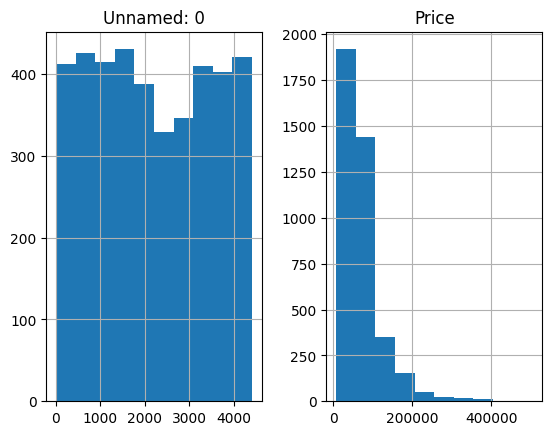

In [146]:
df.hist()

In [147]:
df.describe(include='all')

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
count,3976.000000,3976,3976,3976.000000,3976,3976,3976,3976,3976,3976,3976,3976,3968,3972,3976,3976,3976,3558
unique,NaN,31,3941,NaN,125,19,10,20,19,31,2,34,300,11,19,8,68,191
top,NaN,ASUS,Lenovo ThinkBook 16 G6 (21KHA0J6IN) Laptop (16...,NaN,Intel Core i5 (11th Gen),Intel,Not Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,65,65W Adapter
freq,NaN,989,2,NaN,316,3009,2157,1608,1505,331,2034,2205,651,1939,1931,3014,1458,803
mean,2181.495724,NaN,NaN,72432.528672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1297.029657,NaN,NaN,52207.650948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,7990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1058.750000,NaN,NaN,39873.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2098.500000,NaN,NaN,58990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3342.250000,NaN,NaN,84990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
df.isna().sum()

Unnamed: 0           0
Brand                0
Name                 0
Price                0
Processor_Name       0
Processor_Brand      0
RAM_Expandable       0
RAM                  0
RAM_TYPE             0
Ghz                  0
Display_type         0
Display              0
GPU                  8
GPU_Brand            4
SSD                  0
HDD                  0
Adapter              0
Battery_Life       418
dtype: int64

### Verificare intrari duplicate dupa nume

In [149]:
df.loc[df.duplicated(subset=['Name'])]

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
1989,2102,HP,HP 15-fd0011TU (7P703PA) Laptop (15.6 Inch | C...,53490,3.4 Ghz Processor,3.4,16 GB Expandable,8 GB,DDR4 RAM,0,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,65,65W Adapter
2066,2195,MSI,MSI Katana GF66 12UC-632IN Laptop (15.6 Inch |...,84990,Intel Core i7 (12th Gen),Intel,Not Expandable,8 GB,DDR4 RAM,4.7 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,240,240W Adapter
2105,2242,ASUS,ASUS VivoBook 15 X1500EA-EJ322WS Laptop (15.6 ...,33800,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB,DDR4 RAM,3.0 Ghz Processor,LCD,15.6,Integrated,Intel,512 GB SSD Storage,No HDD,65,Upto 6 Hrs Battery Life
2108,2249,ASUS,ASUS VivoBook 15 X1502ZA-EJ541WS Laptop (15.6 ...,53990,Intel Core i5 (12th Gen),Intel,Not Expandable,16 GB,DDR4 RAM,2.5 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,65,65W Adapter
2146,2295,Lenovo,Lenovo Ideapad Gaming 3 15IHU6 (82K101EEIN) La...,64500,Intel Core i5 (11th Gen),Intel,Not Expandable,8 GB,DDR4 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,65,Upto 4.5 Hrs Battery Life
2184,2347,Dell,Dell Inspiron 14 7420 (D560779WIN9S) Laptop (1...,103990,Intel Core i7 (12th Gen),Intel,Not Expandable,16 GB,DDR5 RAM,3.4 Ghz Processor,LCD,14,"GeForce MX550 GPU, 2 GB",NVIDIA,512 GB SSD Storage,No HDD,65,Upto 7 Hrs Battery Life
2255,2442,HP,HP Pavilion Aero 13-be2046AU (7S449PA) Laptop ...,85500,AMD Octa-Core Ryzen 7,AMD,16 GB Expandable,16 GB,DDR5 RAM,4.7 Ghz Processor,LCD,13.3,Radeon,AMD,1024 GB SSD Storage,No HDD,65,65W Adapter
2256,2445,ASUS,ASUS TUF Gaming A15 FA506IHRZ-HN113W Laptop (1...,63250,AMD Hexa-Core Ryzen 5,AMD,32 GB Expandable,16 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,"GeForce GTX 1650 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,150,Upto 8 Hrs Battery Life
2257,2448,HP,HP Pavilion 14-dv1029TU (5D0C2PA) Laptop (14 I...,102200,Intel Core i7 (11th Gen),Intel,Not Expandable,16 GB,DDR4 RAM,2.7 Ghz Processor,LCD,14,Iris Xe,Intel,1024 GB SSD Storage,No HDD,65,65W Adapter
2292,2492,Samsung,Samsung Galaxy Book Pro Intel Evo NP940XFG-KC5...,99999,Intel Core i7 (13th Gen),Intel,Not Expandable,16 GB RAM,RAM,2.2 Ghz Processor,LED,14,Iris Xe,Intel,1024 GB SSD Storage,No HDD,63,Upto 16 Hrs Battery Life


In [150]:
name_list = df['Name'].unique().tolist()
for name in name_list:
    print(name)

HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (11.6 Inch | MediaTek Octa Core | 4 GB | Google Chrome |)::585119::computer::laptops
Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15.6 Inch | AMD Hexa Core Ryzen 5 | 8 GB | Windows 11 | 512 GB SSD)::594497::computer::laptops
Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch | Core i5 12th Gen | 16 GB | Windows 11 | 512 GB SSD)::595299::computer::laptops
HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | Core i5 12th Gen | 8 GB | Windows 11 | 512 GB SSD)::616095::computer::laptops
Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch | Core i3 11th Gen | 8 GB | Windows 11 | 512 GB SSD)::615700::computer::laptops
Acer One 14 Z8-415 (UN.599SI.020) Laptop (14 Inch | Core i5 11th Gen | 16 GB | Windows 11 | 512 GB SSD)::616145::computer::laptops
HP 14s-fq1092AU (50M60PA) Laptop (14 Inch | AMD Hexa Core Ryzen 5 | 8 GB | Windows 11 | 512 GB SSD)::594309::computer::laptops
Acer One 14 Z8-415 (UN.599SI.018) Laptop (14 Inch | Core i5 11th Gen | 8 GB | Windows 11 | 512 GB

### Analizare un laptop duplicat

Din analiza reiese faptul ca inregistrarile reprezinta un laptop cu aceleasi specificatii, singura diferenta fiind pretul.

In [151]:
df[df['Name'].str.contains('Dell Inspiron 15 (D560721WIN9BD)', regex=False)]

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
691,729,Dell,Dell Inspiron 15 (D560721WIN9BD) Laptop (15.6 ...,42990,Intel Core i5 (11th Gen),Intel,32 GB Expandable,8 GB,DDR4 RAM,3.0 Ghz Processor,LCD,15.6,Integrated,Intel,256 GB SSD Storage,1024 GB HDD Storage,65,Upto 6 Hrs Battery Life
3905,4333,Dell,Dell Inspiron 15 (D560721WIN9BD) Laptop (15.6 ...,56990,Intel Core i5 (11th Gen),Intel,32 GB Expandable,8 GB,DDR4 RAM,3.0 Ghz Processor,LCD,15.6,Integrated,Intel,256 GB SSD Storage,1024 GB HDD Storage,65,Upto 6 Hrs Battery Life


### Stergere elemente duplicate din dataset

Elementele care au datele din coloanele specificate la fel vor fi sterse. Va ramane doar prima inregistrare din dataset.

In [152]:
df = df.loc[~df.duplicated(subset=['Name', 'Processor_Name', 'Processor_Brand', 'RAM', 'RAM_TYPE', 'SSD', 'HDD'])].reset_index(drop=True).copy()
df.shape

(3941, 18)

### Convertire pret din rupii in lei.
La data de 24.03.2025 1 rupie este 0.054 lei.

In [153]:
rata_schimb = 0.054

df['Price'] = df['Price'] * rata_schimb

### Curatare coloana RAM

Eliminare **GB** din valoarea coloanei.

In [154]:
df['RAM'] = df.RAM.str.split(" ").apply(lambda x: x[0])
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,1241.460,MediaTek Octa-core,MediaTek,Not Expandable,4,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,1959.606,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,4239.000,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,2996.460,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,1187.460,Intel Core i3 (11th Gen),Intel,Not Expandable,8,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life


In [155]:
df.Ghz.unique()

array([' 2.0 Ghz Processor', ' 4.0 Ghz Processor', ' 3.3 Ghz Processor',
       ' 4.2 Ghz Processor', ' 1.7 Ghz Processor', '0',
       ' 2.5 Ghz Processor', ' 2.2 Ghz Processor', ' 2.9 Ghz Processor',
       ' 3.4 Ghz Processor', ' 2.6 Ghz Processor', ' 3.0 Ghz Processor',
       ' 4.7 Ghz Processor', ' 3.1 Ghz Processor', ' 2.7 Ghz Processor',
       ' 2.8 Ghz Processor', ' 2.4 Ghz Processor', ' 2.1 Ghz Processor',
       ' 4.8 Ghz Processor', ' 1.2 Ghz Processor', ' 1.0 Ghz Processor',
       ' 1.8 Ghz Processor', ' 1.1 Ghz Processor', ' 2.3 Ghz Processor',
       ' 1.6 Ghz Processor', ' 0.8 Ghz Processor', ' 1.3 Ghz Processor',
       ' 1.5 Ghz Processor', ' 1.9 Ghz Processor', ' 5.5 Ghz Processor',
       ' 1.4 Ghz Processor'], dtype=object)

### Curatare coloana __GPU__

In [156]:
df.GPU.unique()

array(['Integrated Graphics', 'Radeon', 'GeForce RTX 3050 GPU, 4 GB',
       'Iris Xe', 'UHD', 'UHD 620', 'GeForce RTX 2050 GPU, 4 GB',
       'GeForce RTX 4050 GPU, 6 GB', 'Arc', 'GeForce GTX 1650 GPU, 4 GB',
       'UHD 605', 'GeForce RTX 3060 GPU, 6 GB',
       'GeForce GTX 1650 Max Q GPU, 4 GB',
       'GeForce RTX 3050 Ti GPU, 4 GB', 'Integrated',
       'Geforce GTX 1650 GPU, 4 GB', 'Radeon Vega 3', 'UHD Graphics',
       'UHD GPU, 128 MB', 'M1', 'HD 6000', 'UHD 600', 'Radeon Vega 6',
       'M2 Integrated', 'HD 620', 'Geforce MX150 GPU, 2 GB',
       'Radeon Vega 8', 'Geforce GTX 1650 Max-Q GPU, 4 GB',
       'GeForce GTX 1650 Ti GPU, 4 GB', 'Radeon RX Vega 10', 'HD 520',
       'Radeon RX 5500M GPU, 4 GB', 'GeForce GTX 3050 GPU, 4 GB',
       'Radeon 610M', 'Radeon RX6500M GPU, 4 GB',
       'GeForce GTX 1650 MAX Q GPU, 4 GB', 'GeForce RTX 2050', 'HD 500',
       'Radeon Graphics', 'GeForce RTX 3070 Ti GPU, 8 GB',
       'GeForce GTX 1050 GPU, 4 GB', 'Geforce RTX 3050 GPU, 4 GB

In [157]:
len(df.GPU.unique())

301

In [158]:
# Split the 'GPU' column into two new columns: 'GPU_Type' and 'GPU_Memory'
# df[['GPU_Type', 'GPU_Memory']] = df['GPU'].str.split(',', expand=True)
# # Clean up whitespace in the new columns
# df['GPU_Type'] = df['GPU_Type'].str.strip()
# df['GPU_Memory'] = df['GPU_Memory'].str.strip()


# Split GPU column using ',' but some rows may not have ','
# split_df = df['GPU'].str.split(',', n=1, expand=True)
# # GPU type is the first part, strip whitespace
# df['GPU_Type'] = split_df[0].str.strip()
# # GPU memory is second part, extract digits from it or set NaN
# def extract_memory(x):
#     if pd.isna(x):
#         return np.nan
#     import re
#     match = re.search(r'(\d+)', x)
#     if match:
#         return int(match.group(1))
#     else:
#         return np.nan
# df['GPU_Memory'] = split_df[1].apply(extract_memory)


# Split GPU column using ',' but some rows may not have ','
split_df = df['GPU'].str.split(',', n=1, expand=True)
# GPU type is the first part, remove 'Geforce' or 'GeForce' case-insensitive and strip
# df['GPU_Type'] = split_df[0].str.replace(r'(?i)geforce', '', regex=True).str.strip()

# GPU type is the first part, remove 'Geforce' or 'GeForce' case-insensitive, and 'GPU', then strip
df['GPU_Type'] = split_df[0].str.replace(r'(?i)geforce', '', regex=True) \
                             .str.replace(r'(?i)gpu', '', regex=True) \
                             .str.strip()

# GPU memory is second part, extract digits or set NaN
def extract_memory(x):
    if pd.isna(x):
        return np.nan
    match = re.search(r'(\d+)', x)
    if match:
        return int(match.group(1))
    else:
        return np.nan
df['GPU_Memory'] = split_df[1].apply(extract_memory)

# Split GPU column using ',' but some rows may not have ','
# split_df = df['GPU'].str.split(',', n=1, expand=True)
# # GPU type is the first part, remove 'Geforce' (case-insensitive) and strip whitespace
# df['GPU_Type'] = split_df[0].str.replace(r'(?i)geforce\s*', '', regex=True).str.strip()
# # GPU memory is second part, extract digits or set NaN
# def extract_memory(x):
#     if pd.isna(x):
#         return np.nan
#     match = re.search(r'(\d+)', x)
#     if match:
#         return int(match.group(1))
#     else:
#         return np.nan
# df['GPU_Memory'] = split_df[1].apply(extract_memory)

df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life,GPU_Type,GPU_Memory
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,1241.460,MediaTek Octa-core,MediaTek,Not Expandable,4,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life,Integrated Graphics,NaN
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,1959.606,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life,Radeon,NaN
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,4239.000,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life,RTX 3050,4.0
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,2996.460,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life,Iris Xe,NaN
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,1187.460,Intel Core i3 (11th Gen),Intel,Not Expandable,8,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life,UHD,NaN


In [159]:
df.RAM_TYPE.unique()

array([' DDR4 RAM', ' DDR4 RAM ', ' DDR5 RAM ', ' LPDDR4X RAM',
       ' LPDDR5X RAM ', ' LPDDR5 RAM', ' LPDDR4 RAM', ' DDR5 RAM',
       ' LPDDR5X RAM', ' LPDDR5 RAM ', ' LPDDR4X RAM ', ' LPDDR3 RAM',
       ' RAM', ' RAM ', ' LPDDR4 RAM ', ' DDR3 RAM', ' DDR3 RAM ',
       ' LPDDR3 RAM ', ' DDR2 RAM'], dtype=object)

In [160]:
# Extract the first part (DDR4, DDR5, etc.)
df['RAM_TYPE'] = df['RAM_TYPE'].str.extract(r'(\bDDR\d\b)')
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life,GPU_Type,GPU_Memory
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,1241.460,MediaTek Octa-core,MediaTek,Not Expandable,4,DDR4,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life,Integrated Graphics,NaN
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,1959.606,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8,DDR4,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life,Radeon,NaN
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,4239.000,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16,DDR5,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life,RTX 3050,4.0
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,2996.460,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8,DDR4,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life,Iris Xe,NaN
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,1187.460,Intel Core i3 (11th Gen),Intel,Not Expandable,8,NaN,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life,UHD,NaN


In [161]:
df.RAM_TYPE.unique()

array(['DDR4', 'DDR5', nan, 'DDR3', 'DDR2'], dtype=object)

In [162]:
df.RAM_TYPE.isna().sum()

np.int64(600)

In [163]:
df.fillna({'RAM_TYPE' : df['RAM_TYPE'].mode()[0]}, inplace=True)
df.RAM_TYPE.isna().sum()  

np.int64(0)

In [164]:
# Mapping DDR types to their ranks
rank_mapping = {
    'DDR5': 1,
    'DDR4': 2,
    'DDR3': 3,
    'DDR2': 4
}
# Encoding RAM_TYPE based on rank
df['RAM_Rank'] = df['RAM_TYPE'].replace(rank_mapping)
df.head()

C:\Users\Ruben\AppData\Local\Temp\ipykernel_27008\586842539.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RAM_Rank'] = df['RAM_TYPE'].replace(rank_mapping)


,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,...,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life,GPU_Type,GPU_Memory,RAM_Rank
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,1241.460,MediaTek Octa-core,MediaTek,Not Expandable,4,DDR4,2.0 Ghz Processor,...,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life,Integrated Graphics,NaN,2
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,1959.606,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8,DDR4,4.0 Ghz Processor,...,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life,Radeon,NaN,2
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,4239.000,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16,DDR5,3.3 Ghz Processor,...,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life,RTX 3050,4.0,1
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,2996.460,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8,DDR4,4.2 Ghz Processor,...,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life,Iris Xe,NaN,2
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,1187.460,Intel Core i3 (11th Gen),Intel,Not Expandable,8,DDR4,1.7 Ghz Processor,...,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life,UHD,NaN,2


# TODO -> curatare gtx 1650

In [165]:
df.GPU_Type.unique()

array(['Integrated Graphics', 'Radeon', 'RTX 3050', 'Iris Xe', 'UHD',
       'UHD 620', 'RTX 2050', 'RTX 4050', 'Arc', 'GTX 1650', 'UHD 605',
       'RTX 3060', 'GTX 1650 Max Q', 'RTX 3050 Ti', 'Integrated',
       'Radeon Vega 3', 'UHD Graphics', 'M1', 'HD 6000', 'UHD 600',
       'Radeon Vega 6', 'M2 Integrated', 'HD 620', 'MX150',
       'Radeon Vega 8', 'GTX 1650 Max-Q', 'GTX 1650 Ti',
       'Radeon RX Vega 10', 'HD 520', 'Radeon RX 5500M', 'GTX 3050',
       'Radeon 610M', 'Radeon RX6500M', 'GTX 1650 MAX Q', 'HD 500',
       'Radeon Graphics', 'RTX 3070 Ti', 'GTX 1050', 'M2',
       'Radeon RX 6500M', 'Radeon RX 5600M', 'MX450', 'RTX 4060',
       'Adreno', 'GTX 1060', 'MX330', 'Radeon R2', 'Iris X',
       'Radeon Vega 7', 'Radeon R4', 'Integrated UHD', 'Iris Xe Graphics',
       'Iris Plus 655', 'MX350', 'Radeon RX 6800M', 'Iris Plus', 'MX250',
       'RTX 3070', 'Radeon R5', 'MX550', 'Integrated Arm Mali',
       'Integrated Iris Xe', 'Radeon 610M Vega 2', '18-core',
       'U

In [166]:
df.GPU_Type.isna().sum()

np.int64(8)

### Tratare valori lipsa GPU_Type

In [167]:
df.fillna({'GPU_Type' : df['GPU_Type'].mode()[0]}, inplace=True)
df.GPU_Type.isna().sum()

np.int64(0)

# TODO -> tratare valori lipsa

In [168]:
df.GPU_Memory.isna().sum()

np.int64(2468)

In [169]:
df.fillna({'GPU_Memory' : df['GPU_Memory'].mode()[0]}, inplace=True)
df.GPU_Memory.isna().sum()  

np.int64(0)

### Actualizare inregistrari cu valaorea Ghz lipsa

Pentru inregistrarile care au valoarea de Ghz lipsa(zero) se cauta daca exista informatia in coloanele Processor_Brand si Processor_Name, iar apoi se actualizeaza.

In [170]:


def extract_ghz(row):
    # daca exista valoare, nu se modifica
    if row['Ghz'] != 0:
        return row['Ghz']
    
    # verificare valoare Ghz in  coloana Processor_Name
    if isinstance(row['Processor_Name'], str):
        match = re.search(r'(\d+\.?\d*)\s*GHz', row['Processor_Name'], re.IGNORECASE)
        if match:
            return float(match.group(1))
    
    # verificare valoare Ghz in  coloana Processor_Brand
    if isinstance(row['Processor_Brand'], str):
        match = re.search(r'(\d+\.?\d*)\s*GHz', row['Processor_Brand'], re.IGNORECASE)
        if match:
            return float(match.group(1))
    
    return np.nan

# aplicare functie pentru actualizarea valorilor ghz gasite
df['Ghz'] = df.apply(extract_ghz, axis=1)

### Curatare coloana Ghz

Extragere valoare ghz din string.

In [171]:
# daca lista rezultata are mai mult de 2 elemente atunci exista valoarea ghz in coloana si e extrasa altfel va fi NaN
df['Ghz'] = df['Ghz'].str.split(" ").apply(lambda x: x[1] if len(x) >= 2 else np.nan)
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,...,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life,GPU_Type,GPU_Memory,RAM_Rank
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,1241.460,MediaTek Octa-core,MediaTek,Not Expandable,4,DDR4,2.0,...,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life,Integrated Graphics,4.0,2
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,1959.606,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8,DDR4,4.0,...,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life,Radeon,4.0,2
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,4239.000,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16,DDR5,3.3,...,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life,RTX 3050,4.0,1
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,2996.460,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8,DDR4,4.2,...,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life,Iris Xe,4.0,2
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,1187.460,Intel Core i3 (11th Gen),Intel,Not Expandable,8,DDR4,1.7,...,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life,UHD,4.0,2


### Schimbare tip coloane RAM si Ghz 

Convertire coloane la tipurile int si float

In [172]:
df['RAM'] = pd.to_numeric(df['RAM'], errors='coerce')
df['Ghz'] = pd.to_numeric(df['Ghz'], errors='coerce')
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,...,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life,GPU_Type,GPU_Memory,RAM_Rank
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,1241.460,MediaTek Octa-core,MediaTek,Not Expandable,4,DDR4,2.0,...,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life,Integrated Graphics,4.0,2
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,1959.606,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8,DDR4,4.0,...,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life,Radeon,4.0,2
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,4239.000,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16,DDR5,3.3,...,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life,RTX 3050,4.0,1
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,2996.460,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8,DDR4,4.2,...,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life,Iris Xe,4.0,2
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,1187.460,Intel Core i3 (11th Gen),Intel,Not Expandable,8,DDR4,1.7,...,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life,UHD,4.0,2


### Curatare coloane SSD si HDD

Extragere valoare numerica din string si convertire la tip numberic(float).

In [173]:
df.SSD.unique()

array(['64 GB SSD Storage', '512 GB SSD Storage', 'NO SSD',
       '1024 GB SSD Storage', '256 GB SSD Storage', '256 GB SSD Storage ',
       '128 GB SSD Storage', '128 GB SSD Storage ', '512 GB SSD Storage ',
       '512  SSD Storage', '2048 GB SSD Storage', '1 GB SSD Storage',
       '8 GB SSD Storage ', '16 GB SSD Storage ', '32 GB SSD Storage',
       '16 GB SSD Storage', '256  SSD Storage ', '4098 GB SSD Storage',
       '32 GB SSD Storage '], dtype=object)

In [174]:
df['SSD'] = df.SSD.str.split(" ").apply(lambda x: x[0])
df['HDD'] = df.HDD.str.split(" ").apply(lambda x: x[0])

df['SSD'] = pd.to_numeric(df['SSD'], errors='coerce')
df['HDD'] = pd.to_numeric(df['HDD'], errors='coerce')
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,...,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life,GPU_Type,GPU_Memory,RAM_Rank
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,1241.460,MediaTek Octa-core,MediaTek,Not Expandable,4,DDR4,2.0,...,11.6,Integrated Graphics,MediaTek,64.0,NaN,45,Upto 12 Hrs Battery Life,Integrated Graphics,4.0,2
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,1959.606,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8,DDR4,4.0,...,15.6,Radeon,AMD,512.0,NaN,65,Upto 11 Hrs Battery Life,Radeon,4.0,2
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,4239.000,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16,DDR5,3.3,...,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512.0,NaN,56,Upto 10 Hrs Battery Life,RTX 3050,4.0,1
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,2996.460,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8,DDR4,4.2,...,15.6,Iris Xe,Intel,512.0,NaN,no,Upto 7.30 Hrs Battery Life,Iris Xe,4.0,2
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,1187.460,Intel Core i3 (11th Gen),Intel,Not Expandable,8,DDR4,1.7,...,15.6,UHD,Intel,512.0,NaN,45,Upto 8 Hrs Battery Life,UHD,4.0,2


### Valori lipsa coloana SSD

Se obesrva faptul ca toate inregistrarile pentru care nu exista valoare SSD au valoare la HDD.

In [175]:
df.SSD.unique()

array([6.400e+01, 5.120e+02,       nan, 1.024e+03, 2.560e+02, 1.280e+02,
       2.048e+03, 1.000e+00, 8.000e+00, 1.600e+01, 3.200e+01, 4.098e+03])

In [176]:
# print(df.loc[108, 'Name'])
df[df.SSD.isna()].HDD.unique()

array([1.024e+03, 2.048e+03, 5.000e+02, 1.000e+00])

### Inlocuire NaN cu 0 pt SSD si HDD??

Se inlocuiesc valorile NaN rezultate in urma conversiei cu 0 pentru a indica faptul ca nu exista SSD.

In [177]:
# df['SSD'] = df['SSD'].fillna(0)
# df['HDD'] = df['HDD'].fillna(0)

## Actualizare coloana **Adapter**

Convertire coloana **Adapter** la tipul  float

In [178]:
df['Adapter'] = pd.to_numeric(df['Adapter'], errors='coerce')
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,...,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life,GPU_Type,GPU_Memory,RAM_Rank
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,1241.460,MediaTek Octa-core,MediaTek,Not Expandable,4,DDR4,2.0,...,11.6,Integrated Graphics,MediaTek,64.0,NaN,45.0,Upto 12 Hrs Battery Life,Integrated Graphics,4.0,2
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,1959.606,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8,DDR4,4.0,...,15.6,Radeon,AMD,512.0,NaN,65.0,Upto 11 Hrs Battery Life,Radeon,4.0,2
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,4239.000,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16,DDR5,3.3,...,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512.0,NaN,56.0,Upto 10 Hrs Battery Life,RTX 3050,4.0,1
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,2996.460,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8,DDR4,4.2,...,15.6,Iris Xe,Intel,512.0,NaN,NaN,Upto 7.30 Hrs Battery Life,Iris Xe,4.0,2
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,1187.460,Intel Core i3 (11th Gen),Intel,Not Expandable,8,DDR4,1.7,...,15.6,UHD,Intel,512.0,NaN,45.0,Upto 8 Hrs Battery Life,UHD,4.0,2


### Valori lipsa coloana **Adapter**
Pentru inregistrarile care nu au valoare se cauta informatia in coloana **Battery_Life**

In [179]:
df.Adapter.unique()

array([ 45.,  65.,  56.,  nan, 150., 170., 230., 135.,  41., 100.,  90.,
       120.,  96., 180.,  63.,  30.,  54.,  33.,  46.,  67.,  57.,  43.,
        48.,  70.,  37.,  24.,  42., 330., 200.,  58., 240.,  50., 280.,
        60.,  80.,  35.,  51.,  61.,  76.,  38.,  86.,  66., 210.,  39.,
        97., 140.,  83.,  59.,  53.,  71.,  75.,  74.,  49., 300.,  68.,
        52.,  40.,  36.,  32.,  15.,  26.,  47.,  64., 130.,  87.,  72.,
        95.,  69.])

In [180]:
df.Battery_Life.unique()

array([' Upto 12 Hrs Battery Life', ' Upto 11 Hrs Battery Life',
       ' Upto 10 Hrs Battery Life', 'Upto 7.30 Hrs Battery Life',
       ' Upto 8 Hrs Battery Life', '45W Adapter',
       ' Upto 9 Hrs Battery Life', '150W Adapter',
       ' Upto 9.5 Hrs Battery Life', ' Upto 7 Hrs Battery Life',
       '230W Adapter', ' Upto 9.45 Hrs Battery Life',
       'Upto 7 Hrs Battery Life', ' Upto 6 Hrs Battery Life',
       ' Upto 17.5 Hrs Battery Life', '135W Adapter',
       'Upto 6.5 Hrs Battery Life', nan, '65W Adapter',
       'Upto 5 Hrs Battery Life', 'Upto 10 Hrs Battery Life',
       ' Upto 4 Hrs Battery Life', ' Upto 6.5 Hrs Battery Life',
       ' Upto 5 Hrs Battery Life', '90W Adapter',
       ' Upto 21 Hrs Battery Life', 'Upto 6 Hrs Battery Life',
       ' Upto 14.7 Hrs Battery Life', ' Upto 13 Hrs Battery Life',
       '52.5W Adapter', '180W Adapter', '41W Adapter', '45 / 65W Adapter',
       ' Upto 15 Hrs Battery Life', '120W Adapter',
       ' Upto 18 Hrs Battery Life', ' Upto 

In [181]:
df.Adapter.isna().sum()

np.int64(770)

In [182]:
def extract_battery_life_value(row):
    # pentru valorile existente nu se cauta
    if pd.notna(row['Adapter']):
        return row['Adapter']

    if isinstance(row['Battery_Life'], str):
        match = re.search(r'(\d+\.?\d*)', row['Battery_Life'])
        if match:
            return float(match.group(1))  
    
    return np.nan

# aplicare functie pt actualizarea coloanei cu valorea gasita
df['Adapter'] = df.apply(extract_battery_life_value, axis=1)
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,...,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life,GPU_Type,GPU_Memory,RAM_Rank
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,1241.460,MediaTek Octa-core,MediaTek,Not Expandable,4,DDR4,2.0,...,11.6,Integrated Graphics,MediaTek,64.0,NaN,45.0,Upto 12 Hrs Battery Life,Integrated Graphics,4.0,2
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,1959.606,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8,DDR4,4.0,...,15.6,Radeon,AMD,512.0,NaN,65.0,Upto 11 Hrs Battery Life,Radeon,4.0,2
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,4239.000,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16,DDR5,3.3,...,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512.0,NaN,56.0,Upto 10 Hrs Battery Life,RTX 3050,4.0,1
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,2996.460,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8,DDR4,4.2,...,15.6,Iris Xe,Intel,512.0,NaN,7.3,Upto 7.30 Hrs Battery Life,Iris Xe,4.0,2
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,1187.460,Intel Core i3 (11th Gen),Intel,Not Expandable,8,DDR4,1.7,...,15.6,UHD,Intel,512.0,NaN,45.0,Upto 8 Hrs Battery Life,UHD,4.0,2


In [183]:
df.Adapter.isna().sum()

np.int64(413)

## Curatare coloana **RAM_Expandable**

In [184]:
df.RAM_Expandable.unique()

array(['Not Expandable', ' 12 GB Expandable', ' 32 GB Expandable',
       ' 8 GB Expandable', ' 16 GB Expandable', ' 4 GB Expandable',
       ' 64 GB Expandable', ' 48 GB Expandable', ' 2 GB Expandable',
       ' 10 GB Expandable'], dtype=object)

In [185]:
df['RAM_Expandable'] = df.RAM_Expandable.str.split(" ").apply(lambda x: x[1])
df['RAM_Expandable'] = pd.to_numeric(df['RAM_Expandable'], errors='coerce')
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,...,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life,GPU_Type,GPU_Memory,RAM_Rank
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,1241.460,MediaTek Octa-core,MediaTek,NaN,4,DDR4,2.0,...,11.6,Integrated Graphics,MediaTek,64.0,NaN,45.0,Upto 12 Hrs Battery Life,Integrated Graphics,4.0,2
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,1959.606,AMD Hexa-Core Ryzen 5,AMD,12.0,8,DDR4,4.0,...,15.6,Radeon,AMD,512.0,NaN,65.0,Upto 11 Hrs Battery Life,Radeon,4.0,2
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,4239.000,Intel Core i5 (12th Gen),Intel,32.0,16,DDR5,3.3,...,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512.0,NaN,56.0,Upto 10 Hrs Battery Life,RTX 3050,4.0,1
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,2996.460,Intel Core i5 (12th Gen),Intel,8.0,8,DDR4,4.2,...,15.6,Iris Xe,Intel,512.0,NaN,7.3,Upto 7.30 Hrs Battery Life,Iris Xe,4.0,2
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,1187.460,Intel Core i3 (11th Gen),Intel,NaN,8,DDR4,1.7,...,15.6,UHD,Intel,512.0,NaN,45.0,Upto 8 Hrs Battery Life,UHD,4.0,2


## Convertire coloana **Display** la tipul  float

In [186]:
df['Display'] = pd.to_numeric(df['Display'], errors='coerce')
df.Display.dtype

dtype('float64')

### Actualizare valori gresite pentru **Processor_Brand**

Pentru inregistrarile cu valori numerice se cauta numle brand-ului in coloanele **Processor_Name** si **Name**.


In [187]:
df.Processor_Brand.unique()

array(['MediaTek', 'AMD', 'Intel', 'Apple', '2.3', '3.4', 'Qualcomm',
       '3.3', '1.6', '2.4', '3.0', '2.2', '1.7', '2.0', '2.1', '1.8',
       'Microsoft', '1.9', '2.6'], dtype=object)

In [188]:
df.Processor_Name.unique()

array(['MediaTek Octa-core', 'AMD Hexa-Core Ryzen 5',
       'Intel Core i5 (12th Gen)', 'Intel Core i3 (11th Gen)',
       'Intel Core i5 (11th Gen) Processor', 'Intel Core i5 (11th Gen)',
       'Intel Core i3 (8th Gen)', 'AMD Octa-Core Ryzen 7',
       'AMD Dual-Core Ryzen 3', 'Intel Core i7 (13th Gen) Processor',
       'Intel Core i5 (13th Gen) Processor', 'Intel Core Ultra 5',
       'Intel Celeron Dual-Core', 'AMD Quad-Core Ryzen 3',
       'Intel Core i5 (10th Gen)', 'Intel Core i3 (12th Gen)',
       'Intel Pentium Quad-Core', 'Intel Core i5 (13th Gen)',
       'Intel Core i9 (12th Gen)', 'Intel Core i3 (11th Gen) Processor',
       'Intel Core i9 (11th Gen)', 'Intel Core i7 (10th Gen)',
       'Intel Core i3 (10th Gen)', 'Intel Core i7 (13th Gen)',
       'Intel Core i3 (12th Gen) Processor', 'AMD Quad-Core Ryzen 5',
       'Apple M1', 'Intel Core i5 (5th Gen)', 'Apple M2 Processor',
       'AMD Hexa-Core Ryzen 5 Processor', 'Intel Core i3 (7th Gen)',
       'Intel Core i5 (8

In [189]:
df.Name.unique()

array(['HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (11.6 Inch | MediaTek Octa Core | 4 GB | Google Chrome |)::585119::computer::laptops',
       'Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15.6 Inch | AMD Hexa Core Ryzen 5 | 8 GB | Windows 11 | 512 GB SSD)::594497::computer::laptops',
       'Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch | Core i5 12th Gen | 16 GB | Windows 11 | 512 GB SSD)::595299::computer::laptops',
       ...,
       'ASUS VivoBook Pro 15 OLED M3500QC-L1711WS Laptop (15.6 Inch | AMD Octa Core Ryzen 7 | 16 GB | Windows 11 | 1 TB SSD)::615984::computer::laptops',
       'ASUS TUF FX505DT-AL118T Laptop (15.6 Inch | AMD Quad core Ryzen 5 | 8 GB | Windows 10 | 512 GB SSD)::575591::computer::laptops',
       'Lenovo Legion 5i (82AU00CFIN) Laptop (15.6 Inch | Core i5 10th Gen | 8 GB | Windows 10 | 512 GB SSD)::581543::computer::laptops'],
      shape=(3941,), dtype=object)

In [190]:
brands = ['Intel', 'AMD', 'Apple', 'Qualcomm', 'MediaTek', 'Microsoft']
intel = ['Atom', 'Core i', 'Pentium', 'Core M', 'Celeron']

def update_processor_brand(row):

    if pd.isna(row['Processor_Brand']) or row['Processor_Brand'].replace('.', '', 1).isdigit():  
        
        # catare brand in Processor_name
        for brand in brands:
            if brand in row['Processor_Name']:
                return brand  
            
        # Cautare brand in Name
        for brand in brands:
            if brand in row['Name']:
                return brand  
            
        # Cautare in functie de diferitele tipuri de Intel
        for keyword in intel:
            if keyword in row['Name']:
                return 'Intel'
              
        # tipul APU este AMD
        if 'APU' in row['Name']:
            return 'AMD'

        return np.nan
    
    return row['Processor_Brand']  # returneaza valoarea originala

# aplicare functie pt actualizarea coloanei
df['Processor_Brand'] = df.apply(update_processor_brand, axis=1)

In [191]:
df.Processor_Brand.isna().sum()

np.int64(0)

## Curatare coloana __Processor_Name__

Se obesrva ca nu toate inregistrarile au numele corect (unele au frecventa procesorului - Ghz)

In [192]:
df.Processor_Name.unique()

array(['MediaTek Octa-core', 'AMD Hexa-Core Ryzen 5',
       'Intel Core i5 (12th Gen)', 'Intel Core i3 (11th Gen)',
       'Intel Core i5 (11th Gen) Processor', 'Intel Core i5 (11th Gen)',
       'Intel Core i3 (8th Gen)', 'AMD Octa-Core Ryzen 7',
       'AMD Dual-Core Ryzen 3', 'Intel Core i7 (13th Gen) Processor',
       'Intel Core i5 (13th Gen) Processor', 'Intel Core Ultra 5',
       'Intel Celeron Dual-Core', 'AMD Quad-Core Ryzen 3',
       'Intel Core i5 (10th Gen)', 'Intel Core i3 (12th Gen)',
       'Intel Pentium Quad-Core', 'Intel Core i5 (13th Gen)',
       'Intel Core i9 (12th Gen)', 'Intel Core i3 (11th Gen) Processor',
       'Intel Core i9 (11th Gen)', 'Intel Core i7 (10th Gen)',
       'Intel Core i3 (10th Gen)', 'Intel Core i7 (13th Gen)',
       'Intel Core i3 (12th Gen) Processor', 'AMD Quad-Core Ryzen 5',
       'Apple M1', 'Intel Core i5 (5th Gen)', 'Apple M2 Processor',
       'AMD Hexa-Core Ryzen 5 Processor', 'Intel Core i3 (7th Gen)',
       'Intel Core i5 (8

Verificare ca sa nu existe informatie duplicata. (de ex acelasi tip de procesor dar formatul stringului sa fie diferit).

In [193]:
# filtrare valori unice care contin 'i5'
unique_cpus = df[df['Processor_Name'].str.contains(r'i5', case=False, regex=True)]['Processor_Name'].unique()

print(unique_cpus)

['Intel Core i5 (12th Gen)' 'Intel Core i5 (11th Gen) Processor'
 'Intel Core i5 (11th Gen)' 'Intel Core i5 (13th Gen) Processor'
 'Intel Core i5 (10th Gen)' 'Intel Core i5 (13th Gen)'
 'Intel Core i5 (5th Gen)' 'Intel Core i5 (8th Gen)'
 'Intel Core i5 (9th Gen)' 'Intel Core i5 (10th Gen) Processor'
 'Intel Core i5 (7th Gen)' 'Intel Core i5 (12th Gen) Processor'
 'Intel Core i5 (6th Gen)' 'Intel Core i5 (1st Gen)'
 'Intel Core i5 (9th Gen) Processor' 'Intel Core i5 (4th Gen)']


### Stergere informatie duplicata

Exista informatie duplicata deoarece unele inregistrari contin si cuvantul 'Processor'.

In [194]:
# Filter the DataFrame and get unique values
unique_cpus = df[df['Processor_Name'].str.contains(r'Processor', case=False, regex=True)]['Processor_Name'].unique()

# Display the unique values
print(unique_cpus)

['Intel Core i5 (11th Gen) Processor' 'Intel Core i7 (13th Gen) Processor'
 'Intel Core i5 (13th Gen) Processor' 'Intel Core i3 (11th Gen) Processor'
 'Intel Core i3 (12th Gen) Processor' 'Apple M2 Processor'
 'AMD Hexa-Core Ryzen 5 Processor' '2.3 Ghz Processor'
 'Intel Core i7 (10th Gen) Processor' 'Intel Core i5 (10th Gen) Processor'
 '3.4 Ghz Processor' 'Intel Core i5 (12th Gen) Processor'
 'Intel Core i7 (12th Gen) Processor' 'Intel Core i7 (11th Gen) Processor'
 'Intel Celeron Dual-Core Processor' 'Apple M2 Max Processor'
 'AMD Octa-Core Ryzen 7 Processor' '3.3 Ghz Processor'
 'Intel Core i9 (14th Gen) Processor' 'Intel Core i3 (13th Gen) Processor'
 'Intel Core i9 (13th Gen) Processor' '1.6 Ghz Processor'
 'Intel Core i3 (10th Gen) Processor' 'Intel Pentium Quad-Core Processor'
 'Apple M1 Processor' 'AMD Quad-Core Ryzen 5 Processor'
 '2.4 Ghz Processor' 'AMD Quad-Core Ryzen 3 Processor'
 'AMD Dual-Core Ryzen 3 Processor' '3.0 Ghz Processor'
 'AMD Quad-Core Ryzen 7 Processor' 'AM

Stergere cuvant ' Processor' din Processor_Name pentru inregistrareile care il contin.

In [195]:
df['Processor_Name'] = df['Processor_Name'].str.replace(' Processor', '', regex=False)

# filtrare valori unice care contin 'i5'
unique_cpus = df[df['Processor_Name'].str.contains(r'i5', case=False, regex=True)]['Processor_Name'].unique()

print(unique_cpus)

['Intel Core i5 (12th Gen)' 'Intel Core i5 (11th Gen)'
 'Intel Core i5 (13th Gen)' 'Intel Core i5 (10th Gen)'
 'Intel Core i5 (5th Gen)' 'Intel Core i5 (8th Gen)'
 'Intel Core i5 (9th Gen)' 'Intel Core i5 (7th Gen)'
 'Intel Core i5 (6th Gen)' 'Intel Core i5 (1st Gen)'
 'Intel Core i5 (4th Gen)']


### Actualizare valori lipsa
Se vor inlocui valorile numerice (frecventa cpu - ghz) cu tipul procesorului care va fi extras din colana __Name__. 

Se observa ca toate inregistrari care contin frecventa au tipul de processor in coloana Name.

In [196]:
# Filter records where 'Processor_Name' contains 'Ghz'
filtered_records = df[df['Processor_Name'].str.contains('Ghz', case=False)]['Name'].unique().tolist()

for name in filtered_records:
    print(name)

Apple MacBook Pro M1 Pro MKGQ3HN/A Ultrabook (14.2 Inch | Apple M1 Pro | 16 GB | macOS Monterey | 1 TB SSD)::597798::computer::laptops
HP 15-fd0011TU (7P703PA) Laptop (15.6 Inch | Core i5 13th Gen | 8 GB | Windows 11 | 512 GB SSD)::614408::computer::laptops
Lenovo Ideapad Gaming 3 (82SB00QJIN) Laptop (15.6 Inch | AMD Hexa Core Ryzen 5 | 16 GB | Windows 11 | 512 GB SSD)::613938::computer::laptops
Apple MacBook Air MREA2HN/A Ultrabook (13.3 Inch | Core i5 8th Gen | 8 GB | macOS Mojave | 128 GB SSD)::576438::computer::laptops
HP Pavilion 13-U104TU (Y4F71PA) Laptop (13.3 Inch | Core i3 7th Gen | 4 GB | Windows 10 | 1 TB HDD)::578144::computer::laptops
ASUS ROG Zephyrus G14 GA401IV-HE182TS Laptop (14 Inch | AMD Octa Core Ryzen 9 | 16 GB | Windows 10 | 1 TB SSD)::583221::computer::laptops
HP Pavilion x360 14-cd0077tu (4LR21PA) Laptop (14 Inch | Core i3 8th Gen | 4 GB | Windows 10 | 1 TB HDD 8 GB SSD)::577087::computer::laptops
HP Compaq 15-s103TX (K8T82PA) Laptop (15.6 Inch | Core i3 4th Gen

In [197]:

def extract_processor_name(row):
    """Extrage numele procesorului din coloana Name si înlocuieste Processor_Name daca contine 'Ghz'."""
    # Verifica daca Processor_Name contine 'Ghz'
    if 'Ghz' in row['Processor_Name']:
        # Imparte Name dupa '|' si extrage partea cu numele procesorului
        parts = row['Name'].split('|')
        if len(parts) > 1:
            row['Processor_Name'] = parts[1].strip()  # Inlocuieste Processor_Name cu numele extras
    return row  # Returneaza randul modificat

# Aplicare functie pt actualizarea coloanei
df = df.apply(extract_processor_name, axis=1)

In [198]:
# filtrare valori unice care contin 'i5'
unique_cpus = df[df['Processor_Name'].str.contains(r'i5', case=False, regex=True)]['Processor_Name'].unique()

print(unique_cpus)

['Intel Core i5 (12th Gen)' 'Intel Core i5 (11th Gen)'
 'Intel Core i5 (13th Gen)' 'Intel Core i5 (10th Gen)'
 'Intel Core i5 (5th Gen)' 'Intel Core i5 (8th Gen)'
 'Intel Core i5 (9th Gen)' 'Core i5 13th Gen' 'Intel Core i5 (7th Gen)'
 'Intel Core i5 (6th Gen)' 'Core i5 8th Gen' 'Intel Core i5 (1st Gen)'
 'Core i5 4th Gen' 'Intel Core i5 (4th Gen)']


### Stergere paranteze si cuvant 'Intel ' din __Processor_Name__

In [199]:
df['Processor_Name'] = df['Processor_Name'].str.replace('Intel ', '', regex=False)
df['Processor_Name'] = df['Processor_Name'].str.replace('(', '', regex=False).str.replace(')', '', regex=False)

# filtrare valori unice care contin 'i5'
unique_cpus = df[df['Processor_Name'].str.contains(r'i5', case=False, regex=True)]['Processor_Name'].unique()

print(unique_cpus)

['Core i5 12th Gen' 'Core i5 11th Gen' 'Core i5 13th Gen'
 'Core i5 10th Gen' 'Core i5 5th Gen' 'Core i5 8th Gen' 'Core i5 9th Gen'
 'Core i5 7th Gen' 'Core i5 6th Gen' 'Core i5 1st Gen' 'Core i5 4th Gen']


In [200]:
df.Processor_Name.unique()

array(['MediaTek Octa-core', 'AMD Hexa-Core Ryzen 5', 'Core i5 12th Gen',
       'Core i3 11th Gen', 'Core i5 11th Gen', 'Core i3 8th Gen',
       'AMD Octa-Core Ryzen 7', 'AMD Dual-Core Ryzen 3',
       'Core i7 13th Gen', 'Core i5 13th Gen', 'Core Ultra 5',
       'Celeron Dual-Core', 'AMD Quad-Core Ryzen 3', 'Core i5 10th Gen',
       'Core i3 12th Gen', 'Pentium Quad-Core', 'Core i9 12th Gen',
       'Core i9 11th Gen', 'Core i7 10th Gen', 'Core i3 10th Gen',
       'AMD Quad-Core Ryzen 5', 'Apple M1', 'Core i5 5th Gen', 'Apple M2',
       'Core i3 7th Gen', 'Core i5 8th Gen', 'Pentium Dual-Core',
       'Core i5 9th Gen', 'Core i3 6th Gen', 'Apple M1 Pro',
       'AMD Dual-Core Athlon', 'Core i7 11th Gen', 'Core i7 12th Gen',
       'Core i7 7th Gen', 'Qualcomm Snapdragon Octa-Core',
       'Core i5 7th Gen', 'AMD Quad-Core APU', 'Core i3 13th Gen',
       'AMD Dual-Core A6 APU', 'AMD Octa-Core Ryzen 9',
       'AMD Dual-Core A9 APU', 'Core i7 8th Gen', 'Core 7 Series 1',
       '

### Extragere coloane noi din coloana __Processor_Name__

pentru a avea informatii atomice se vor crea 3 noi coloane: Processor_Type(Core i3, Ryzen 5 etc), Generation(11, 12 etc) si Cores(4, 6, 8 etc)

In [201]:
def extract_processor_info(name):
    name = name.strip()

    # 1. Handle APU patterns like "A6 APU", "APU A8", "E1 APU", "APU E2"
    apu_match = re.search(r'(?:APU )?(A\d+|E\d+)(?: APU)?', name, re.IGNORECASE)
    if "APU" in name and apu_match:
        processor_type = f"{apu_match.group(1).upper()} APU"
    elif "APU" in name:
        processor_type = "APU"

    # 2. Special case: Core X Series Y (like Core 5 Series 1)
    elif re.search(r'Core \d Series \d', name):
        processor_type = re.search(r'Core \d Series \d', name).group(0)

    # 3. General processor types (strip core count terms first)
    else:
        cleaned_name = re.sub(r'\b(Quad|Dual|Hexa|Octa|Single|Triple|Penta|Deca|Dodeca|Hexadeca)[ -]?Core\b', '', name, flags=re.IGNORECASE)
        type_match = re.search(
            r'(Core i[3579]|Core Ultra \d|Core M[35]?|Ryzen \d|Pentium|Celeron|Athlon|Snapdragon|MediaTek|Apple M\d(?: Pro| Max)?|Apple M\d|Microsoft SQ1|Atom)',
            cleaned_name
        )
        processor_type = type_match.group(0) if type_match else np.nan

    # 4. Generation extraction
    gen_match = re.search(r'(\d{1,2})(?:st|nd|rd|th)? Gen', name)
    generation = gen_match.group(1) if gen_match else np.nan

    # 5. Core count
    core_match = re.search(r'(Single|Dual|Triple|Quad|Penta|Hexa|Octa|Deca|Dodeca|Hexadeca)[ -]?core', name, re.IGNORECASE)
    core_mapping = {
        'Single': 1, 'Dual': 2, 'Triple': 3, 'Quad': 4, 'Penta': 5,
        'Hexa': 6, 'Octa': 8, 'Deca': 10, 'Dodeca': 12, 'Hexadeca': 16
    }
    core_label = core_match.group(1).capitalize() if core_match else np.nan
    cores = core_mapping.get(core_label, np.nan)

    return processor_type, generation, cores


# Apply the function to each row in your df
extracted_info = df['Processor_Name'].apply(extract_processor_info)

# Create new columns from the returned tuples
df[['Processor_Type', 'Generation', 'Cores']] = pd.DataFrame(extracted_info.tolist(), index=df.index)
df.head(20)

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,...,SSD,HDD,Adapter,Battery_Life,GPU_Type,GPU_Memory,RAM_Rank,Processor_Type,Generation,Cores
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,1241.460,MediaTek Octa-core,MediaTek,NaN,4,DDR4,2.0,...,64.0,NaN,45.0,Upto 12 Hrs Battery Life,Integrated Graphics,4.0,2,MediaTek,NaN,8.0
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,1959.606,AMD Hexa-Core Ryzen 5,AMD,12.0,8,DDR4,4.0,...,512.0,NaN,65.0,Upto 11 Hrs Battery Life,Radeon,4.0,2,Ryzen 5,NaN,6.0
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,4239.000,Core i5 12th Gen,Intel,32.0,16,DDR5,3.3,...,512.0,NaN,56.0,Upto 10 Hrs Battery Life,RTX 3050,4.0,1,Core i5,12,NaN
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,2996.460,Core i5 12th Gen,Intel,8.0,8,DDR4,4.2,...,512.0,NaN,7.3,Upto 7.30 Hrs Battery Life,Iris Xe,4.0,2,Core i5,12,NaN
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,1187.460,Core i3 11th Gen,Intel,NaN,8,DDR4,1.7,...,512.0,NaN,45.0,Upto 8 Hrs Battery Life,UHD,4.0,2,Core i3,11,NaN
5,7,Acer,Acer One 14 Z8-415 (UN.599SI.020) Laptop (14 I...,1889.460,Core i5 11th Gen,Intel,32.0,16,DDR4,NaN,...,512.0,NaN,45.0,45W Adapter,Iris Xe,4.0,2,Core i5,11,NaN
6,8,HP,HP 14s-fq1092AU (50M60PA) Laptop (14 Inch | AM...,2678.346,AMD Hexa-Core Ryzen 5,AMD,16.0,8,DDR4,4.0,...,512.0,NaN,65.0,Upto 9 Hrs Battery Life,Radeon,4.0,2,Ryzen 5,NaN,6.0
7,9,Acer,Acer One 14 Z8-415 (UN.599SI.018) Laptop (14 I...,2159.460,Core i5 11th Gen,Intel,32.0,8,DDR4,2.5,...,512.0,NaN,45.0,45W Adapter,Iris Xe,4.0,2,Core i5,11,NaN
8,10,Lenovo,Lenovo Ideapad S145 (81VD008PIN) Laptop (15.6 ...,1787.994,Core i3 8th Gen,Intel,12.0,4,DDR4,2.2,...,NaN,1024.0,45.0,45W Adapter,UHD 620,4.0,2,Core i3,8,NaN
9,11,ASUS,ASUS TUF Gaming F15 FX506HF-HN075W Laptop (15....,2645.460,Core i5 11th Gen,Intel,NaN,8,DDR4,2.9,...,512.0,NaN,150.0,150W Adapter,RTX 2050,4.0,2,Core i5,11,NaN


In [202]:
df.Processor_Type.unique()

array(['MediaTek', 'Ryzen 5', 'Core i5', 'Core i3', 'Ryzen 7', 'Ryzen 3',
       'Core i7', 'Core Ultra 5', 'Celeron', 'Pentium', 'Core i9',
       'Apple M1', 'Apple M2', 'Apple M1 Pro', 'Athlon', 'Snapdragon',
       'APU', 'A6 APU', 'Ryzen 9', 'A9 APU', 'Core 7 Series 1',
       'Apple M3 Pro', 'Apple M2 Max', 'Core Ultra 7', 'Core 5 Series 1',
       'Core Ultra 9', 'Core M3', 'Atom', 'A8 APU', 'A4 APU', 'E1 APU',
       'E2 APU', 'Apple M2 Pro', 'Core 3 Series 1', 'A12 APU', nan,
       'Core M5', 'A10 APU', 'Microsoft SQ1'], dtype=object)

In [203]:
df.Processor_Type.isna().sum()

np.int64(1)

Exsita o inregistrare care nu are valoare pentru Processor_Type, si dupa ce am analizat-o am descoperit ca a ramas pe dinafara deoarece lipseste APU din Processor_Name asa ca va fi adaugat manual.

In [204]:
df[df['Processor_Type'].isna()]

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,...,SSD,HDD,Adapter,Battery_Life,GPU_Type,GPU_Memory,RAM_Rank,Processor_Type,Generation,Cores
3244,3671,Lenovo,Lenovo essential G50-45 (80E300RGIN) Laptop (1...,1755.0,AMD Quad Core A8,AMD,16.0,8,DDR3,NaN,...,NaN,1024.0,65.0,Upto 4 Hrs Battery Life,R5 M230,2.0,3,NaN,NaN,4.0


In [205]:
df.at[3244, 'Processor_Type'] = 'A8 APU'
df.Processor_Type.isna().sum()

np.int64(0)

In [206]:
print(df.dtypes)


Unnamed: 0           int64
Brand               object
Name                object
Price              float64
Processor_Name      object
Processor_Brand     object
RAM_Expandable     float64
RAM                  int64
RAM_TYPE            object
Ghz                float64
Display_type        object
Display            float64
GPU                 object
GPU_Brand           object
SSD                float64
HDD                float64
Adapter            float64
Battery_Life        object
GPU_Type            object
GPU_Memory         float64
RAM_Rank             int64
Processor_Type      object
Generation          object
Cores              float64
dtype: object


### Tratare valori lipsa pentru coloana __Generation__ si __Cores__

In [207]:
df['Generation'] = pd.to_numeric(df['Generation'], errors='coerce')

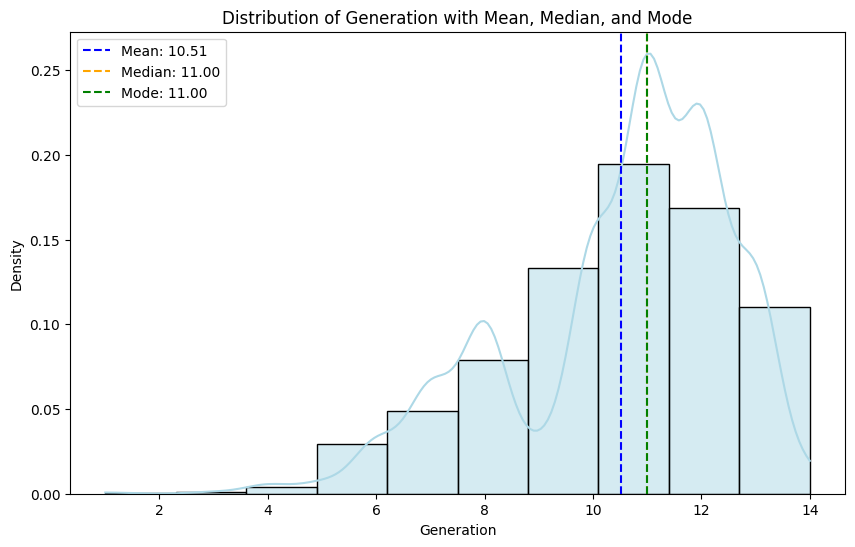

In [208]:
# Calculate mean, median, and mode
mean_Generation = df['Generation'].mean()
median_Generation = df['Generation'].median()
mode_Generation = df['Generation'].mode()[0]

# Set up the figure
plt.figure(figsize=(10, 6))

# Create a histogram with a kernel density estimate (KDE)
sns.histplot(df['Generation'], bins=10, kde=True, color='lightblue', stat='density')

# Overlay the mean, median, and mode
plt.axvline(mean_Generation, color='blue', linestyle='--', label='Mean: {:.2f}'.format(mean_Generation))
plt.axvline(median_Generation, color='orange', linestyle='--', label='Median: {:.2f}'.format(median_Generation))
plt.axvline(mode_Generation, color='green', linestyle='--', label='Mode: {:.2f}'.format(mode_Generation))

# Add titles and labels
plt.title('Distribution of Generation with Mean, Median, and Mode')
plt.xlabel('Generation')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

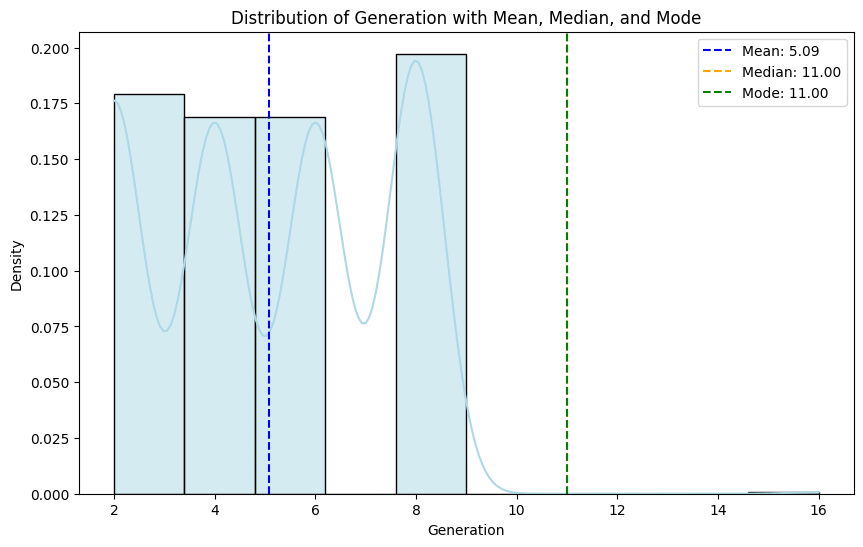

In [209]:
# Calculate mean, median, and mode
mean_Cores = df['Cores'].mean()
median_Cores = df['Cores'].median()
mode_Cores = df['Cores'].mode()[0]

# Set up the figure
plt.figure(figsize=(10, 6))

# Create a histogram with a kernel density estimate (KDE)
sns.histplot(df['Cores'], bins=10, kde=True, color='lightblue', stat='density')

# Overlay the mean, median, and mode
plt.axvline(mean_Cores, color='blue', linestyle='--', label='Mean: {:.2f}'.format(mean_Cores))
plt.axvline(median_Generation, color='orange', linestyle='--', label='Median: {:.2f}'.format(median_Generation))
plt.axvline(mode_Generation, color='green', linestyle='--', label='Mode: {:.2f}'.format(mode_Generation))

# Add titles and labels
plt.title('Distribution of Generation with Mean, Median, and Mode')
plt.xlabel('Generation')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

In [210]:
# df['Generation'].fillna(df['Generation'].mode()[0], inplace=True)
# df['Cores'].fillna(df['Cores'].mode()[0], inplace=True)
df.fillna({'Generation' : df['Generation'].mode()[0]}, inplace=True)
df.fillna({'Cores' : df['Cores'].mode()[0]}, inplace=True)

In [211]:
print(df.Generation.isna().sum())
print(df.Cores.isna().sum())

0
0


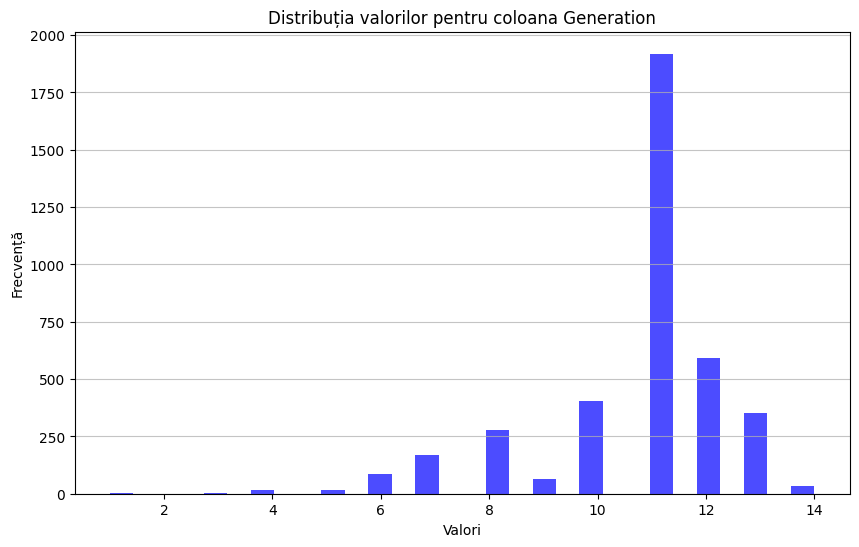

In [212]:

plt.figure(figsize=(10, 6))
plt.hist(df['Generation'], bins=30, alpha=0.7, color='blue')
plt.title('Distribuția valorilor pentru coloana Generation')
plt.xlabel('Valori')
plt.ylabel('Frecvență')
plt.grid(axis='y', alpha=0.75)
plt.show()


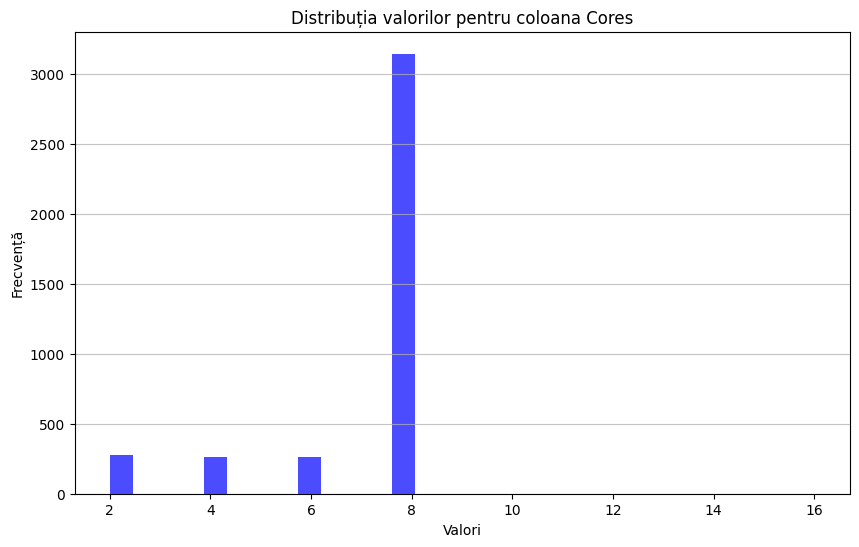

In [213]:

plt.figure(figsize=(10, 6))
plt.hist(df['Cores'], bins=30, alpha=0.7, color='blue')
plt.title('Distribuția valorilor pentru coloana Cores')
plt.xlabel('Valori')
plt.ylabel('Frecvență')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Extragere coloana __OS__(Operating System) din coloana __Name__

In [214]:
def extract_os_from_name(name):
    # Pattern to capture substring between 3rd and 4th pipe '|'
    pattern = r'^(?:[^|]*\|){3}\s*([^|]*)'
    match = re.search(pattern, name)
    if match:
        return match.group(1).strip()
    return np.nan

df['OS'] = df['Name'].apply(extract_os_from_name)
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,...,HDD,Adapter,Battery_Life,GPU_Type,GPU_Memory,RAM_Rank,Processor_Type,Generation,Cores,OS
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,1241.460,MediaTek Octa-core,MediaTek,NaN,4,DDR4,2.0,...,NaN,45.0,Upto 12 Hrs Battery Life,Integrated Graphics,4.0,2,MediaTek,11.0,8.0,Google Chrome
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,1959.606,AMD Hexa-Core Ryzen 5,AMD,12.0,8,DDR4,4.0,...,NaN,65.0,Upto 11 Hrs Battery Life,Radeon,4.0,2,Ryzen 5,11.0,6.0,Windows 11
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,4239.000,Core i5 12th Gen,Intel,32.0,16,DDR5,3.3,...,NaN,56.0,Upto 10 Hrs Battery Life,RTX 3050,4.0,1,Core i5,12.0,8.0,Windows 11
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,2996.460,Core i5 12th Gen,Intel,8.0,8,DDR4,4.2,...,NaN,7.3,Upto 7.30 Hrs Battery Life,Iris Xe,4.0,2,Core i5,12.0,8.0,Windows 11
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,1187.460,Core i3 11th Gen,Intel,NaN,8,DDR4,1.7,...,NaN,45.0,Upto 8 Hrs Battery Life,UHD,4.0,2,Core i3,11.0,8.0,Windows 11


In [215]:
df.OS.isna().sum()

np.int64(0)

## Battery Life

In [216]:
df.Battery_Life.unique()

array([' Upto 12 Hrs Battery Life', ' Upto 11 Hrs Battery Life',
       ' Upto 10 Hrs Battery Life', 'Upto 7.30 Hrs Battery Life',
       ' Upto 8 Hrs Battery Life', '45W Adapter',
       ' Upto 9 Hrs Battery Life', '150W Adapter',
       ' Upto 9.5 Hrs Battery Life', ' Upto 7 Hrs Battery Life',
       '230W Adapter', ' Upto 9.45 Hrs Battery Life',
       'Upto 7 Hrs Battery Life', ' Upto 6 Hrs Battery Life',
       ' Upto 17.5 Hrs Battery Life', '135W Adapter',
       'Upto 6.5 Hrs Battery Life', nan, '65W Adapter',
       'Upto 5 Hrs Battery Life', 'Upto 10 Hrs Battery Life',
       ' Upto 4 Hrs Battery Life', ' Upto 6.5 Hrs Battery Life',
       ' Upto 5 Hrs Battery Life', '90W Adapter',
       ' Upto 21 Hrs Battery Life', 'Upto 6 Hrs Battery Life',
       ' Upto 14.7 Hrs Battery Life', ' Upto 13 Hrs Battery Life',
       '52.5W Adapter', '180W Adapter', '41W Adapter', '45 / 65W Adapter',
       ' Upto 15 Hrs Battery Life', '120W Adapter',
       ' Upto 18 Hrs Battery Life', ' Upto 

In [217]:
def extract_battery_life(battery_info):
    if isinstance(battery_info, str):
        match = re.search(r'(\d+\.?\d*)\s*Hrs', battery_info)
        if match:
            return float(match.group(1))  # Return as float
    return np.nan  # Return NaN for non-matching cases

df['Battery_Life'] = df['Battery_Life'].apply(extract_battery_life)
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,...,HDD,Adapter,Battery_Life,GPU_Type,GPU_Memory,RAM_Rank,Processor_Type,Generation,Cores,OS
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,1241.460,MediaTek Octa-core,MediaTek,NaN,4,DDR4,2.0,...,NaN,45.0,12.0,Integrated Graphics,4.0,2,MediaTek,11.0,8.0,Google Chrome
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,1959.606,AMD Hexa-Core Ryzen 5,AMD,12.0,8,DDR4,4.0,...,NaN,65.0,11.0,Radeon,4.0,2,Ryzen 5,11.0,6.0,Windows 11
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,4239.000,Core i5 12th Gen,Intel,32.0,16,DDR5,3.3,...,NaN,56.0,10.0,RTX 3050,4.0,1,Core i5,12.0,8.0,Windows 11
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,2996.460,Core i5 12th Gen,Intel,8.0,8,DDR4,4.2,...,NaN,7.3,7.3,Iris Xe,4.0,2,Core i5,12.0,8.0,Windows 11
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,1187.460,Core i3 11th Gen,Intel,NaN,8,DDR4,1.7,...,NaN,45.0,8.0,UHD,4.0,2,Core i3,11.0,8.0,Windows 11


In [218]:
df.Battery_Life.isna().sum()

np.int64(2460)

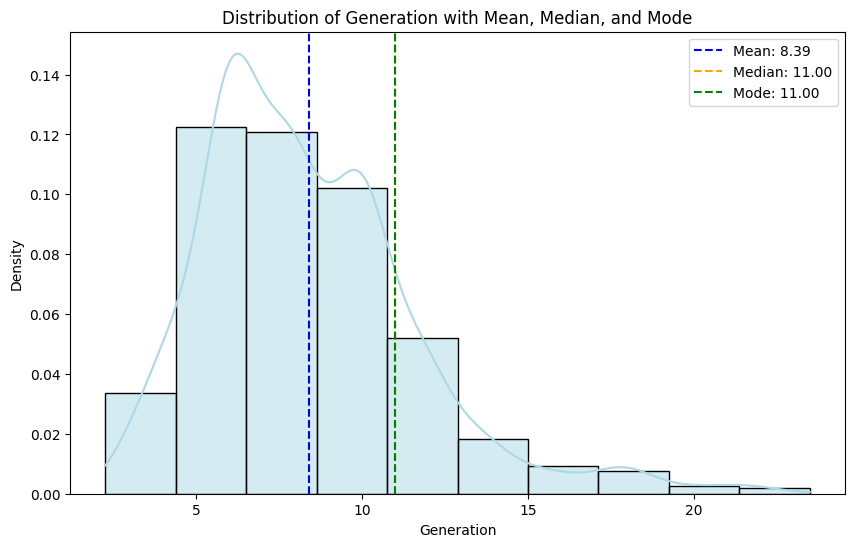

In [219]:
# Calculate mean, median, and mode
mean_Battery_Life = df['Battery_Life'].mean()
median_Battery_Life = df['Battery_Life'].median()
mode_Battery_Life = df['Battery_Life'].mode()[0]

# Set up the figure
plt.figure(figsize=(10, 6))

# Create a histogram with a kernel density estimate (KDE)
sns.histplot(df['Battery_Life'], bins=10, kde=True, color='lightblue', stat='density')

# Overlay the mean, median, and mode
plt.axvline(mean_Battery_Life, color='blue', linestyle='--', label='Mean: {:.2f}'.format(mean_Battery_Life))
plt.axvline(median_Generation, color='orange', linestyle='--', label='Median: {:.2f}'.format(median_Generation))
plt.axvline(mode_Generation, color='green', linestyle='--', label='Mode: {:.2f}'.format(mode_Generation))

# Add titles and labels
plt.title('Distribution of Generation with Mean, Median, and Mode')
plt.xlabel('Generation')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


### Laptop_Type


In [220]:

def classify_laptop(row):
    """
    Improved laptop classification function with better logic and error handling
    """
    # Handle NaN values and convert to lowercase for consistent comparison
    cpu = str(row['Processor_Type']).lower() if pd.notna(row['Processor_Type']) else 'unknown'
    ram_type = str(row['RAM_TYPE']).upper() if pd.notna(row['RAM_TYPE']) else 'UNKNOWN'
    cores = row['Cores'] if pd.notna(row['Cores']) else 0
    generation = row['Generation'] if pd.notna(row['Generation']) else 0
    gpu = str(row['GPU_Type']).lower() if pd.notna(row['GPU_Type']) else 'unknown'
    gpu_memory = row['GPU_Memory'] if pd.notna(row['GPU_Memory']) else 0
    adapter_wattage = row['Adapter'] if pd.notna(row['Adapter']) else 0
    
    # 1. WORKSTATION CLASS - High-end professional laptops
    workstation_cpus = ['i9', 'ryzen 9', 'apple m2 max', 'apple m3 pro', 'apple m2 pro']
    workstation_gpus = ['quadro', 'rtx a', 'rtx 3070', 'rtx 3080', 'rtx 4070', 'rtx 4080', 'rtx 4090']
    
    if (any(x in cpu for x in workstation_cpus) or 
        any(x in gpu for x in workstation_gpus) or
        (cores >= 12) or
        (gpu_memory >= 8 and adapter_wattage >= 150)):
        return 'Workstation'
    
    # 2. GAMING CLASS - Dedicated gaming laptops
    gaming_gpus = ['rtx 20', 'rtx 30', 'rtx 40', 'gtx 16', 'gtx 10', 'radeon rx', 'arc a']
    gaming_indicators = ['rtx', 'gtx', 'radeon rx']
    
    if (any(x in gpu for x in gaming_indicators) and gpu_memory >= 4) or \
       (any(x in gpu for x in gaming_gpus)) or \
       (adapter_wattage >= 120 and cores >= 6):
        return 'Gaming'
    
    # 3. ULTRABOOK CLASS - Thin, light, premium laptops
    ultrabook_cpus = ['apple m1', 'apple m2', 'apple m3', 'core m3', 'core m5', 'snapdragon', 'core ultra']
    ultrabook_indicators = ['core 7 series', 'core 5 series', 'core 3 series']
    
    if (any(x in cpu for x in ultrabook_cpus) or 
        any(x in cpu for x in ultrabook_indicators) or
        (adapter_wattage <= 45 and adapter_wattage > 0 and ('i5' in cpu or 'i7' in cpu)) or
        ('iris xe' in gpu and ram_type == 'DDR4')):
        return 'Ultrabook'
    
    # 4. BUDGET CLASS - Entry-level laptops
    budget_cpus = ['celeron', 'pentium', 'atom', 'ryzen 3', 'athlon', 'apu', 'mediatek']
    budget_indicators = ['e1 apu', 'e2 apu', 'a4 apu', 'a6 apu', 'a8 apu']
    
    if (any(x in cpu for x in budget_cpus) or 
        any(x in cpu for x in budget_indicators) or
        cores <= 2 or
        ram_type in ['DDR2', 'DDR3'] or
        (adapter_wattage <= 30 and adapter_wattage > 0)):
        return 'Budget'
    
    # 5. HIGH PERFORMANCE CLASS - Powerful but not necessarily gaming/workstation
    if ((ram_type == 'DDR5') or
        (cores >= 8 and adapter_wattage >= 80) or
        (gpu_memory >= 6) or
        ('i7' in cpu and generation >= 10) or
        ('ryzen 7' in cpu and generation >= 3)):
        return 'High Performance'
    
    # 6. OFFICE CLASS - Business/productivity laptops
    office_cpus = ['i5', 'ryzen 5']
    office_gpus = ['uhd', 'integrated', 'iris xe', 'radeon vega']
    
    if ((any(x in cpu for x in office_cpus) and cores >= 4) or
        (any(x in gpu for x in office_gpus) and cores >= 4) or
        (adapter_wattage >= 45 and adapter_wattage <= 90 and cores >= 4)):
        return 'Office'
    
    # 7. MULTIMEDIA CLASS - Default for everything else
    return 'Multimedia'

# Alternative function with scoring system for more nuanced classification
def classify_laptop_scored(row):
    """
    Score-based classification for more nuanced results
    """
    scores = {
        'Workstation': 0,
        'Gaming': 0,
        'Ultrabook': 0,
        'Budget': 0,
        'High Performance': 0,
        'Office': 0,
        'Multimedia': 0
    }
    
    # Handle NaN values
    cpu = str(row['Processor_Type']).lower() if pd.notna(row['Processor_Type']) else 'unknown'
    ram_type = str(row['RAM_TYPE']).upper() if pd.notna(row['RAM_TYPE']) else 'UNKNOWN'
    cores = row['Cores'] if pd.notna(row['Cores']) else 0
    generation = row['Generation'] if pd.notna(row['Generation']) else 0
    gpu = str(row['GPU_Type']).lower() if pd.notna(row['GPU_Type']) else 'unknown'
    gpu_memory = row['GPU_Memory'] if pd.notna(row['GPU_Memory']) else 0
    adapter_wattage = row['Adapter'] if pd.notna(row['Adapter']) else 0
    
    # CPU scoring
    if 'i9' in cpu or 'ryzen 9' in cpu:
        scores['Workstation'] += 3
        scores['High Performance'] += 2
    elif 'i7' in cpu or 'ryzen 7' in cpu:
        scores['Gaming'] += 2
        scores['High Performance'] += 2
        scores['Office'] += 1
    elif 'i5' in cpu or 'ryzen 5' in cpu:
        scores['Office'] += 2
        scores['Gaming'] += 1
        scores['Multimedia'] += 1
    elif 'i3' in cpu or 'ryzen 3' in cpu:
        scores['Budget'] += 2
        scores['Office'] += 1
    elif any(x in cpu for x in ['celeron', 'pentium', 'atom']):
        scores['Budget'] += 3
    elif any(x in cpu for x in ['apple m1', 'apple m2', 'apple m3']):
        scores['Ultrabook'] += 3
        scores['High Performance'] += 1
    elif 'snapdragon' in cpu or 'core ultra' in cpu:
        scores['Ultrabook'] += 2
    
    # GPU scoring
    if any(x in gpu for x in ['rtx 40', 'rtx 30']):
        scores['Gaming'] += 3
        scores['Workstation'] += 1
    elif any(x in gpu for x in ['rtx 20', 'gtx 16', 'gtx 10']):
        scores['Gaming'] += 2
    elif 'quadro' in gpu or 'rtx a' in gpu:
        scores['Workstation'] += 3
    elif any(x in gpu for x in ['radeon rx', 'arc a']):
        scores['Gaming'] += 2
    elif any(x in gpu for x in ['uhd', 'integrated', 'iris xe']):
        scores['Office'] += 1
        scores['Ultrabook'] += 1
        scores['Budget'] += 1
    
    # Cores scoring
    if cores >= 12:
        scores['Workstation'] += 3
    elif cores >= 8:
        scores['High Performance'] += 2
        scores['Gaming'] += 1
    elif cores >= 6:
        scores['Gaming'] += 1
        scores['Office'] += 1
    elif cores <= 2:
        scores['Budget'] += 2
    
    # GPU Memory scoring
    if gpu_memory >= 8:
        scores['Workstation'] += 2
        scores['Gaming'] += 2
    elif gpu_memory >= 4:
        scores['Gaming'] += 1
        scores['High Performance'] += 1
    
    # Adapter Wattage scoring
    if adapter_wattage >= 150:
        scores['Workstation'] += 2
    elif adapter_wattage >= 100:
        scores['Gaming'] += 2
        scores['High Performance'] += 1
    elif adapter_wattage <= 45 and adapter_wattage > 0:
        scores['Ultrabook'] += 2
        scores['Budget'] += 1
    elif adapter_wattage <= 30 and adapter_wattage > 0:
        scores['Budget'] += 2
    
    # RAM Type scoring
    if ram_type == 'DDR5':
        scores['High Performance'] += 2
        scores['Gaming'] += 1
    elif ram_type in ['DDR2', 'DDR3']:
        scores['Budget'] += 2
    
    # Return category with highest score
    max_category = max(scores, key=scores.get)
    max_score = scores[max_category]
    
    # If no clear winner (score 0 or tie), default to Multimedia
    if max_score == 0:
        return 'Multimedia'
    
    return max_category

# Usage example:
df['Laptop_Type'] = df.apply(classify_laptop, axis=1)
# df['Laptop_Type_Scored'] = df.apply(classify_laptop_scored, axis=1)


df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,...,Adapter,Battery_Life,GPU_Type,GPU_Memory,RAM_Rank,Processor_Type,Generation,Cores,OS,Laptop_Type
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,1241.460,MediaTek Octa-core,MediaTek,NaN,4,DDR4,2.0,...,45.0,12.0,Integrated Graphics,4.0,2,MediaTek,11.0,8.0,Google Chrome,Budget
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,1959.606,AMD Hexa-Core Ryzen 5,AMD,12.0,8,DDR4,4.0,...,65.0,11.0,Radeon,4.0,2,Ryzen 5,11.0,6.0,Windows 11,Office
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,4239.000,Core i5 12th Gen,Intel,32.0,16,DDR5,3.3,...,56.0,10.0,RTX 3050,4.0,1,Core i5,12.0,8.0,Windows 11,Gaming
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,2996.460,Core i5 12th Gen,Intel,8.0,8,DDR4,4.2,...,7.3,7.3,Iris Xe,4.0,2,Core i5,12.0,8.0,Windows 11,Ultrabook
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,1187.460,Core i3 11th Gen,Intel,NaN,8,DDR4,1.7,...,45.0,8.0,UHD,4.0,2,Core i3,11.0,8.0,Windows 11,Office


In [221]:
print(df.Cores.unique())
print(df.Generation.unique())
print(df.GPU_Memory.unique())
print(df.Adapter.unique())


[ 8.  6.  2.  4. 16.]
[11. 12.  8. 13. 10.  5.  7.  9.  6. 14.  1.  4.  3.]
[  4.   6. 128.   2.   8.  12.  16.   3. 512.   1.]
[ 45.    65.    56.     7.3  150.   170.   230.     7.   135.     6.5
    nan   5.    41.    10.   100.    90.   120.     6.    96.    52.5
 180.    63.    30.    54.    33.     4.     8.    36.7   12.    46.
  67.    57.    43.    48.    70.     9.5   37.    24.    42.   330.
   4.5  200.    58.   240.    57.5   50.   280.    60.    80.     9.15
  35.    51.    61.    21.    76.    11.     5.5   38.    86.    66.
 210.    39.    97.   140.    83.    59.    53.    71.    75.    74.
  10.15   9.86   8.8    3.    49.     6.15 300.    13.    12.8   14.
  68.    52.    12.5   40.     9.    36.    32.    15.    26.     8.5
  47.     5.3   64.    10.5    7.8  130.    37.24  39.3   69.6   10.8
  87.     6.3   12.38   9.4   11.15  72.     7.45  17.     7.5   56.5
  18.5   63.3   95.    53.6   60.7   69.  ]


In [222]:
# # One-hot encoding for the Category column
# segment_dummies = pd.get_dummies(df['Laptop_Type'])
# segment_dummies.columns = [col + "_Laptop" for col in segment_dummies.columns]

# # Convert the one-hot encoded columns to integer type
# segment_dummies = segment_dummies.astype(int)

# # Join the one-hot encoded columns to the original DataFrame
# df = df.join(segment_dummies)
# # Drop the original Category column if no longer needed
# df.drop(['Laptop_Type'], axis=1, inplace=True)
# # Display the updated DataFrame
# df.head()

## Actualizare coloana **GPU_Brand**

In [223]:
df[df.GPU_Brand.isna()]

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,...,Adapter,Battery_Life,GPU_Type,GPU_Memory,RAM_Rank,Processor_Type,Generation,Cores,OS,Laptop_Type
3244,3671,Lenovo,Lenovo essential G50-45 (80E300RGIN) Laptop (1...,1755.00,AMD Quad Core A8,AMD,16.0,8,DDR3,NaN,...,65.0,4.0,R5 M230,2.0,3,A8 APU,11.0,4.0,DOS,Budget
3459,3901,Lenovo,Lenovo essential G50-45 (80E3014FIN) Laptop (1...,1398.06,AMD Quad-Core A8 APU,AMD,16.0,4,DDR3,2.0,...,65.0,4.0,R5,4.0,3,A8 APU,11.0,4.0,Windows 8.1,Budget
3567,4016,Apple,Apple MacBook Pro MR932HN/A Ultrabook (15.4 In...,10151.46,Core i7 8th Gen,Intel,32.0,16,DDR4,2.2,...,10.0,10.0,Pro 555X,4.0,2,Core i7,8.0,8.0,macOS High Sierra,Ultrabook
3665,4121,Apple,Apple MacBook Pro MR962HN/A Ultrabook (15.4 In...,10794.60,Core i7 8th Gen,Intel,32.0,16,DDR4,2.2,...,10.0,10.0,Pro 555X,4.0,2,Core i7,8.0,8.0,macOS High Sierra,Ultrabook


In urma analizei inregistrarilor cu valori lipsa se observa ca toate au acelasi brand si anume AMD. Acest reiese din coloana **GPU**.

In [224]:
df['GPU_Brand'] = df['GPU_Brand'].fillna('AMD')

###  Standardizare nume brand
Aici se observa ca numele brand-ului NVIDIA nu e consisitent pentru toate inregistrarile, asa ca va fi actualizata coloana pentru a avea doar forma *NVIDIA*.

In [225]:
df.GPU_Brand.unique()

array(['MediaTek', 'AMD', 'NVIDIA', 'Intel', 'Apple', 'Qualcomm',
       'NIVIDIA', 'Nvidia', 'ARM', 'Microsoft', 'ATI'], dtype=object)

In [226]:
df['GPU_Brand'] = df['GPU_Brand'].replace({
    'NIVIDIA': 'NVIDIA',
    'Nvidia': 'NVIDIA'
})

## Stergere coloane nefolositoare

In [227]:
df.columns

Index(['Unnamed: 0', 'Brand', 'Name', 'Price', 'Processor_Name',
       'Processor_Brand', 'RAM_Expandable', 'RAM', 'RAM_TYPE', 'Ghz',
       'Display_type', 'Display', 'GPU', 'GPU_Brand', 'SSD', 'HDD', 'Adapter',
       'Battery_Life', 'GPU_Type', 'GPU_Memory', 'RAM_Rank', 'Processor_Type',
       'Generation', 'Cores', 'OS', 'Laptop_Type'],
      dtype='object')

In [228]:
df = df.drop(columns=['Unnamed: 0', 'Name', 'GPU', 'Processor_Name'])
df.head()
#'Processor_Name',

,Brand,Price,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU_Brand,...,Adapter,Battery_Life,GPU_Type,GPU_Memory,RAM_Rank,Processor_Type,Generation,Cores,OS,Laptop_Type
0,HP,1241.460,MediaTek,NaN,4,DDR4,2.0,LED,11.6,MediaTek,...,45.0,12.0,Integrated Graphics,4.0,2,MediaTek,11.0,8.0,Google Chrome,Budget
1,Lenovo,1959.606,AMD,12.0,8,DDR4,4.0,LCD,15.6,AMD,...,65.0,11.0,Radeon,4.0,2,Ryzen 5,11.0,6.0,Windows 11,Office
2,Dell,4239.000,Intel,32.0,16,DDR5,3.3,LCD,15.6,NVIDIA,...,56.0,10.0,RTX 3050,4.0,1,Core i5,12.0,8.0,Windows 11,Gaming
3,HP,2996.460,Intel,8.0,8,DDR4,4.2,LCD,15.6,Intel,...,7.3,7.3,Iris Xe,4.0,2,Core i5,12.0,8.0,Windows 11,Ultrabook
4,Infinix,1187.460,Intel,NaN,8,DDR4,1.7,LCD,15.6,Intel,...,45.0,8.0,UHD,4.0,2,Core i3,11.0,8.0,Windows 11,Office


## Analizare caracteristici

### Coloana **Pret**

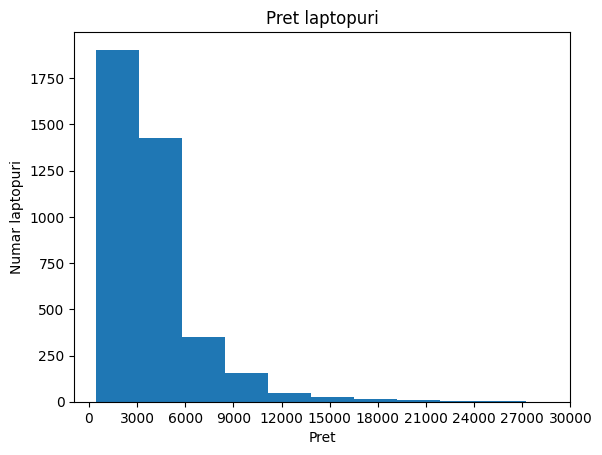

In [229]:
ax = df['Price'].plot(kind='hist', title="Pret laptopuri")
ax.set_ylabel('Numar laptopuri')
ax.set_xlabel('Pret')
ax.set_xticks(range(0, int(df['Price'].max()) + 3000, 3000))


### Coloana **Brand**

Text(0, 0.5, 'Numar de laptopuri')

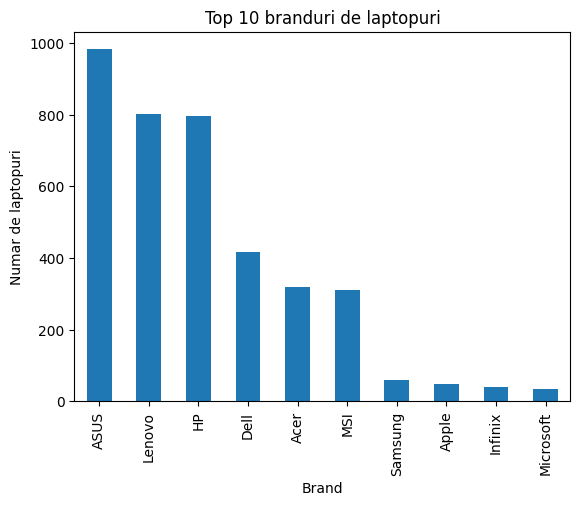

In [230]:
ax = df['Brand'].value_counts().head(10).plot(kind = 'bar', title="Top 10 branduri de laptopuri")
ax.set_ylabel('Numar de laptopuri')

### Coloana **Ghz**

Text(0.5, 0, 'Ghz')

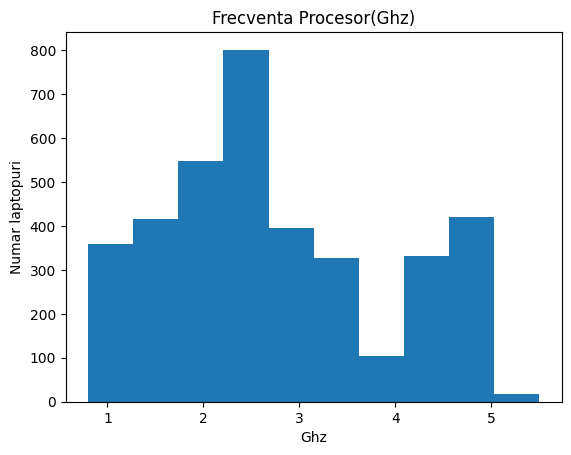

In [231]:
ax = df['Ghz'].plot(kind='hist', title="Frecventa Procesor(Ghz)")
ax.set_ylabel('Numar laptopuri')
ax.set_xlabel('Ghz')

### Coloana **Display**

Text(0.5, 0, 'Inch')

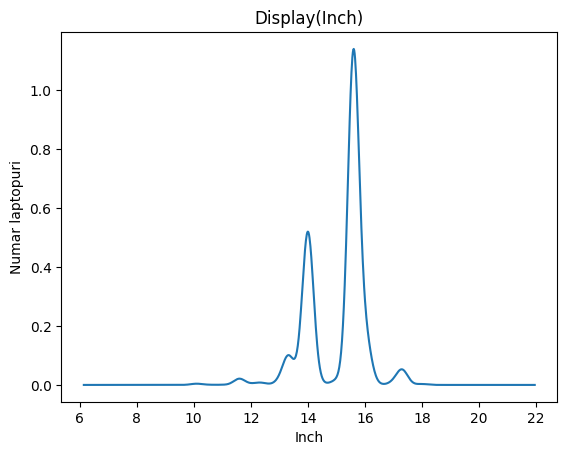

In [232]:
ax = df['Display'].plot(kind='kde', title="Display(Inch)")
ax.set_ylabel('Numar laptopuri')
ax.set_xlabel('Inch')

### Coloana **HDD**

<Axes: ylabel='count'>

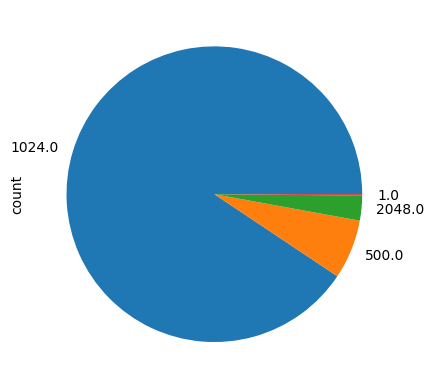

In [233]:
df['HDD'].value_counts().plot(kind='pie')

<Axes: ylabel='Frequency'>

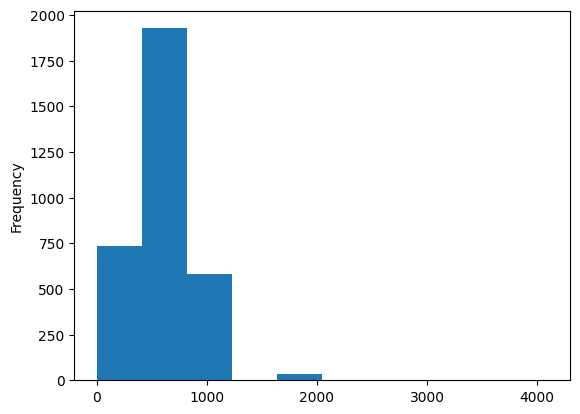

In [234]:
df['SSD'].plot(kind='hist')

### Coloana **RAM**

Text(0, 0.5, 'Numar de laptopuri')

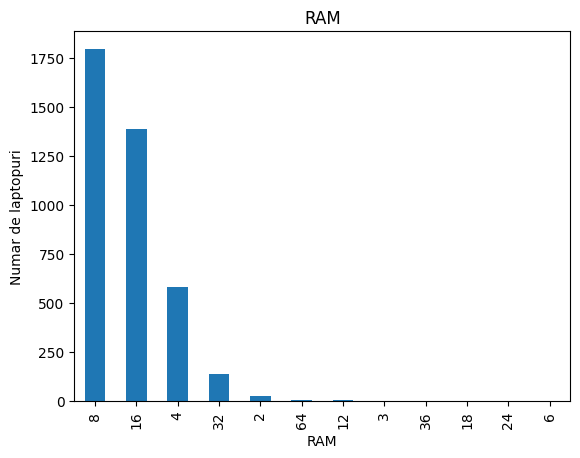

In [235]:
ax = df['RAM'].value_counts().plot(kind = 'bar', title="RAM")
ax.set_ylabel('Numar de laptopuri')

### Coloana **Adapter**

Text(0, 0.5, 'Numar de laptopuri')

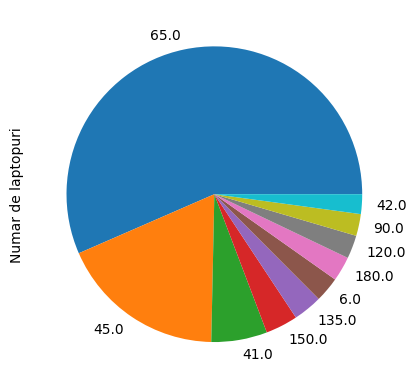

In [236]:
ax = df['Adapter'].value_counts().head(10).plot(kind = 'pie', title="")
ax.set_ylabel('Numar de laptopuri')

## Adaugare coloane noi

In [237]:
df['Has_SSD'] = df['SSD'].notna().astype(int) 
df['Has_HDD'] = df['HDD'].notna().astype(int)
df.head()

,Brand,Price,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU_Brand,...,GPU_Type,GPU_Memory,RAM_Rank,Processor_Type,Generation,Cores,OS,Laptop_Type,Has_SSD,Has_HDD
0,HP,1241.460,MediaTek,NaN,4,DDR4,2.0,LED,11.6,MediaTek,...,Integrated Graphics,4.0,2,MediaTek,11.0,8.0,Google Chrome,Budget,1,0
1,Lenovo,1959.606,AMD,12.0,8,DDR4,4.0,LCD,15.6,AMD,...,Radeon,4.0,2,Ryzen 5,11.0,6.0,Windows 11,Office,1,0
2,Dell,4239.000,Intel,32.0,16,DDR5,3.3,LCD,15.6,NVIDIA,...,RTX 3050,4.0,1,Core i5,12.0,8.0,Windows 11,Gaming,1,0
3,HP,2996.460,Intel,8.0,8,DDR4,4.2,LCD,15.6,Intel,...,Iris Xe,4.0,2,Core i5,12.0,8.0,Windows 11,Ultrabook,1,0
4,Infinix,1187.460,Intel,NaN,8,DDR4,1.7,LCD,15.6,Intel,...,UHD,4.0,2,Core i3,11.0,8.0,Windows 11,Office,1,0


## Combinare coloane SSD si HDD
Cele 2 coloane reprezinta capacitatea in GB, asadar vor fi combinate, iar pentru a distinge tipul de stocare (SDD/HDD) vor fi folosite coloanele create anterior, Has_SSD si Has_HDD.

In [238]:
df['Storage'] = df['SSD'].fillna(0) + df['HDD'].fillna(0)

# stergere coloane SSD si HDD
df.drop(columns=['HDD', 'SSD'], inplace=True)

df.head()


,Brand,Price,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU_Brand,...,GPU_Memory,RAM_Rank,Processor_Type,Generation,Cores,OS,Laptop_Type,Has_SSD,Has_HDD,Storage
0,HP,1241.460,MediaTek,NaN,4,DDR4,2.0,LED,11.6,MediaTek,...,4.0,2,MediaTek,11.0,8.0,Google Chrome,Budget,1,0,64.0
1,Lenovo,1959.606,AMD,12.0,8,DDR4,4.0,LCD,15.6,AMD,...,4.0,2,Ryzen 5,11.0,6.0,Windows 11,Office,1,0,512.0
2,Dell,4239.000,Intel,32.0,16,DDR5,3.3,LCD,15.6,NVIDIA,...,4.0,1,Core i5,12.0,8.0,Windows 11,Gaming,1,0,512.0
3,HP,2996.460,Intel,8.0,8,DDR4,4.2,LCD,15.6,Intel,...,4.0,2,Core i5,12.0,8.0,Windows 11,Ultrabook,1,0,512.0
4,Infinix,1187.460,Intel,NaN,8,DDR4,1.7,LCD,15.6,Intel,...,4.0,2,Core i3,11.0,8.0,Windows 11,Office,1,0,512.0


## Tratare valori lipsa

### Vizualizare procente valori lipsa

In [239]:
df.isna().mean()*100

Brand               0.000000
Price               0.000000
Processor_Brand     0.000000
RAM_Expandable     54.377062
RAM                 0.000000
RAM_TYPE            0.000000
Ghz                 5.658462
Display_type        0.000000
Display             0.025374
GPU_Brand           0.000000
Adapter            10.479574
Battery_Life       62.420705
GPU_Type            0.000000
GPU_Memory          0.000000
RAM_Rank            0.000000
Processor_Type      0.000000
Generation          0.000000
Cores               0.000000
OS                  0.000000
Laptop_Type         0.000000
Has_SSD             0.000000
Has_HDD             0.000000
Storage             0.000000
dtype: float64

In [240]:
df.dtypes

Brand               object
Price              float64
Processor_Brand     object
RAM_Expandable     float64
RAM                  int64
RAM_TYPE            object
Ghz                float64
Display_type        object
Display            float64
GPU_Brand           object
Adapter            float64
Battery_Life       float64
GPU_Type            object
GPU_Memory         float64
RAM_Rank             int64
Processor_Type      object
Generation         float64
Cores              float64
OS                  object
Laptop_Type         object
Has_SSD              int64
Has_HDD              int64
Storage            float64
dtype: object

### Eliminare coloane cu procent mare de valori lipsa
Coloana RAM_Expandable are un procent de 54% valori lipsa, asa ca va fi eliminata.

In [241]:
percentage_nan_battery_life = df['Battery_Life'].isna().mean() * 100
percentage_nan_ram_exp = df['RAM_Expandable'].isna().mean() * 100
print(f"Percentage of NaN values in column 'RAM_Expandable': {percentage_nan_ram_exp:.2f}%")
print(f"Percentage of NaN values in column 'Battery_Life': {percentage_nan_battery_life:.2f}%")
# print(f"Percentage of NaN values in column 'RAM_Expandable': {percentage_nan_battery_life:.2f}%")

Percentage of NaN values in column 'RAM_Expandable': 54.38%
Percentage of NaN values in column 'Battery_Life': 62.42%


In [242]:
df.drop(columns=['RAM_Expandable'], inplace=True)
df.drop(columns=['Battery_Life'], inplace=True)
df.head()

,Brand,Price,Processor_Brand,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU_Brand,Adapter,...,GPU_Memory,RAM_Rank,Processor_Type,Generation,Cores,OS,Laptop_Type,Has_SSD,Has_HDD,Storage
0,HP,1241.460,MediaTek,4,DDR4,2.0,LED,11.6,MediaTek,45.0,...,4.0,2,MediaTek,11.0,8.0,Google Chrome,Budget,1,0,64.0
1,Lenovo,1959.606,AMD,8,DDR4,4.0,LCD,15.6,AMD,65.0,...,4.0,2,Ryzen 5,11.0,6.0,Windows 11,Office,1,0,512.0
2,Dell,4239.000,Intel,16,DDR5,3.3,LCD,15.6,NVIDIA,56.0,...,4.0,1,Core i5,12.0,8.0,Windows 11,Gaming,1,0,512.0
3,HP,2996.460,Intel,8,DDR4,4.2,LCD,15.6,Intel,7.3,...,4.0,2,Core i5,12.0,8.0,Windows 11,Ultrabook,1,0,512.0
4,Infinix,1187.460,Intel,8,DDR4,1.7,LCD,15.6,Intel,45.0,...,4.0,2,Core i3,11.0,8.0,Windows 11,Office,1,0,512.0


### Inlocuire valori lipsa din coloana **Ghz**

#### Vizualizare mean, median si mode pentru a decide care va fi folosita pentru a inlocui valorile lipsa.

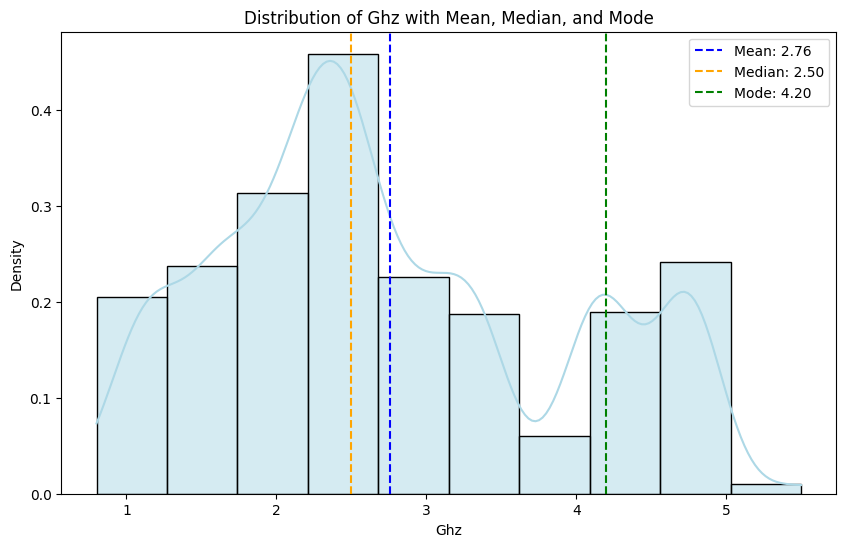

In [243]:
# Calculate mean, median, and mode
mean_ghz = df['Ghz'].mean()
median_ghz = df['Ghz'].median()
mode_ghz = df['Ghz'].mode()[0]

# Set up the figure
plt.figure(figsize=(10, 6))

# Create a histogram with a kernel density estimate (KDE)
sns.histplot(df['Ghz'], bins=10, kde=True, color='lightblue', stat='density')

# Overlay the mean, median, and mode
plt.axvline(mean_ghz, color='blue', linestyle='--', label='Mean: {:.2f}'.format(mean_ghz))
plt.axvline(median_ghz, color='orange', linestyle='--', label='Median: {:.2f}'.format(median_ghz))
plt.axvline(mode_ghz, color='green', linestyle='--', label='Mode: {:.2f}'.format(mode_ghz))

# Add titles and labels
plt.title('Distribution of Ghz with Mean, Median, and Mode')
plt.xlabel('Ghz')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

Se obeserva ca distributia nu e comlpet normala. Mean e mai mare decat median, iar mode e mult mai mare decat amandoua. Asadar pentru a evita outlierii se va va folosi **median**. 

In [244]:
df['Ghz'] = df['Ghz'].fillna(median_ghz)
print(df.Ghz.isna().sum())

0


### Inlocuire valori lipsa din coloana **Display**
Coloana are un singur element lipsa, asadar va fi inlocuit cu valoare care apare de cele mai mlte ori(mode).

In [245]:
mode_display = df['Display'].mode()[0]
df['Display'] = df['Display'].fillna(mode_display)
print(df.Display.isna().sum())

0


### Inlocuire valori lipsa din coloana **Adapter**

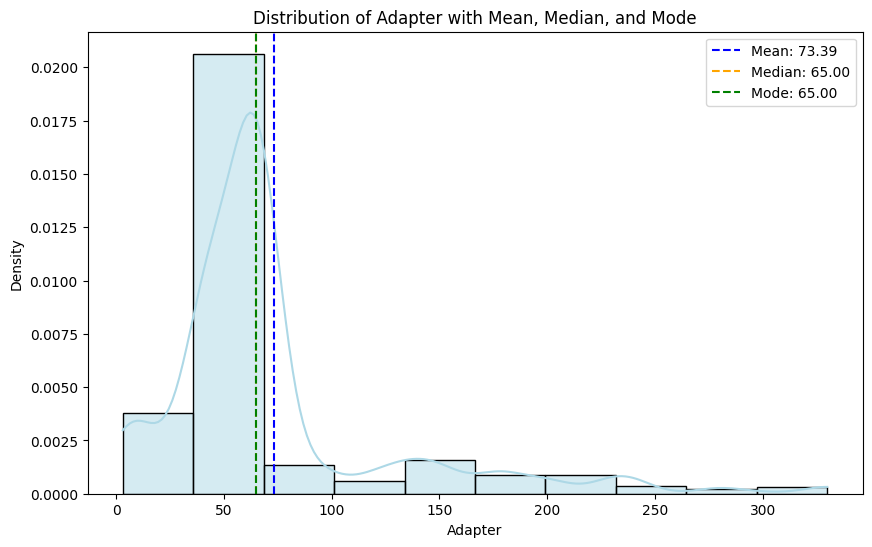

In [246]:
# Calculate mean, median, and mode
mean_adapter = df['Adapter'].mean()
median_adapter = df['Adapter'].median()
mode_adapter = df['Adapter'].mode()[0]

# Set up the figure
plt.figure(figsize=(10, 6))

# Create a histogram with a kernel density estimate (KDE)
sns.histplot(df['Adapter'], bins=10, kde=True, color='lightblue', stat='density')

# Overlay the mean, median, and mode
plt.axvline(mean_adapter, color='blue', linestyle='--', label='Mean: {:.2f}'.format(mean_adapter))
plt.axvline(median_adapter, color='orange', linestyle='--', label='Median: {:.2f}'.format(median_adapter))
plt.axvline(mode_adapter, color='green', linestyle='--', label='Mode: {:.2f}'.format(mode_adapter))

# Add titles and labels
plt.title('Distribution of Adapter with Mean, Median, and Mode')
plt.xlabel('Adapter')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

Se obeserva ca sunt multi outlieri, deci mean va fi afectata. Median si mode au aceeasi valoare, asadar vom alege una dintre ele, si anume **median**.

In [247]:
df['Adapter'] = df['Adapter'].fillna(median_adapter)
print(df.Adapter.isna().sum())

0


In [248]:
df.isna().sum()

Brand              0
Price              0
Processor_Brand    0
RAM                0
RAM_TYPE           0
Ghz                0
Display_type       0
Display            0
GPU_Brand          0
Adapter            0
GPU_Type           0
GPU_Memory         0
RAM_Rank           0
Processor_Type     0
Generation         0
Cores              0
OS                 0
Laptop_Type        0
Has_SSD            0
Has_HDD            0
Storage            0
dtype: int64

## Corelatie

### Selectarea coloanelor numerice pentru matricea de corelatie

In [249]:
numeric_columns = df.select_dtypes(include=['number'])
numeric_columns

,Price,RAM,Ghz,Display,Adapter,GPU_Memory,RAM_Rank,Generation,Cores,Has_SSD,Has_HDD,Storage
0,1241.460,4,2.0,11.6,45.0,4.0,2,11.0,8.0,1,0,64.0
1,1959.606,8,4.0,15.6,65.0,4.0,2,11.0,6.0,1,0,512.0
2,4239.000,16,3.3,15.6,56.0,4.0,1,12.0,8.0,1,0,512.0
3,2996.460,8,4.2,15.6,7.3,4.0,2,12.0,8.0,1,0,512.0
4,1187.460,8,1.7,15.6,45.0,4.0,2,11.0,8.0,1,0,512.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3936,4589.460,8,1.6,14.0,65.0,2.0,2,8.0,8.0,1,0,512.0
3937,2161.674,8,4.0,15.6,65.0,4.0,2,11.0,8.0,1,0,256.0
3938,4103.460,16,3.1,15.6,120.0,4.0,2,11.0,8.0,1,0,1024.0
3939,3883.086,8,2.1,15.6,150.0,4.0,2,11.0,4.0,1,0,512.0


### Afisare matrice de corelatie

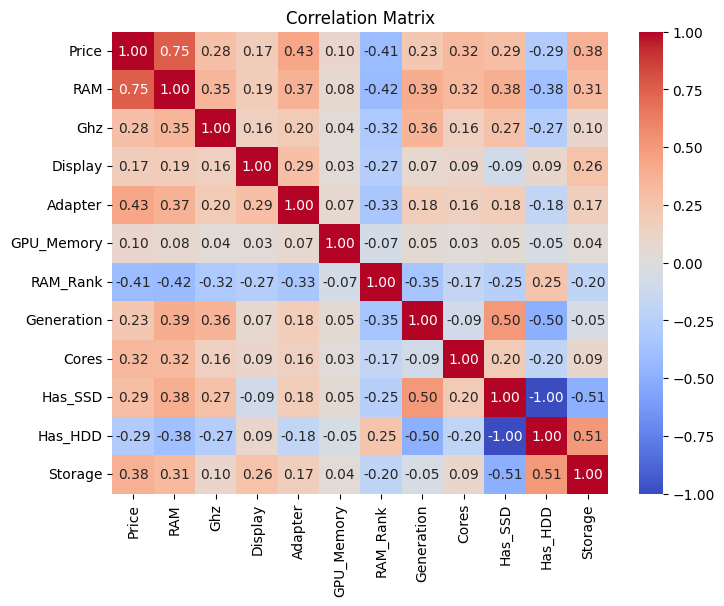

In [250]:
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [251]:
sorted_df = df.sort_values(by='Price', ascending=False).head(100)
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Print the sorted DataFrame
print(sorted_df)

# Reset options to default if needed
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

          Brand      Price Processor_Brand  RAM RAM_TYPE  Ghz Display_type  \
1235     Lenovo  27210.060           Intel   32     DDR5  2.3          LCD   
3504         HP  26966.142           Intel   16     DDR4  2.6          LED   
1149     Lenovo  24299.460           Intel   32     DDR5  2.2          LCD   
2520        MSI  23759.460           Intel   64     DDR5  4.8          LCD   
2727       ASUS  22733.460           Intel   32     DDR5  2.3          LCD   
2601        MSI  22139.460           Intel   64     DDR5  5.5          LCD   
1069        MSI  21599.460           Intel   32     DDR5  1.6          LCD   
899         MSI  21059.460           Intel   64     DDR5  4.8          LCD   
2485       Dell  20978.460           Intel   32     DDR4  4.8          LCD   
1068     Lenovo  20114.460           Intel   32     DDR5  2.2          LCD   
951        ASUS  19709.460           Intel   32     DDR5  2.6          LCD   
963        ASUS  19547.460             AMD   32     DDR5  4.8   

In [252]:
df.columns

Index(['Brand', 'Price', 'Processor_Brand', 'RAM', 'RAM_TYPE', 'Ghz',
       'Display_type', 'Display', 'GPU_Brand', 'Adapter', 'GPU_Type',
       'GPU_Memory', 'RAM_Rank', 'Processor_Type', 'Generation', 'Cores', 'OS',
       'Laptop_Type', 'Has_SSD', 'Has_HDD', 'Storage'],
      dtype='object')

In [253]:
df.dtypes

Brand               object
Price              float64
Processor_Brand     object
RAM                  int64
RAM_TYPE            object
Ghz                float64
Display_type        object
Display            float64
GPU_Brand           object
Adapter            float64
GPU_Type            object
GPU_Memory         float64
RAM_Rank             int64
Processor_Type      object
Generation         float64
Cores              float64
OS                  object
Laptop_Type         object
Has_SSD              int64
Has_HDD              int64
Storage            float64
dtype: object

## One-hot Encoding

Pentru a diferentia categoriile de branduri(laptop, cpu, gpu) la codificare se va specifica categoria in numele coloanei.


In [254]:
laptop_brands = pd.get_dummies(df['Brand'])
laptop_brands.columns = [col + "_Laptop" for col in laptop_brands.columns]

cpu_brands = pd.get_dummies(df['Processor_Brand'])
cpu_brands.columns = [col + "_CPU" for col in cpu_brands.columns]

gpu_brands = pd.get_dummies(df['GPU_Brand'])
gpu_brands.columns = [col + "_GPU" for col in gpu_brands.columns]

display_types = pd.get_dummies(df['Display_type'])
display_types.columns = [col + "_Display" for col in display_types.columns]

gpu_types = pd.get_dummies(df['GPU_Type'])
gpu_types.columns = [col + " GPU" for col in gpu_types.columns]

laptop_types = pd.get_dummies(df['Laptop_Type'])
laptop_types.columns = [col + "_Laptop" for col in laptop_types.columns]

# cpu_types = pd.get_dummies(df['Processor_Name'])
os = pd.get_dummies(df['OS'])
processor_types = pd.get_dummies(df['Processor_Type'])
# gpu_types = pd.get_dummies(df['GPU'])

ram_types = pd.get_dummies(df['RAM_TYPE'])
ram_types.columns = [col + "_RAM" for col in ram_types.columns]



display_types = display_types.astype(int)
laptop_brands = laptop_brands.astype(int)
cpu_brands = cpu_brands.astype(int)
gpu_brands = gpu_brands.astype(int)
# cpu_types = cpu_types.astype(int)
gpu_types = gpu_types.astype(int)
os = os.astype(int)
processor_types = processor_types.astype(int)
laptop_types = laptop_types.astype(int)
ram_types = ram_types.astype(int)

df = df.join(laptop_brands)
df = df.join(cpu_brands)
df = df.join(gpu_brands)
df = df.join(display_types)
# df = df.join(cpu_types)
df = df.join(gpu_types)
df = df.join(os)
df = df.join(processor_types)
df = df.join(laptop_types)
df = df.join(ram_types)

# stergere coloane
df.drop(['Display_type', 'Brand', 'Processor_Brand', 'GPU_Brand', 'OS', 'Processor_Type', 'GPU_Type', 'RAM_TYPE', 'Laptop_Type'], axis=1, inplace=True)

df.head()

,Price,RAM,Ghz,Display,Adapter,GPU_Memory,RAM_Rank,Generation,Cores,Has_SSD,...,Gaming_Laptop,High Performance_Laptop,Multimedia_Laptop,Office_Laptop,Ultrabook_Laptop,Workstation_Laptop,DDR2_RAM,DDR3_RAM,DDR4_RAM,DDR5_RAM
0,1241.460,4,2.0,11.6,45.0,4.0,2,11.0,8.0,1,...,0,0,0,0,0,0,0,0,1,0
1,1959.606,8,4.0,15.6,65.0,4.0,2,11.0,6.0,1,...,0,0,0,1,0,0,0,0,1,0
2,4239.000,16,3.3,15.6,56.0,4.0,1,12.0,8.0,1,...,1,0,0,0,0,0,0,0,0,1
3,2996.460,8,4.2,15.6,7.3,4.0,2,12.0,8.0,1,...,0,0,0,0,1,0,0,0,1,0
4,1187.460,8,1.7,15.6,45.0,4.0,2,11.0,8.0,1,...,0,0,0,1,0,0,0,0,1,0


### Matricea de corelatie pentru toate coloanele

In [255]:
df.corr()

,Price,RAM,Ghz,Display,Adapter,GPU_Memory,RAM_Rank,Generation,Cores,Has_SSD,...,Gaming_Laptop,High Performance_Laptop,Multimedia_Laptop,Office_Laptop,Ultrabook_Laptop,Workstation_Laptop,DDR2_RAM,DDR3_RAM,DDR4_RAM,DDR5_RAM
Price,1.000000,0.751975,0.280489,0.172810,0.433341,0.096674,-0.414516,0.228131,0.324182,0.293840,...,0.176442,0.032072,-0.095844,-0.277490,0.037221,0.611435,-0.015656,-0.124957,-0.298518,0.429188
RAM,0.751975,1.000000,0.350234,0.187555,0.368467,0.075519,-0.423930,0.390919,0.316548,0.383667,...,0.190079,0.103040,-0.126331,-0.273264,0.106002,0.473988,-0.017856,-0.200947,-0.222213,0.390696
Ghz,0.280489,0.350234,1.000000,0.160979,0.200537,0.039429,-0.316089,0.357894,0.158655,0.268842,...,0.225364,0.023588,-0.060771,-0.169231,0.037628,0.173701,-0.013672,-0.163210,-0.150487,0.282484
Display,0.172810,0.187555,0.160979,1.000000,0.288459,0.032449,-0.269200,0.072400,0.093921,-0.087671,...,0.343514,-0.090222,0.008997,-0.099522,-0.215636,0.192290,0.008212,-0.130820,-0.140179,0.248082
Adapter,0.433341,0.368467,0.200537,0.288459,1.000000,0.072278,-0.328809,0.183642,0.162367,0.183596,...,0.354333,-0.021353,-0.069902,-0.152178,-0.230504,0.430865,-0.002241,-0.093646,-0.244406,0.345135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Workstation_Laptop,0.611435,0.473988,0.173701,0.192290,0.430865,0.094837,-0.361566,0.196983,0.123193,0.116938,...,-0.148097,-0.048067,-0.033438,-0.155317,-0.145046,1.000000,-0.004146,-0.052836,-0.325292,0.412265
DDR2_RAM,-0.015656,-0.017856,-0.013672,0.008212,-0.002241,-0.000982,0.089226,0.003132,-0.028399,-0.035456,...,-0.009066,-0.002942,-0.002047,-0.009508,-0.008879,-0.004146,1.000000,-0.003234,-0.039896,-0.005242
DDR3_RAM,-0.124957,-0.200947,-0.163210,-0.130820,-0.093646,-0.022282,0.584425,-0.274746,-0.152193,-0.246443,...,-0.103416,-0.037496,-0.026084,-0.121158,-0.036636,-0.052836,-0.003234,1.000000,-0.508400,-0.066800
DDR4_RAM,-0.298518,-0.222213,-0.150487,-0.140179,-0.244406,-0.054167,0.392621,-0.067798,-0.010385,0.013709,...,-0.130986,-0.000500,0.051306,0.238312,0.153249,-0.325292,-0.039896,-0.508400,1.000000,-0.823997


## Gini Index

In [256]:
def gini_coefficient(data):
    sorted_data = np.sort(data)
    n = data.size
    cumulative_values = np.cumsum(sorted_data)
    gini_index = (n + 1 - 2 * np.sum(cumulative_values) / cumulative_values[-1]) / n
    return gini_index

gini_index_ghz = gini_coefficient(df['Ghz'].values)
gini_index_price = gini_coefficient(df['Price'].values)
gini_index_ram = gini_coefficient(df['RAM'].values)
gini_index_display = gini_coefficient(df['Display'].values)
gini_index_storage = gini_coefficient(df['Storage'].values)

print(f"Gini Index for Ghz: {gini_index_ghz:.4f}")
print(f"Gini Index for Price: {gini_index_price:.4f}")
print(f"Gini Index for RAM: {gini_index_ram:.4f}")
print(f"Gini Index for Disaply: {gini_index_display:.4f}")
print(f"Gini Index for Storage: {gini_index_storage:.4f}")


Gini Index for Ghz: 0.2252
Gini Index for Price: 0.3384
Gini Index for RAM: 0.2742
Gini Index for Disaply: 0.0339
Gini Index for Storage: 0.2696


### Curba lui Lorenz

In [257]:
def plot_lorenz_curve(series):

    # Step 1: Extract and sort the values
    sorted_values = np.sort(series.dropna())

    # Step 2: Calculate cumulative values
    n = len(sorted_values)
    cumulative_values = np.cumsum(sorted_values)
    total = cumulative_values[-1]
    cumulative_proportions = cumulative_values / total

    # Step 3: Create cumulative population proportions
    population_proportions = np.arange(1, n + 1) / n

    # Step 4: Plot the Lorenz curve
    plt.figure(figsize=(8, 6))
    plt.plot(population_proportions, cumulative_proportions, label='Lorenz Curve', color='blue')
    plt.plot([0, 1], [0, 1], label='Line of Equality', color='red', linestyle='--')
    plt.title(f'Lorenz Curve for {series.name}')
    plt.xlabel('Cumulative Share of Population')
    plt.ylabel('Cumulative Share of Values')
    plt.legend()
    plt.grid()
    plt.show()

#### Coloana **Ghz**

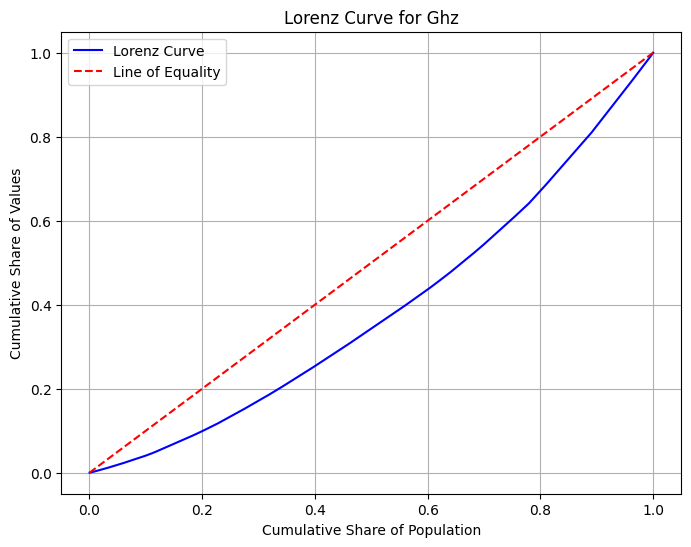

In [258]:
plot_lorenz_curve(df['Ghz'])

#### Coloana **Price**

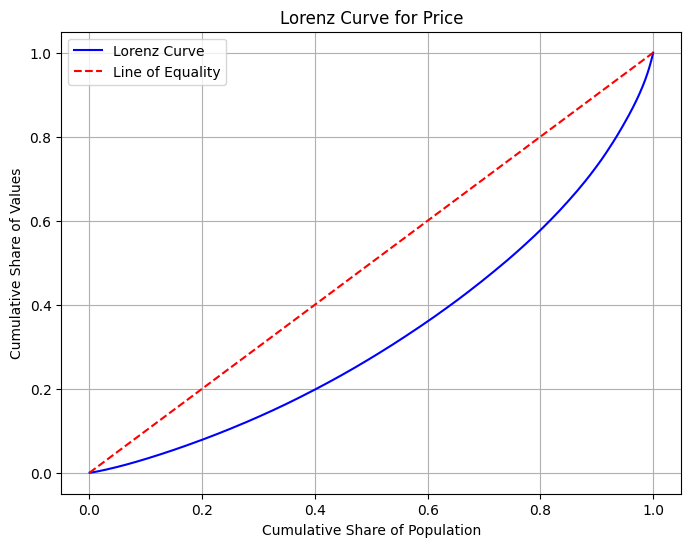

In [259]:
plot_lorenz_curve(df['Price'])

#### Coloana **RAM**

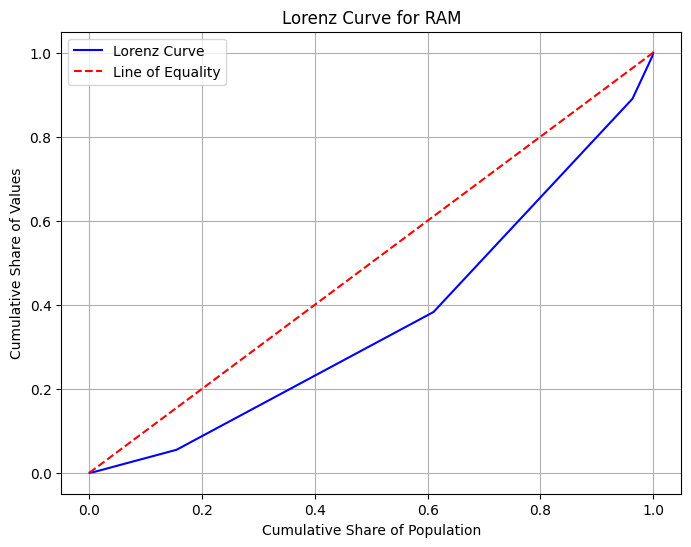

In [260]:
plot_lorenz_curve(df['RAM'])

#### Coloana **Display**

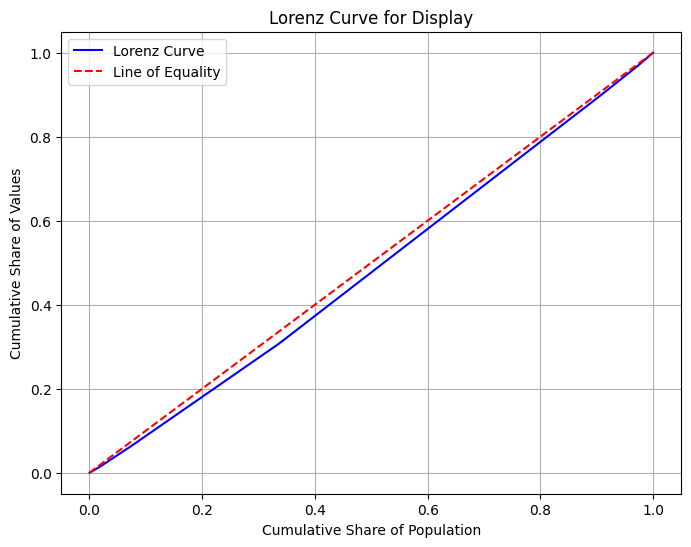

In [261]:
plot_lorenz_curve(df['Display'])

#### Coloana **Storage**

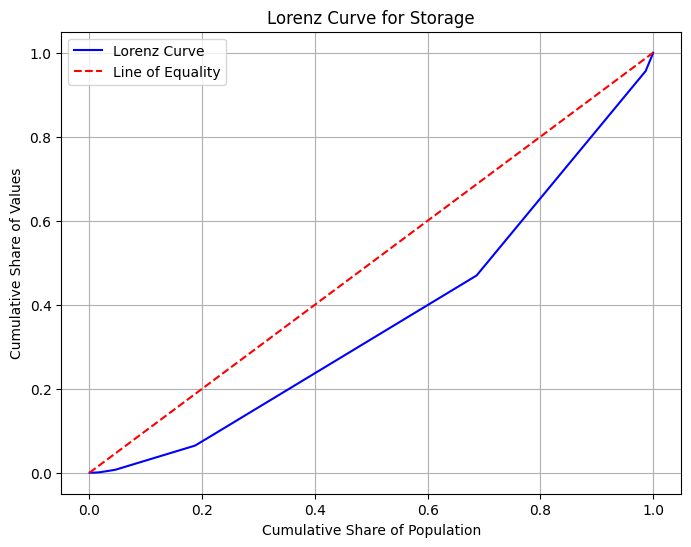

In [262]:
plot_lorenz_curve(df['Storage'])

## Relatii intre Price si celelalte coloane

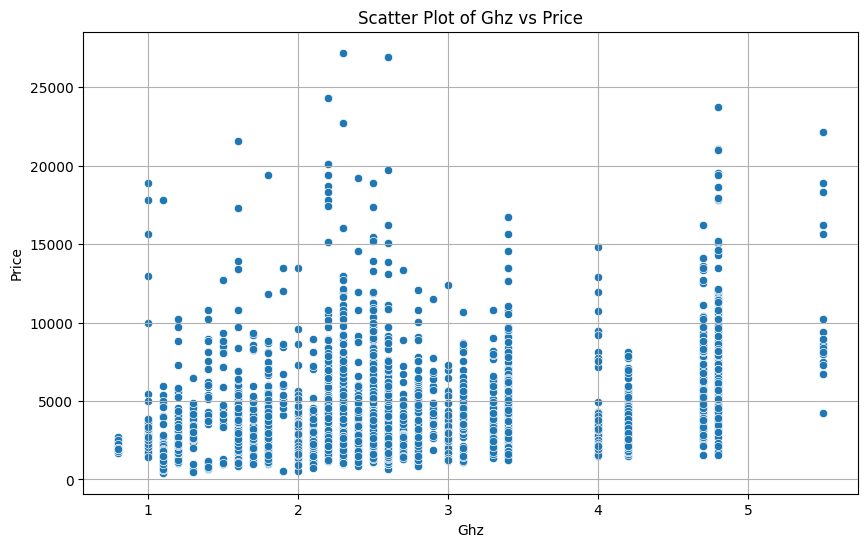

In [263]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Ghz', y='Price')
plt.title('Scatter Plot of Ghz vs Price')
plt.xlabel('Ghz')
plt.ylabel('Price')
plt.grid()
plt.show()

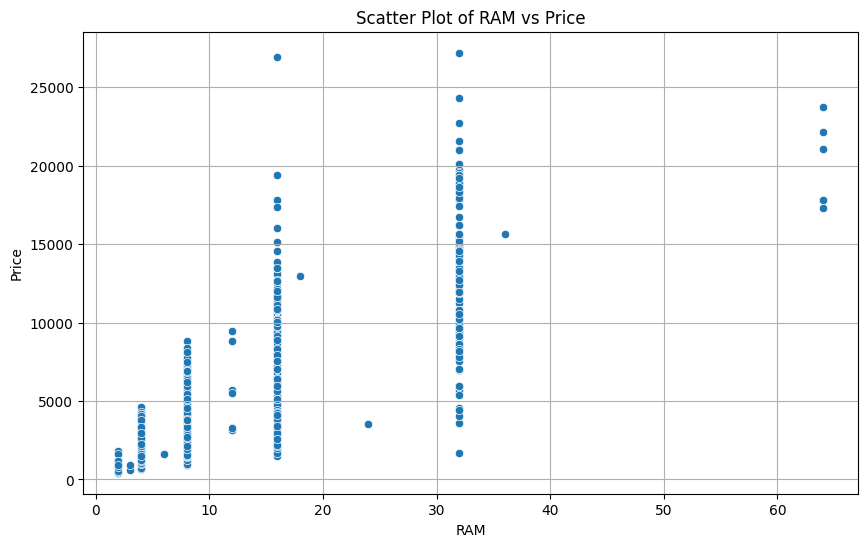

In [264]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RAM', y='Price')
plt.title('Scatter Plot of RAM vs Price')
plt.xlabel('RAM')
plt.ylabel('Price')
plt.grid()
plt.show()

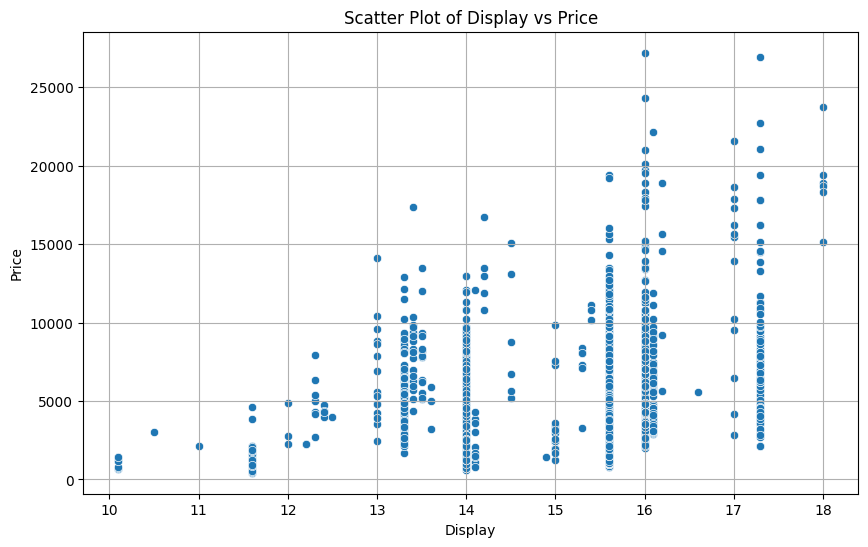

In [265]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Display', y='Price')
plt.title('Scatter Plot of Display vs Price')
plt.xlabel('Display')
plt.ylabel('Price')
plt.grid()
plt.show()

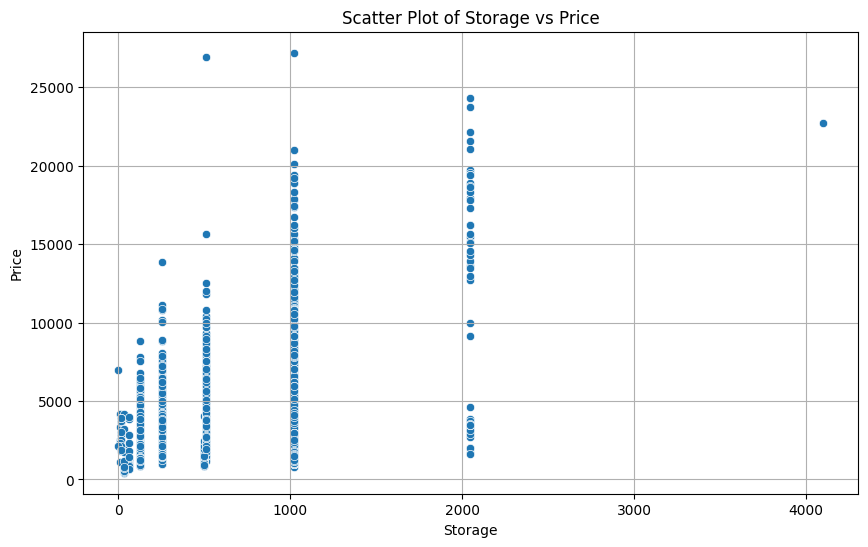

In [266]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Storage', y='Price')
plt.title('Scatter Plot of Storage vs Price')
plt.xlabel('Storage')
plt.ylabel('Price')
plt.grid()
plt.show()

In [267]:
price_correlations = df.corr()['Price'].apply(abs).sort_values(ascending=False)
price_correlations

Price                 1.000000
RAM                   0.751975
Workstation_Laptop    0.611435
Core i9               0.475607
Adapter               0.433341
                        ...   
HD 6000 GPU           0.000865
MX 450 GPU            0.000780
HD 515 GPU            0.000234
Core M5               0.000234
Radeon 760M GPU       0.000136
Name: Price, Length: 331, dtype: float64

In [268]:
selected_features = price_correlations[:].index.tolist()
# selected_features.remove('Price')
selected_features

['Price',
 'RAM',
 'Workstation_Laptop',
 'Core i9',
 'Adapter',
 'DDR5_RAM',
 'NVIDIA_GPU',
 'RAM_Rank',
 'Storage',
 'Core i7',
 'Cores',
 'Budget_Laptop',
 'Core i3',
 'DDR4_RAM',
 'Has_HDD',
 'Has_SSD',
 'RTX 4080 GPU',
 'RTX 4090 GPU',
 'Ghz',
 'Intel_GPU',
 'Office_Laptop',
 'UHD GPU',
 'RTX 4070 GPU',
 'Generation',
 'RTX 3080 Ti GPU',
 'Windows 11',
 'RTX 3070 Ti GPU',
 'AMD_GPU',
 'MSI_Laptop',
 'RTX 3060 GPU',
 'Ryzen 9',
 'Gaming_Laptop',
 'RTX 4060 GPU',
 'Display',
 'RTX 2080 GPU',
 'Core Ultra 7',
 'Apple_Laptop',
 'Core Ultra 9',
 'DOS',
 'Celeron',
 'Apple_GPU',
 'Apple_CPU',
 'LED_Display',
 'LCD_Display',
 'Windows 10',
 'RTX 3080 GPU',
 'macOS Ventura',
 'Ryzen 3',
 'DDR3_RAM',
 'Radeon GPU',
 'Core i5',
 'Arc GPU',
 'M2 Max GPU',
 'Apple M2 Max',
 'RTX 3070 GPU',
 'RTX 4050 GPU',
 'Pentium',
 'Ryzen 5',
 'RTX 3000 Ada GPU',
 'Ryzen 7',
 'RTX 3050 Ti GPU',
 'GPU_Memory',
 'Multimedia_Laptop',
 'HD 620 GPU',
 'UHD 600 GPU',
 'Apple M2 Pro',
 'Lenovo_Laptop',
 'Razer_L

In [270]:

df['GPU_Performance'] = df['GPU_Memory'] / df['RAM']
df['Ghz_times_Cores'] = df['Ghz'] * df['Cores']
df['Peformance(Ghz*RAM)'] = df['Ghz'] * df['RAM']


df['Display_to_Adapter'] = df['Display'] / df['Adapter'] 
df['Display_to_RAM'] = df['Display'] / df['RAM']
df['Display_to_GPU_Memory'] = df['Display'] / df['GPU_Memory']
df['Display_to_GPU_Performance'] = df['Display'] / df['GPU_Performance']
df['Display_to_Cores'] = df['Display'] / df['Cores']
df['Display_to_Generation'] = df['Display'] / df['Generation']
df['Display_to_Ghz'] = df['Display'] / df['Ghz']
df['Display_to_Storage'] = df['Display'] / df['Storage'] 

df['Display_times_Adapter'] = df['Display'] * df['Adapter'] 
df['Display_times_RAM'] = df['Display'] * df['RAM']
df['Display_times_GPU_Memory'] = df['Display'] * df['GPU_Memory']
df['Display_times_GPU_Performance'] = df['Display'] * df['GPU_Performance']
df['Display_times_Cores'] = df['Display'] * df['Cores']
df['Display_times_Generation'] = df['Display'] * df['Generation']
df['Display_times_Ghz'] = df['Display'] * df['Ghz']
df['Display_times_Storage'] = df['Display'] * df['Storage'] 

df['Storage_to_Adapter'] = df['Storage'] / df['Adapter'] 
df['Storage_to_RAM'] = df['Storage'] / df['RAM']
df['Storage_to_GPU_Memory'] = df['Storage'] / df['GPU_Memory']
df['Storage_to_GPU_Performance'] = df['Storage'] / df['GPU_Performance']
df['Storage_to_Cores'] = df['Storage'] / df['Cores']
df['Storage_to_Generation'] = df['Storage'] / df['Generation']
df['Storage_to_Ghz'] = df['Storage'] / df['Ghz']

df['Storage_times_Adapter'] = df['Storage'] * df['Adapter'] 
df['Storage_times_RAM'] = df['Storage'] * df['RAM'] #
df['Storage_times_GPU_Memory'] = df['Storage'] * df['GPU_Memory']
df['Storage_times_GPU_Performance'] = df['Storage'] * df['GPU_Performance']
df['Storage_times_Cores'] = df['Storage'] * df['Cores']
df['Storage_times_Generation'] = df['Storage'] * df['Generation']
df['Storage_times_Ghz'] = df['Storage'] * df['Ghz']


df['Ghz_to_Adapter'] = df['Ghz'] / df['Adapter'] 
df['Ghz_to_RAM'] = df['Ghz'] / df['RAM']
df['Ghz_to_GPU_Memory'] = df['Ghz'] / df['GPU_Memory']
df['Ghz_to_GPU_Performance'] = df['Ghz'] / df['GPU_Performance']
df['Ghz_to_Cores'] = df['Ghz'] / df['Cores']
df['Ghz_to_Generation'] = df['Ghz'] / df['Generation']
df['Ghz_to_Storage'] = df['Ghz'] / df['Storage'] 

df['Ghz_times_Adapter'] = df['Ghz'] * df['Adapter'] 
df['Ghz_times_GPU_Memory'] = df['Ghz'] * df['GPU_Memory']
df['Ghz_times_GPU_Performance'] = df['Ghz'] * df['GPU_Performance']
df['Ghz_times_Cores'] = df['Ghz'] * df['Cores']
df['Ghz_times_Generation'] = df['Ghz'] * df['Generation']

df['Ghz_times_Storage'] = df['Display'] * df['Storage'] 

df.head()

,Price,RAM,Ghz,Display,Adapter,GPU_Memory,RAM_Rank,Generation,Cores,Has_SSD,...,Ghz_to_GPU_Memory,Ghz_to_GPU_Performance,Ghz_to_Cores,Ghz_to_Generation,Ghz_to_Storage,Ghz_times_Adapter,Ghz_times_GPU_Memory,Ghz_times_GPU_Performance,Ghz_times_Generation,Ghz_times_Storage
0,1241.460,4,2.0,11.6,45.0,4.0,2,11.0,8.0,1,...,0.500,2.0,0.250000,0.181818,0.031250,90.00,8.0,2.000,22.0,742.4
1,1959.606,8,4.0,15.6,65.0,4.0,2,11.0,6.0,1,...,1.000,8.0,0.666667,0.363636,0.007812,260.00,16.0,2.000,44.0,7987.2
2,4239.000,16,3.3,15.6,56.0,4.0,1,12.0,8.0,1,...,0.825,13.2,0.412500,0.275000,0.006445,184.80,13.2,0.825,39.6,7987.2
3,2996.460,8,4.2,15.6,7.3,4.0,2,12.0,8.0,1,...,1.050,8.4,0.525000,0.350000,0.008203,30.66,16.8,2.100,50.4,7987.2
4,1187.460,8,1.7,15.6,45.0,4.0,2,11.0,8.0,1,...,0.425,3.4,0.212500,0.154545,0.003320,76.50,6.8,0.850,18.7,7987.2


#### Creare coloana noua - Display_category

creare coloana noua pt a imparti coloana Display in small/medium/large

In [273]:
# Define bins and labels for categorization
bins = [0, 13, 15.6, np.inf]
labels = ['Small', 'Medium', 'Large']
# Create a new column 'Display_Category' based on 'Display' size
df['Display_Category'] = pd.cut(df['Display'], bins=bins, labels=labels, right=False)
# Example showing the result
df.head()

,Price,RAM,Ghz,Display,Adapter,GPU_Memory,RAM_Rank,Generation,Cores,Has_SSD,...,Ghz_to_GPU_Performance,Ghz_to_Cores,Ghz_to_Generation,Ghz_to_Storage,Ghz_times_Adapter,Ghz_times_GPU_Memory,Ghz_times_GPU_Performance,Ghz_times_Generation,Ghz_times_Storage,Display_Category
0,1241.460,4,2.0,11.6,45.0,4.0,2,11.0,8.0,1,...,2.0,0.250000,0.181818,0.031250,90.00,8.0,2.000,22.0,742.4,Small
1,1959.606,8,4.0,15.6,65.0,4.0,2,11.0,6.0,1,...,8.0,0.666667,0.363636,0.007812,260.00,16.0,2.000,44.0,7987.2,Large
2,4239.000,16,3.3,15.6,56.0,4.0,1,12.0,8.0,1,...,13.2,0.412500,0.275000,0.006445,184.80,13.2,0.825,39.6,7987.2,Large
3,2996.460,8,4.2,15.6,7.3,4.0,2,12.0,8.0,1,...,8.4,0.525000,0.350000,0.008203,30.66,16.8,2.100,50.4,7987.2,Large
4,1187.460,8,1.7,15.6,45.0,4.0,2,11.0,8.0,1,...,3.4,0.212500,0.154545,0.003320,76.50,6.8,0.850,18.7,7987.2,Large


In [274]:
# One-hot encoding for the Category column
segment_dummies = pd.get_dummies(df['Display_Category'])
segment_dummies.columns = [col + "_Display" for col in segment_dummies.columns]

# Convert the one-hot encoded columns to integer type
segment_dummies = segment_dummies.astype(int)

# Join the one-hot encoded columns to the original DataFrame
df = df.join(segment_dummies)
# Drop the original Category column if no longer needed
df.drop(['Display_Category'], axis=1, inplace=True)
# Display the updated DataFrame
df.head()

,Price,RAM,Ghz,Display,Adapter,GPU_Memory,RAM_Rank,Generation,Cores,Has_SSD,...,Ghz_to_Generation,Ghz_to_Storage,Ghz_times_Adapter,Ghz_times_GPU_Memory,Ghz_times_GPU_Performance,Ghz_times_Generation,Ghz_times_Storage,Small_Display,Medium_Display,Large_Display
0,1241.460,4,2.0,11.6,45.0,4.0,2,11.0,8.0,1,...,0.181818,0.031250,90.00,8.0,2.000,22.0,742.4,1,0,0
1,1959.606,8,4.0,15.6,65.0,4.0,2,11.0,6.0,1,...,0.363636,0.007812,260.00,16.0,2.000,44.0,7987.2,0,0,1
2,4239.000,16,3.3,15.6,56.0,4.0,1,12.0,8.0,1,...,0.275000,0.006445,184.80,13.2,0.825,39.6,7987.2,0,0,1
3,2996.460,8,4.2,15.6,7.3,4.0,2,12.0,8.0,1,...,0.350000,0.008203,30.66,16.8,2.100,50.4,7987.2,0,0,1
4,1187.460,8,1.7,15.6,45.0,4.0,2,11.0,8.0,1,...,0.154545,0.003320,76.50,6.8,0.850,18.7,7987.2,0,0,1


In [275]:
# low_price_df = df[df['Price'] < 10000]
# low_price_df['Price'] = np.log(low_price_df['Price'])

low_price_df = df
# low_price_df.head()


In [276]:
price_correlations = low_price_df.corr()['Price'].apply(abs).sort_values(ascending=False)
price_correlations[:10]

Price                         1.000000
Display_times_RAM             0.758366
RAM                           0.751975
Storage_times_RAM             0.734740
Peformance(Ghz*RAM)           0.648974
Workstation_Laptop            0.611435
Storage_times_Adapter         0.554693
Display_to_RAM                0.551824
Storage_to_GPU_Performance    0.542064
Storage_times_Generation      0.510480
Name: Price, dtype: float64

In [277]:
selected_features = price_correlations[:].index.tolist()
# selected_features.remove('Price')
selected_features

['Price',
 'Display_times_RAM',
 'RAM',
 'Storage_times_RAM',
 'Peformance(Ghz*RAM)',
 'Workstation_Laptop',
 'Storage_times_Adapter',
 'Display_to_RAM',
 'Storage_to_GPU_Performance',
 'Storage_times_Generation',
 'Storage_times_Ghz',
 'Storage_times_Cores',
 'Core i9',
 'Display_times_Adapter',
 'Ghz_times_Adapter',
 'Adapter',
 'DDR5_RAM',
 'Display_to_GPU_Performance',
 'NVIDIA_GPU',
 'RAM_Rank',
 'Ghz_to_RAM',
 'Ghz_to_GPU_Performance',
 'Display_times_Storage',
 'Ghz_times_Storage',
 'Storage',
 'Ghz_times_Cores',
 'Core i7',
 'Display_times_Cores',
 'Display_to_GPU_Memory',
 'Storage_times_GPU_Memory',
 'Cores',
 'Budget_Laptop',
 'Ghz_times_Generation',
 'Core i3',
 'Display_times_Ghz',
 'DDR4_RAM',
 'Has_HDD',
 'Has_SSD',
 'RTX 4080 GPU',
 'Storage_to_RAM',
 'RTX 4090 GPU',
 'Display_to_Cores',
 'Ghz',
 'Intel_GPU',
 'Display_times_Generation',
 'Office_Laptop',
 'UHD GPU',
 'RTX 4070 GPU',
 'Generation',
 'RTX 3080 Ti GPU',
 'Display_to_Ghz',
 'Windows 11',
 'RTX 3070 Ti GPU'

In [278]:
# low_price_df = df[df['Price'] < 100000]
# low_price_df

# low_price_df = df

# limited_df = df[selected_features].copy()
limited_df = low_price_df[selected_features].copy()
# limited_df = low_price_df.copy()

In [279]:
# # # # Calculate the correlation matrix
# # correlation_matrix = df[['Price', 'Price_per_Ghz', 'Price_per_RAM', 'Price_per_Storage',  'Price_per_Adapter', 'Price_per_Display', 'Ghz', 'RAM', 'Display',
# #                          'Storage', 'Adapter']].corr()
# # correlation_matrix = df[[ 'Price','RAM_to_Storage_Ratio', 'Peformance(Ghz*RAM)', 'Display_times_RAM', 'Ghz_times_Adapter',  'Storage_times_RAM',
# #                          'Display_to_Adapter', 'Display_times_Adapter', 'Display_times_Ghz', 'Display_to_RAM', 'Price_per_Ghz', 'Price_per_RAM', 'Price_per_Storage',  'Price_per_Adapter' ]].corr()

# correlation_matrix = df[['Price', 
#                           'Peformance(Ghz*RAM)', 
#                           'Display_times_RAM', 
#                           'Ghz_times_Adapter', 
#                           'Storage_times_RAM',
#                           'Display_to_Adapter', 
#                           'Display_times_Adapter', 
#                           'Display_times_Ghz', 
#                           'Display_to_RAM', 
#                           'GPU_Performance', 
#                           'Ghz_times_Cores', 
#                           'Display_to_GPU_Memory', 
#                           'Display_to_GPU_Performance', 
#                           'Display_to_Cores', 
#                           'Display_to_Generation', 
#                           'Display_to_Ghz', 
#                           'Display_to_Storage', 
#                           'Display_times_GPU_Memory', 
#                           'Display_times_GPU_Performance', 
#                           'Display_times_Cores', 
#                           'Display_times_Generation', 
#                           'Display_times_Storage', 
#                           'Storage_to_Adapter', 
#                           'Storage_to_RAM', 
#                           'Storage_to_GPU_Memory', 
#                           'Storage_to_GPU_Performance', 
#                           'Storage_to_Cores', 
#                           'Storage_to_Generation', 
#                           'Storage_to_Ghz', 
#                           'Storage_times_Adapter', 
#                           'Storage_times_RAM', 
#                           'Storage_times_GPU_Memory', 
#                           'Storage_times_GPU_Performance', 
#                           'Storage_times_Cores', 
#                           'Storage_times_Generation', 
#                           'Storage_times_Ghz', 
#                           'Ghz_to_Adapter', 
#                           'Ghz_to_RAM', 
#                           'Ghz_to_GPU_Memory', 
#                           'Ghz_to_GPU_Performance', 
#                           'Ghz_to_Cores', 
#                           'Ghz_to_Generation', 
#                           'Ghz_to_Storage', 
#                           'Ghz_times_GPU_Memory', 
#                           'Ghz_times_GPU_Performance', 
#                           'Ghz_times_Cores', 
#                           'Ghz_times_Generation', 
#                           'Ghz_times_Storage']].corr()


# # Create a heatmap
# plt.figure(figsize=(40, 20))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
# plt.title('Correlation Heatmap')
# plt.show()

## Modele

### Impartire dataset
70% antrenare, 30% testare

In [280]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# imartire dataset - 70% antrenare, 30% testare
X, y = limited_df.drop(columns=['Price']), limited_df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3152, 378), (789, 378), (3152,), (789,))

### Linear Regression

In [281]:
# antrenarea modelului
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# predictia pretului
y_pred = lr_model.predict(X_test)

# calcularea erorilor
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.3f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.3f}")

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape:.3f}")

r2 = lr_model.score(X_test, y_test)
print(f"R Squared: {r2:.3f}")

MSE: 1367749.354
MAE: 708.431
MAPE: 0.181
R Squared: 0.794


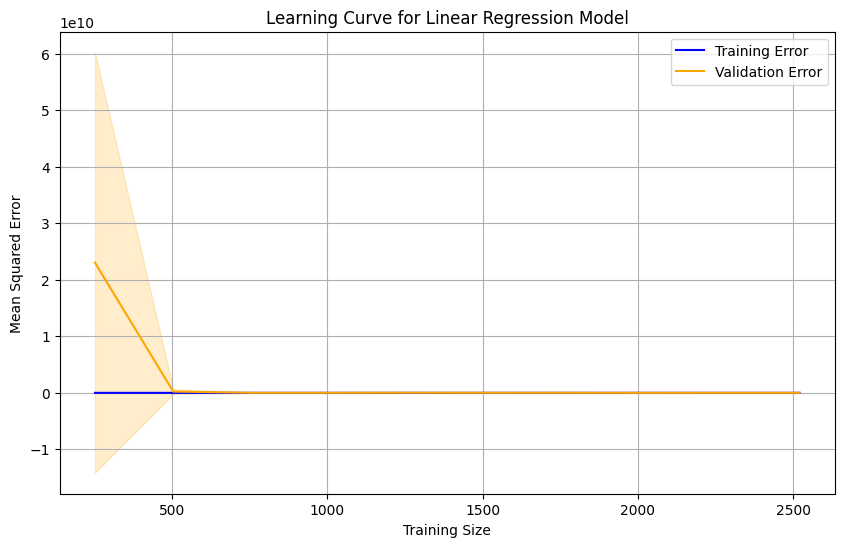

In [282]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    lr_model,
    X_train,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Compute mean and std of train and validation scores
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Error', color='orange')

# Plot shaded areas for standard deviation
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 color='blue', alpha=0.2)
plt.fill_between(train_sizes,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 color='orange', alpha=0.2)

plt.title('Learning Curve for Linear Regression Model')
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.grid()
plt.show()

#### Scatter Plot Valori Prezise vs Valori Corecte

Se observa ca modelul este destul de bun pentru preturi mici, dar pentru preturi mari acuratetea este slaba (valorile prezise sunt mai mici decat ar trebui).

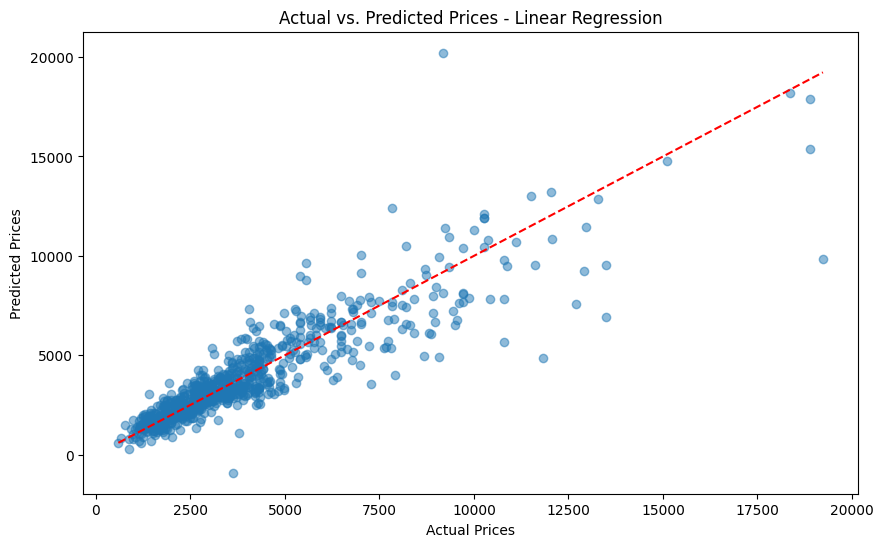

In [283]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices - Linear Regression')
plt.show()

#### Residual Plot

L-am folosit pentru a vedea diferenta dintre valorile prezise si cele corecte. Aici se observa ca modelul are heteroscedasticitate (erorile de predictie cresc odata cu pretul).

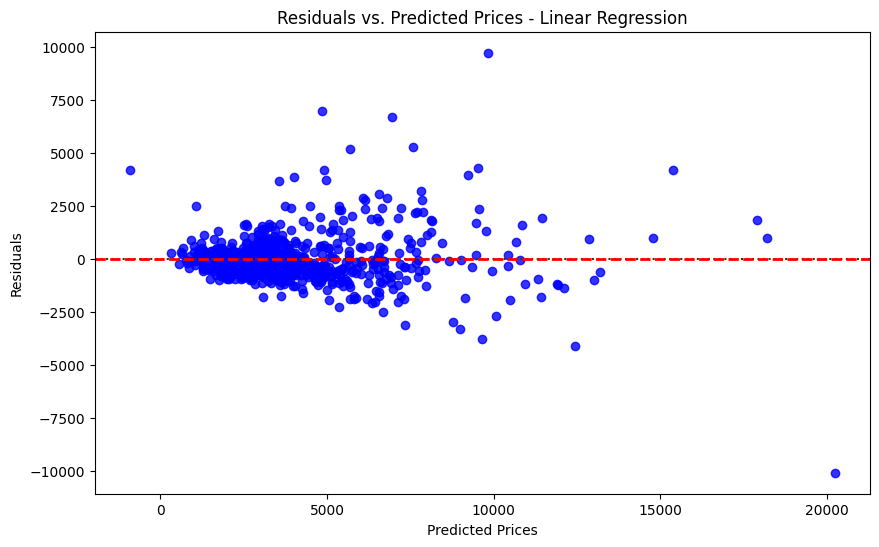

In [284]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, color='blue', 
               line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Prices - Linear Regression')
plt.axhline(0, linestyle='--', color='red', linewidth=2)
plt.show()

### Decision Tree Regressor

In [285]:
# Antrenarea modelului
dtr_model = DecisionTreeRegressor(random_state=1, max_depth=20, max_features=None, min_samples_split=100, min_samples_leaf=2)
dtr_model.fit(X_train, y_train)

# Predictia pretului
y_pred = dtr_model.predict(X_test)

# Calcularea erorilor
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.3f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.3f}")

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape:.3f}")

r2 = dtr_model.score(X_test, y_test)
print(f"R Squared: {r2:.3f}")

# MSE: 1690069.742
# MAE: 674.958
# MAPE: 0.154
# R Squared: 0.746

MSE: 2166180.840
MAE: 847.987
MAPE: 0.201
R Squared: 0.674


#### GridSearch
Pentru a gasi cei mai buni parametri.

In [286]:
# param_grid = {
#     'max_depth': [None, 5, 10, 15, 20, 12],
#     'min_samples_split': [ 2, 5, 10, 60, 80, 100, 120, 150],
#     'min_samples_leaf': [1, 2, 4, 5, 8],
#     'max_features': ['sqrt', 'log2', None]
# }

# # Set up the grid search
# grid_search = GridSearchCV(estimator=dtr_model, param_grid=param_grid, 
#                            scoring='neg_mean_absolute_error', cv=5, 
#                            n_jobs=-1, error_score='raise')

# # Fit the grid search
# grid_search.fit(X_train, y_train)

# # Best parameters and best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best MAE:", -grid_search.best_score_)

#### Scatter Plot Valori Prezise vs Valori Corecte

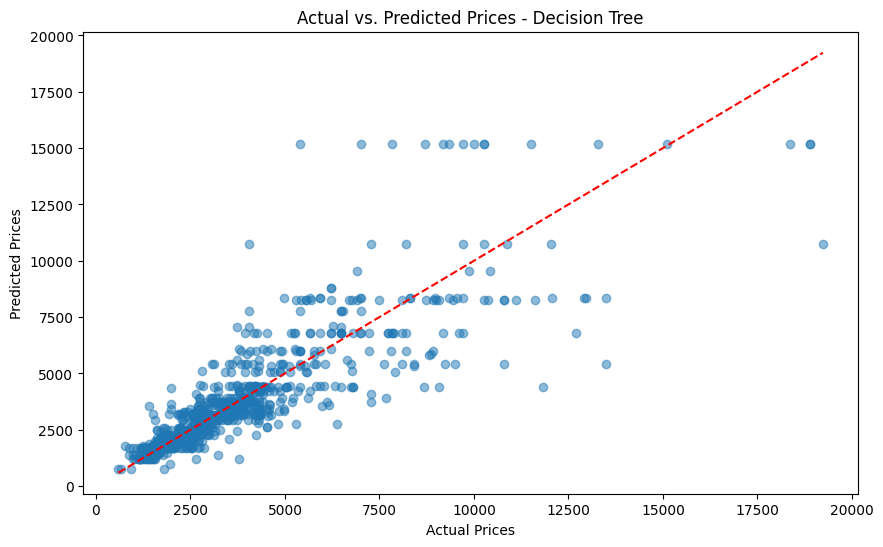

In [287]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices - Decision Tree')
plt.show()

#### Residual Plot

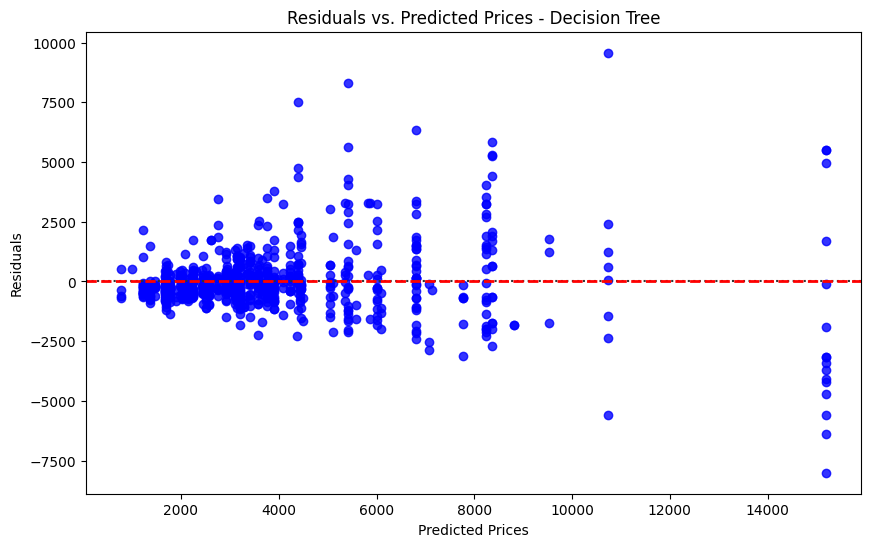

In [288]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, color='blue', 
               line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Prices - Decision Tree')
plt.axhline(0, linestyle='--', color='red', linewidth=2)
plt.show()

### Random Forest Regressor


In [289]:
# Antrenarea modelului
rf_model = RandomForestRegressor(n_estimators=50, random_state=42, max_depth=None, min_samples_split=5, min_samples_leaf=1, max_features='log2')  
rf_model.fit(X_train, y_train)

# Predictia pretului
y_pred = rf_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)


# Calcularea erorilor
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.3f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.3f}")

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape:.3f}")

r2 = rf_model.score(X_test, y_test)
print(f"R Squared: {r2:.3f}")

threshold_percentage = 0.05  # 10%

# Calculate the number of correct predictions
correct_predictions = np.abs(y_test - y_pred) <= (threshold_percentage * np.abs(y_test))

# Calculate the percentage of correct predictions
correct_percentage = np.mean(correct_predictions) * 100

print(f"Percentage of Correct Predictions (within {threshold_percentage * 100:.0f}%): {correct_percentage:.2f}%")


MSE: 1399838.945
MAE: 710.747
MAPE: 0.178
R Squared: 0.790
Percentage of Correct Predictions (within 5%): 20.28%


#### GridSearch

In [290]:
# rf_model = RandomForestRegressor(random_state=42)

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 5, 10, 15, 20],
#     'min_samples_split': [2, 5, 10, 20],
#     'min_samples_leaf': [1, 2, 4, 5, 10],
#     'max_features': ['sqrt', 'log2', None]
# }

# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
#                            scoring='neg_mean_absolute_error', cv=5, 
#                            n_jobs=-1, error_score='raise')

# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Best MAE:", -grid_search.best_score_)

#### Scatter Plot Valori Prezise vs Valori Corecte

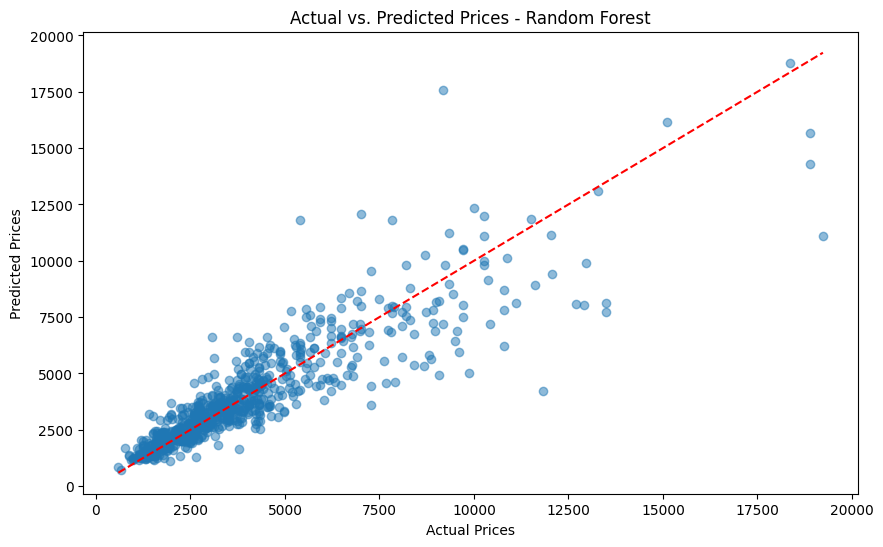

In [291]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices - Random Forest')
plt.show()

#### Residual Plot

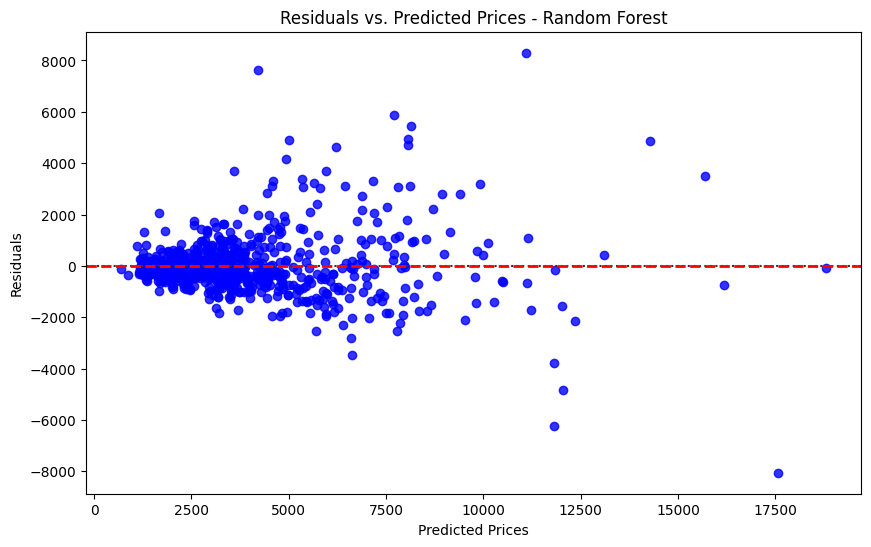

In [292]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, color='blue', 
               line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Prices - Random Forest')
plt.axhline(0, linestyle='--', color='red', linewidth=2)
plt.show()

### XGBoost

In [293]:

# Antrenarea modelului
xgb_model = xgb.XGBRegressor(
    n_estimators=200, 
    max_depth=None, 
    min_child_weight=1, 
    learning_rate=0.1,
    subsample=0.6,
    colsample_bytree=0.6,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Predictia pretului
y_pred = xgb_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Calcularea erorilor
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.3f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.3f}")

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape:.3f}")

r2 = xgb_model.score(X_test, y_test)
print(f"R Squared: {r2:.3f}")


threshold_percentage = 0.10  # 10%

# Calculate the number of correct predictions
correct_predictions = np.abs(y_test - y_pred) <= (threshold_percentage * np.abs(y_test))

# Calculate the percentage of correct predictions
correct_percentage = np.mean(correct_predictions) * 100

print(f"Percentage of Correct Predictions (within {threshold_percentage * 100:.0f}%): {correct_percentage:.2f}%")

MSE: 1286262.858
MAE: 651.041
MAPE: 0.157
R Squared: 0.807
Percentage of Correct Predictions (within 10%): 44.74%


#### GridSearch

In [294]:
# xgb_model = xgb.XGBRegressor(random_state=42)

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 5, 10, 15, 20],
#     'min_child_weight': [1, 2, 4, 5, 10],  
#     'learning_rate': [0.01, 0.1, 0.2], 
#     'subsample': [0.6, 0.8, 1.0],  
#     'colsample_bytree': [0.6, 0.8, 1.0]  
# }

# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
#                            scoring='neg_mean_absolute_error', cv=5, 
#                            n_jobs=-1, error_score='raise')

# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Best MAE:", -grid_search.best_score_)

#### Scatter Plot Valori Prezise vs Valori Corecte

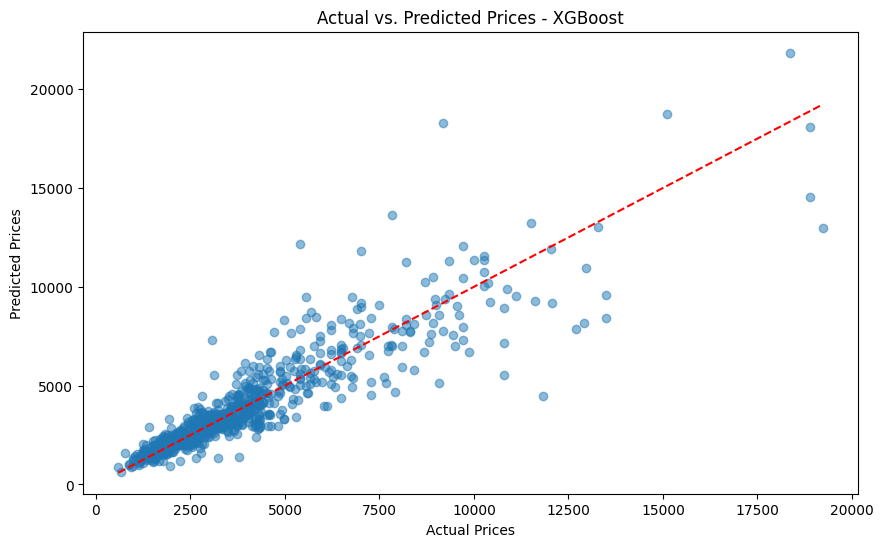

In [295]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices - XGBoost')
plt.show()

#### Residual Plot

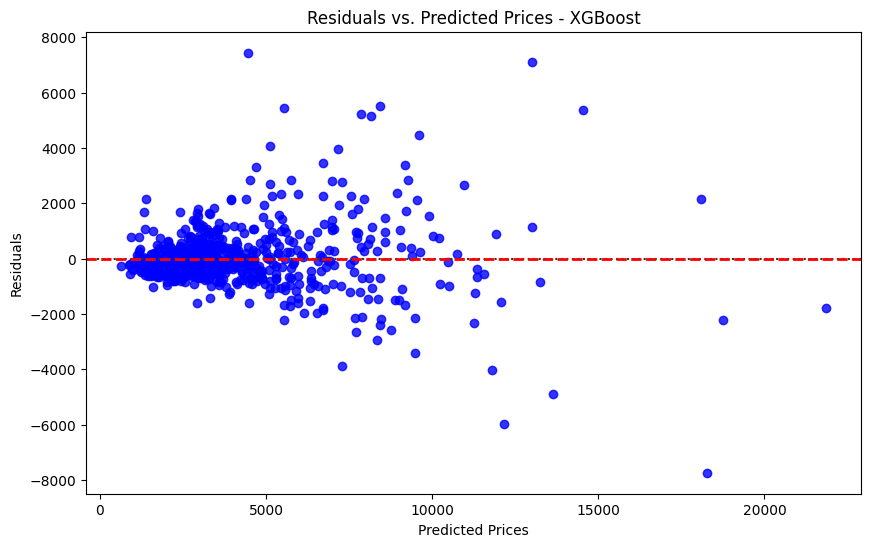

In [296]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, color='blue', 
               line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Prices - XGBoost')
plt.axhline(0, linestyle='--', color='red', linewidth=2)
plt.show()

## Cross Validation

In [297]:

from sklearn.model_selection import cross_val_score

models = {
    "Linear Regression": lr_model,
    "Decision Tree": dtr_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

# Initialize lists to store metrics
model_names = []
mean_maes = []
mean_mses = []
mean_r2s = []
correct_percentages_train = []
correct_percentages_test = []

# Define the threshold percentage
threshold_percentage = 0.10  # 10%
target_range = y.max() - y.min()
target_mean = y.mean()

# Evaluate each model using cross-validation
for model_name, model in models.items():
    # Cross-validation for MAE
    cv_scores_mae = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    cv_scores_mae = -cv_scores_mae  # Convert to positive MAE

    mean_mae = cv_scores_mae.mean()
    std_mae = cv_scores_mae.std()

    # Cross-validation for MSE
    cv_scores_mse = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores_mse = -cv_scores_mse  # Convert to positive MSE

    mean_mse = cv_scores_mse.mean()
    std_mse = cv_scores_mse.std()

    # Cross-validation for R²
    cv_scores_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    mean_r2 = cv_scores_r2.mean()
    std_r2 = cv_scores_r2.std()

    # Calculate MAE as a percentage of the target range and mean
    mae_percentage_range = (mean_mae / target_range) * 100
    mae_percentage_mean = (mean_mae / target_mean) * 100

    # Fit the model on the entire training set and make predictions on the test set
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)  # Predictions on training set
    y_pred_test = model.predict(X_test)    # Predictions on test set

    # Calculate the number of correct predictions for training set
    correct_predictions_train = np.abs(y_train - y_pred_train) <= (threshold_percentage * np.abs(y_train))
    correct_percentage_train = np.mean(correct_predictions_train) * 100

    # Calculate the number of correct predictions for test set
    correct_predictions_test = np.abs(y_test - y_pred_test) <= (threshold_percentage * np.abs(y_test))
    correct_percentage_test = np.mean(correct_predictions_test) * 100

    # Store the metrics
    model_names.append(model_name)
    mean_maes.append(mean_mae)
    mean_mses.append(mean_mse)
    mean_r2s.append(mean_r2)
    correct_percentages_train.append(correct_percentage_train)
    correct_percentages_test.append(correct_percentage_test)

    # print(f"{model_name} Cross-Validation MAE: {cv_scores_mae}")
    print(f"Mean Cross-Validation MAE for {model_name}: {mean_mae:.3f}")
    # print(f"Standard Deviation of Cross-Validation MAE for {model_name}: {std_mae:.3f}")
    # print(f"Mean MAE as Percentage of Target Range for {model_name}: {mae_percentage_range:.2f}%")
    # print(f"Mean MAE as Percentage of Target Mean for {model_name}: {mae_percentage_mean:.2f}%")
    print(f"Mean MSE across 5 folds for {model_name}: {mean_mse:.3f}")
    # print(f"Standard Deviation of MSE across 5 folds for {model_name}: {std_mse:.3f}")
    print(f"Mean R² across 5 folds for {model_name}: {mean_r2:.3f}")
    # print(f"Standard Deviation of R² across 5 folds for {model_name}: {std_r2:.3f}")
    print(f"Percentage of Correct Predictions on Training Set (within {threshold_percentage * 100:.0f}%): {correct_percentage_train:.2f}%")
    print(f"Percentage of Correct Predictions on Test Set (within {threshold_percentage * 100:.0f}%): {correct_percentage_test:.2f}%")

    print()


Mean Cross-Validation MAE for Linear Regression: 777.272
Mean MSE across 5 folds for Linear Regression: 5702140.056
Mean R² across 5 folds for Linear Regression: 0.347
Percentage of Correct Predictions on Training Set (within 10%): 41.18%
Percentage of Correct Predictions on Test Set (within 10%): 35.74%

Mean Cross-Validation MAE for Decision Tree: 813.723
Mean MSE across 5 folds for Decision Tree: 2088187.493
Mean R² across 5 folds for Decision Tree: 0.749
Percentage of Correct Predictions on Training Set (within 10%): 38.26%
Percentage of Correct Predictions on Test Set (within 10%): 36.38%

Mean Cross-Validation MAE for Random Forest: 713.860
Mean MSE across 5 folds for Random Forest: 1554196.496
Mean R² across 5 folds for Random Forest: 0.813
Percentage of Correct Predictions on Training Set (within 10%): 56.60%
Percentage of Correct Predictions on Test Set (within 10%): 38.40%

Mean Cross-Validation MAE for XGBoost: 667.275
Mean MSE across 5 folds for XGBoost: 1373191.219
Mean R²

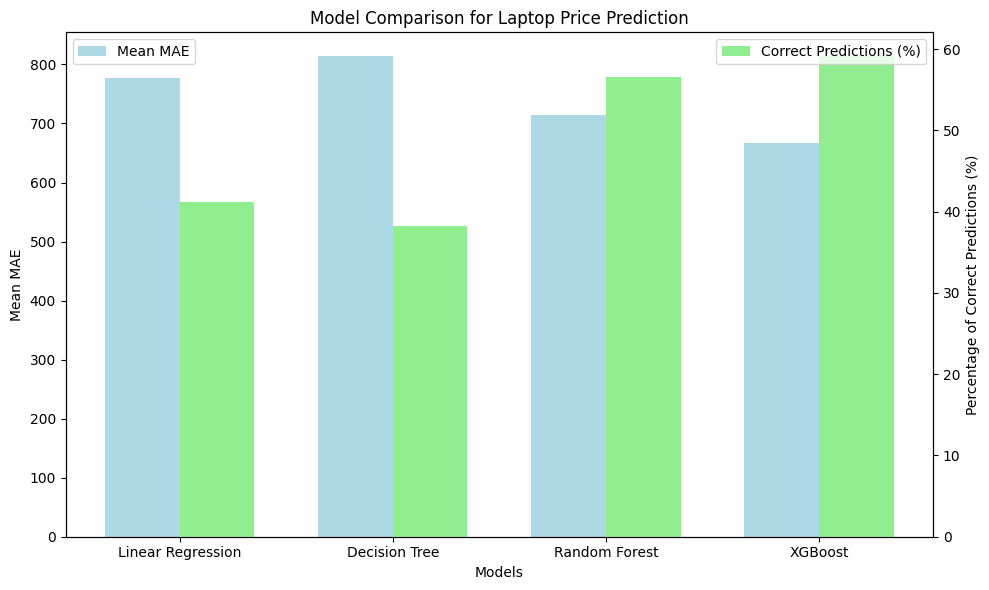

In [298]:
# Create a bar chart to compare the models
x = np.arange(len(model_names))  # the label locations
width = 0.35  # the width of the bars
fig, ax1 = plt.subplots(figsize=(10, 6))
# Create a bar chart for Mean MAE
bars1 = ax1.bar(x - width/2, mean_maes, width, label='Mean MAE', color='lightblue')
# Create a second y-axis to plot the percentage of correct predictions
ax2 = ax1.twinx()  
bars2 = ax2.bar(x + width/2, correct_percentages_train, width, label='Correct Predictions (%)', color='lightgreen')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_xlabel('Models')
ax1.set_ylabel('Mean MAE')
ax2.set_ylabel('Percentage of Correct Predictions (%)')
ax1.set_title('Model Comparison for Laptop Price Prediction')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
# Show the plot
plt.tight_layout()
plt.show()

In [299]:
df.head()

,Price,RAM,Ghz,Display,Adapter,GPU_Memory,RAM_Rank,Generation,Cores,Has_SSD,...,Ghz_to_Generation,Ghz_to_Storage,Ghz_times_Adapter,Ghz_times_GPU_Memory,Ghz_times_GPU_Performance,Ghz_times_Generation,Ghz_times_Storage,Small_Display,Medium_Display,Large_Display
0,1241.460,4,2.0,11.6,45.0,4.0,2,11.0,8.0,1,...,0.181818,0.031250,90.00,8.0,2.000,22.0,742.4,1,0,0
1,1959.606,8,4.0,15.6,65.0,4.0,2,11.0,6.0,1,...,0.363636,0.007812,260.00,16.0,2.000,44.0,7987.2,0,0,1
2,4239.000,16,3.3,15.6,56.0,4.0,1,12.0,8.0,1,...,0.275000,0.006445,184.80,13.2,0.825,39.6,7987.2,0,0,1
3,2996.460,8,4.2,15.6,7.3,4.0,2,12.0,8.0,1,...,0.350000,0.008203,30.66,16.8,2.100,50.4,7987.2,0,0,1
4,1187.460,8,1.7,15.6,45.0,4.0,2,11.0,8.0,1,...,0.154545,0.003320,76.50,6.8,0.850,18.7,7987.2,0,0,1


## Learning Curve

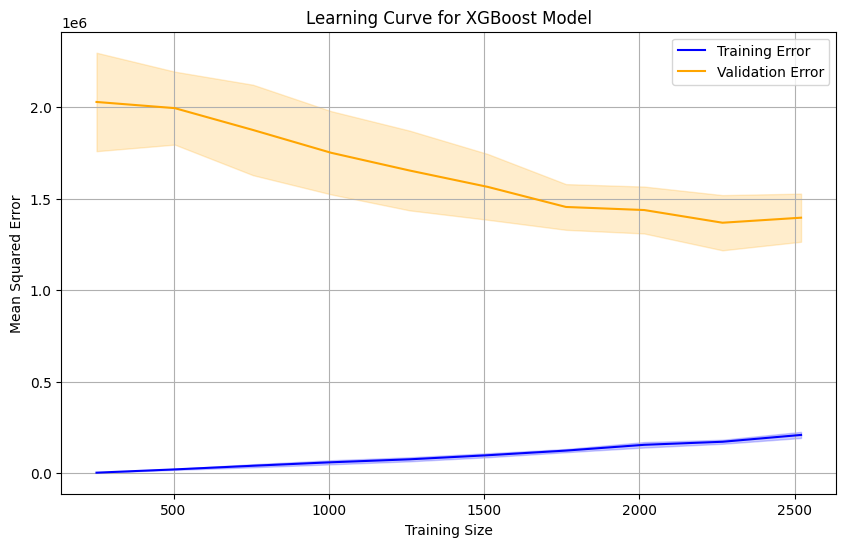

In [300]:
from sklearn.model_selection import learning_curve
# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X_train, y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    cv=5, 
    scoring='neg_mean_squared_error',  # You can change this to other metrics if needed
    n_jobs=-1
)
# Calculate the mean and standard deviation of training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)  # Negate to get positive MSE
test_scores_mean = -np.mean(test_scores, axis=1)    # Negate to get positive MSE
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Error', color='orange')
# Plot the standard deviation as a shaded area
plt.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, 
                 color='blue', alpha=0.2)
plt.fill_between(train_sizes, 
                 test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, 
                 color='orange', alpha=0.2)
# Adding labels and title
plt.title('Learning Curve for XGBoost Model')
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.grid()
plt.show()

## SHAP (SHapley Additive exPlanations)
Contributia fiecarei coloane la predictia modelului.

c:\Users\Ruben\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


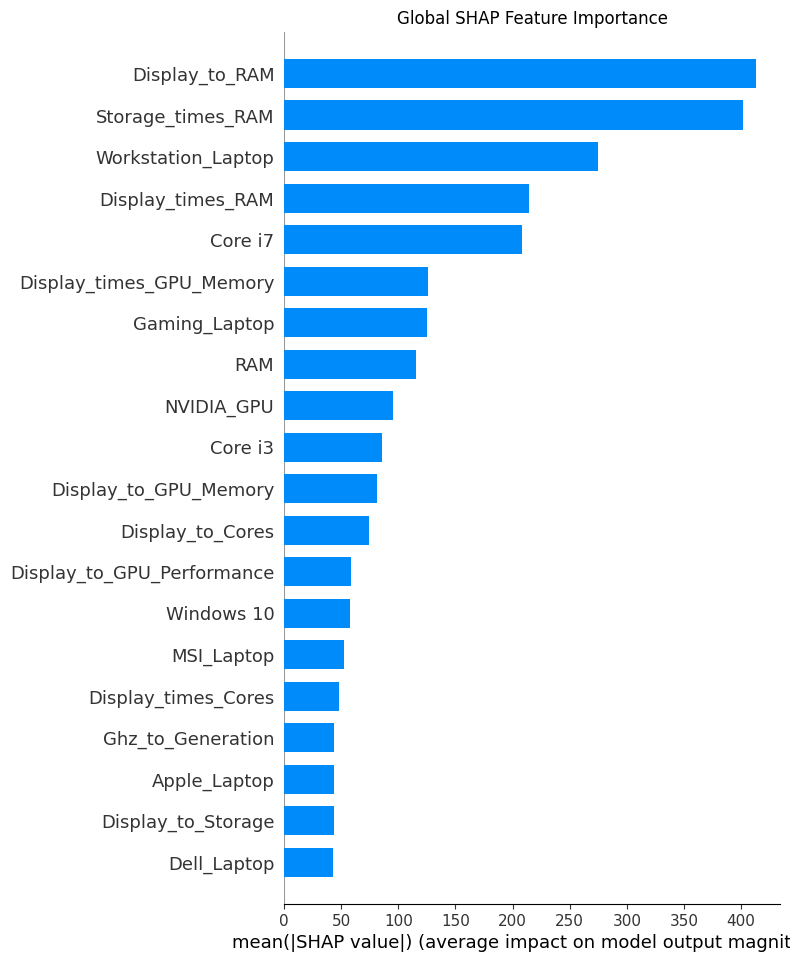

In [301]:

import shap
# SHAP Explanation
# Initialize the SHAP explainer
shap_explainer = shap.Explainer(xgb_model)
shap_values = shap_explainer(X_test)

# Global SHAP Summary Plot
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("Global SHAP Feature Importance")
plt.show()

In [302]:
# SHAP Explanation
# Initialize the SHAP explainer
shap_explainer = shap.Explainer(xgb_model)
shap_values = shap_explainer(X_test)
# Create a DataFrame to hold feature names and their corresponding mean absolute SHAP values
shap_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Mean SHAP Value': np.abs(shap_values.values).mean(axis=0)
})
# Sort the DataFrame by Mean SHAP Value in descending order
shap_df = shap_df.sort_values(by='Mean SHAP Value', ascending=False)
# Set pandas options to display all rows
pd.set_option('display.max_rows', None)  # None means unlimited
# Display the most important features in the terminal
print("Most Important Features based on SHAP Values:")
print(shap_df)
# Reset pandas options to default if needed
pd.reset_option('display.max_rows')


Most Important Features based on SHAP Values:
                            Feature  Mean SHAP Value
6                    Display_to_RAM       413.354401
2                 Storage_times_RAM       401.623962
4                Workstation_Laptop       274.800720
0                 Display_times_RAM       214.352982
25                          Core i7       208.203979
83         Display_times_GPU_Memory       126.167320
57                    Gaming_Laptop       125.032837
1                               RAM       115.683876
17                       NVIDIA_GPU        95.410233
32                          Core i3        85.483040
27            Display_to_GPU_Memory        81.472855
40                 Display_to_Cores        74.534897
16       Display_to_GPU_Performance        58.340431
71                       Windows 10        57.826576
53                       MSI_Laptop        52.474083
26              Display_times_Cores        47.721428
56                Ghz_to_Generation        44.023724


In [303]:
df.Display.unique()

array([11.6, 15.6, 14. , 16. , 17.3, 13.3, 16.1, 13.6, 14.2, 14.1, 15.3,
       13.4, 15. , 10.5, 13.5, 13. , 12.4, 16.2, 17. , 18. , 14.5, 12. ,
       10.1, 14.9, 11. , 12.3, 16.6, 12.2, 12.5, 15.4])

In [304]:
count_above_1000 = ((df['Price'] > 10000) ).sum()
print("Number of records above 1000 price:", count_above_1000)

Number of records above 1000 price: 153


### Partial Dependency Plot (PDP) 
Relatia dintre pret si caracteristici.

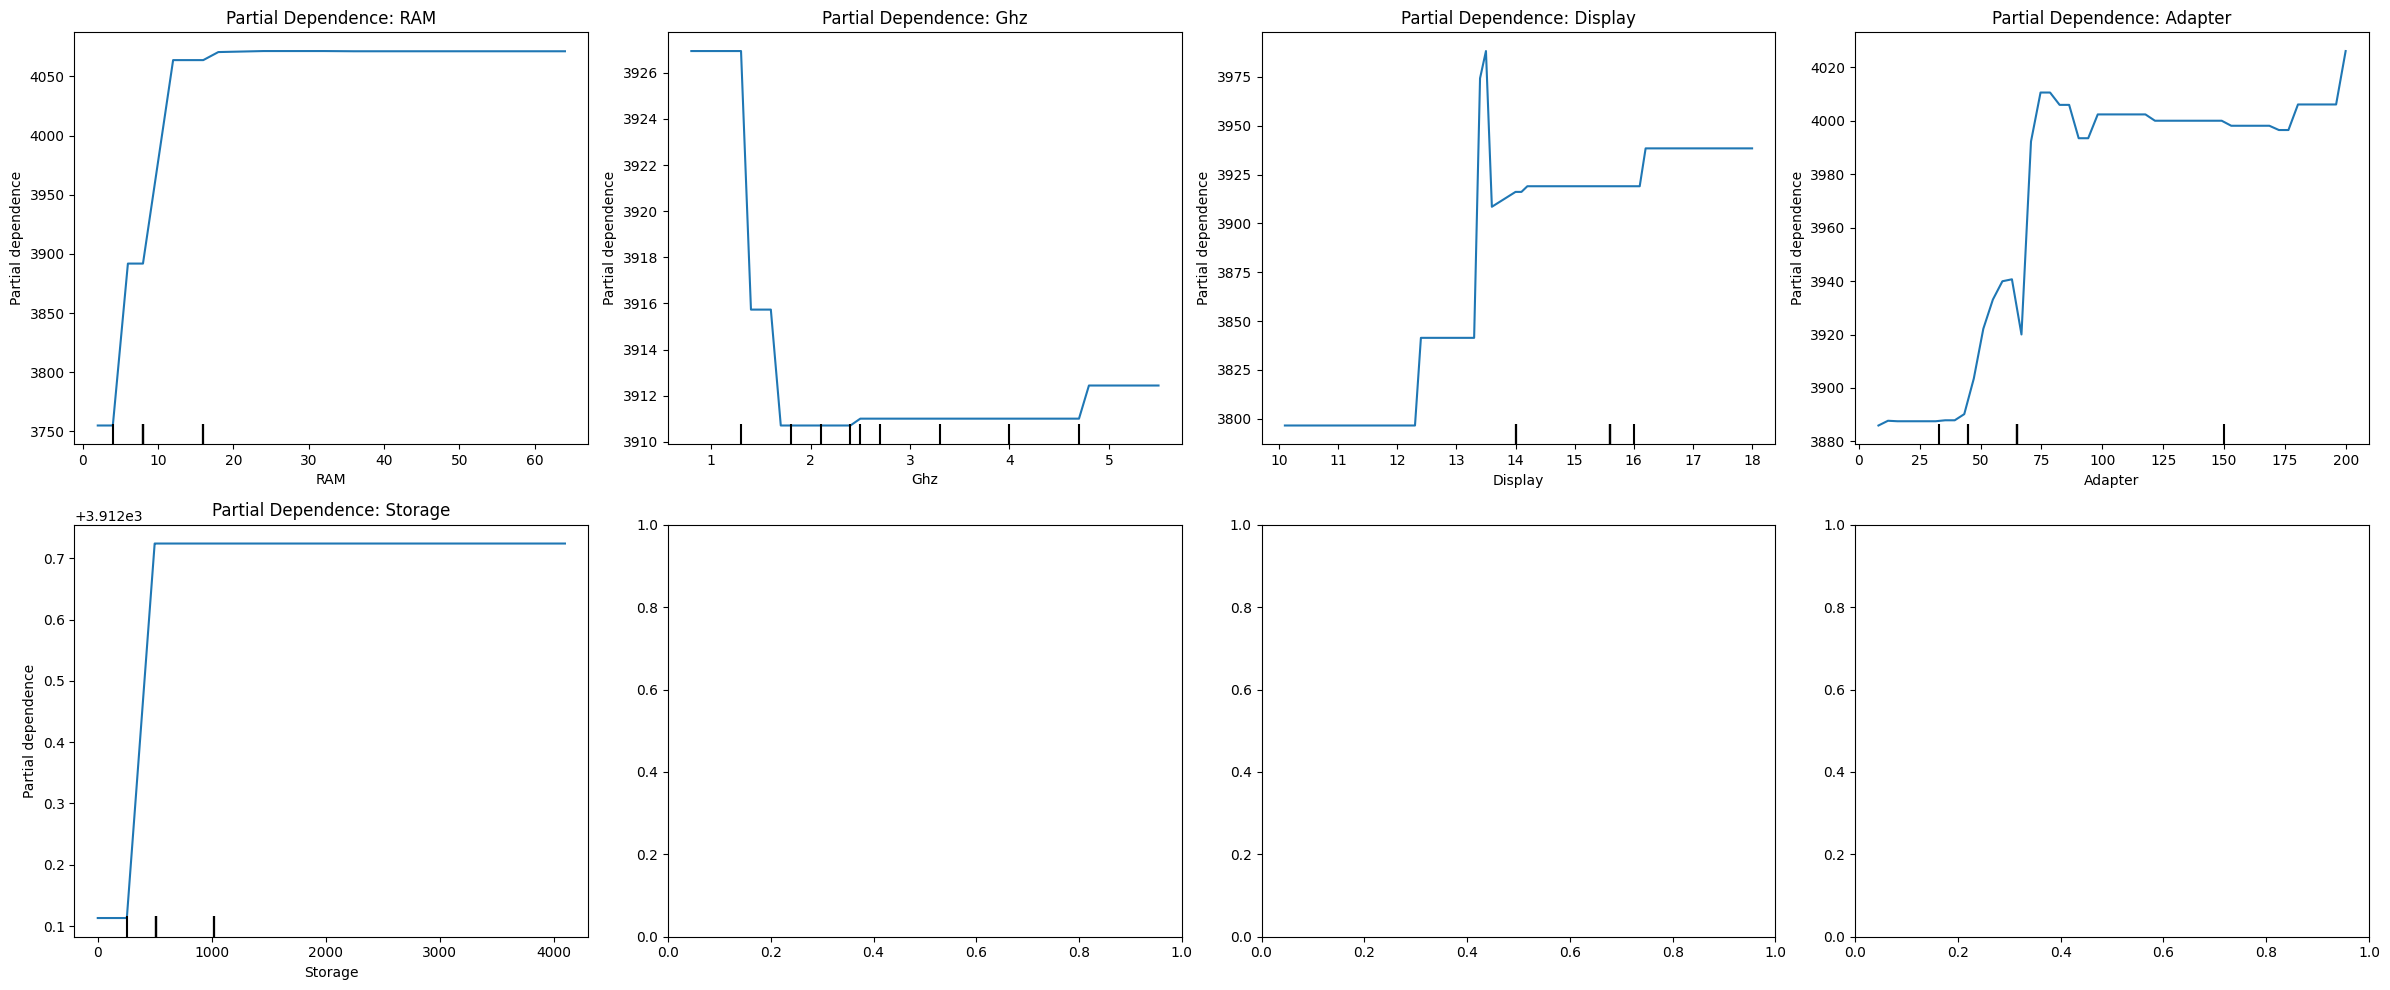

In [305]:
from sklearn.inspection import PartialDependenceDisplay
features = [ 'RAM', 'Ghz', 'Display', 'Adapter', 'Storage', ]

missing_features = [f for f in features if f not in X_train.columns]
if missing_features:
    raise ValueError(f"The following features are missing from X_train: {missing_features}")

fig, axes = plt.subplots(2, 4, figsize=(24, 10))
axes = axes.flatten()
for i, feature in enumerate(features):
    display = PartialDependenceDisplay.from_estimator(
        xgb_model,
        X_train,
        features=[feature],
        ax=axes[i],
        grid_resolution=50
    )
    axes[i].set_title(f'Partial Dependence: {feature}')
plt.tight_layout()
plt.show()

## Individual Conditional Expectation (ICE)

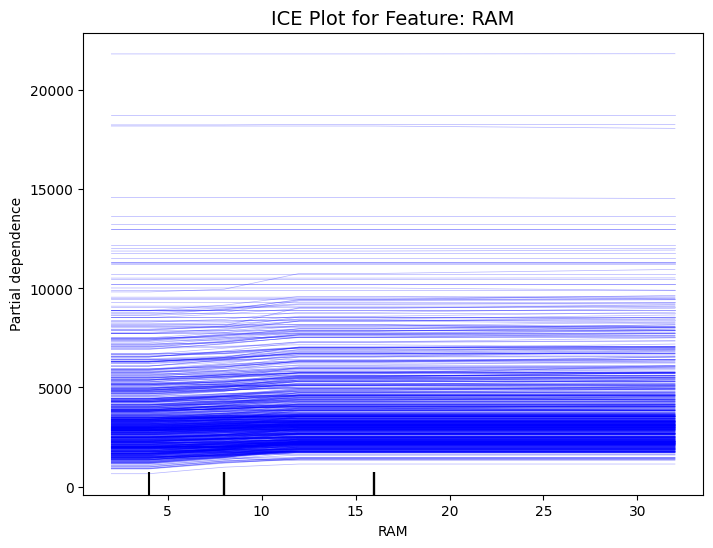

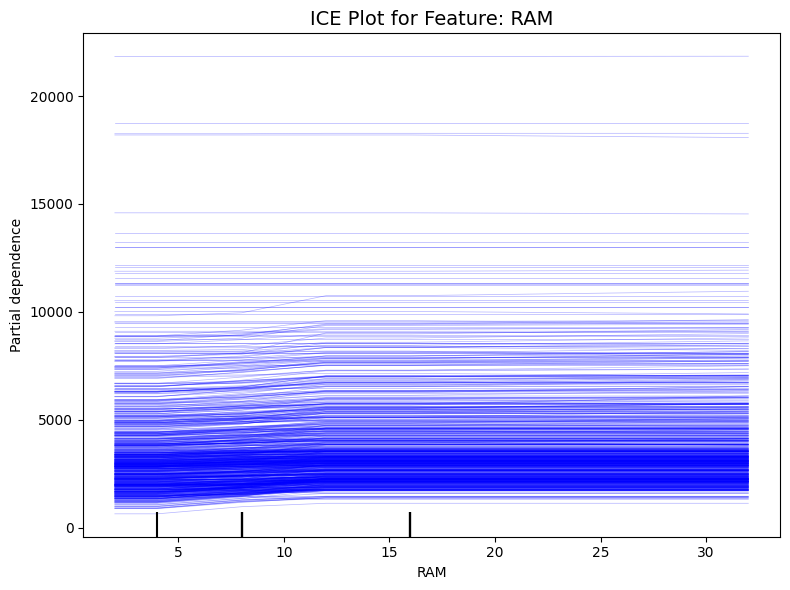

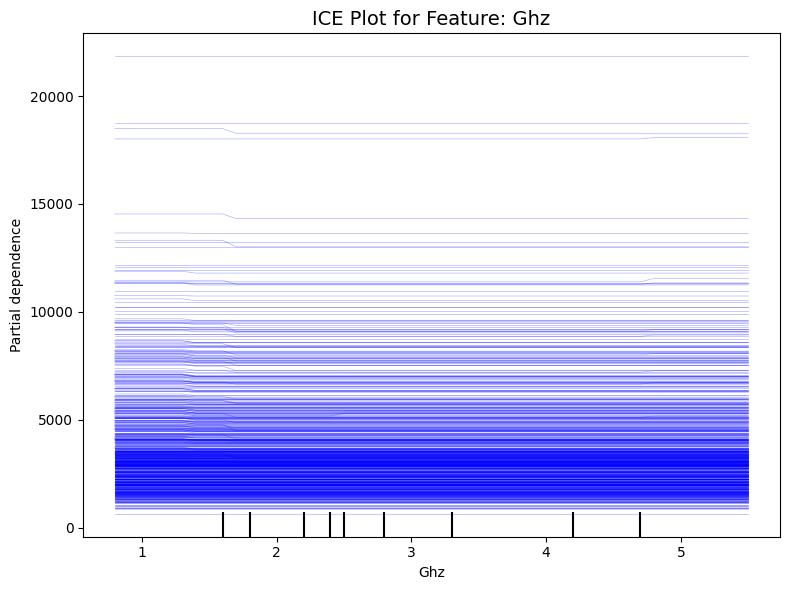

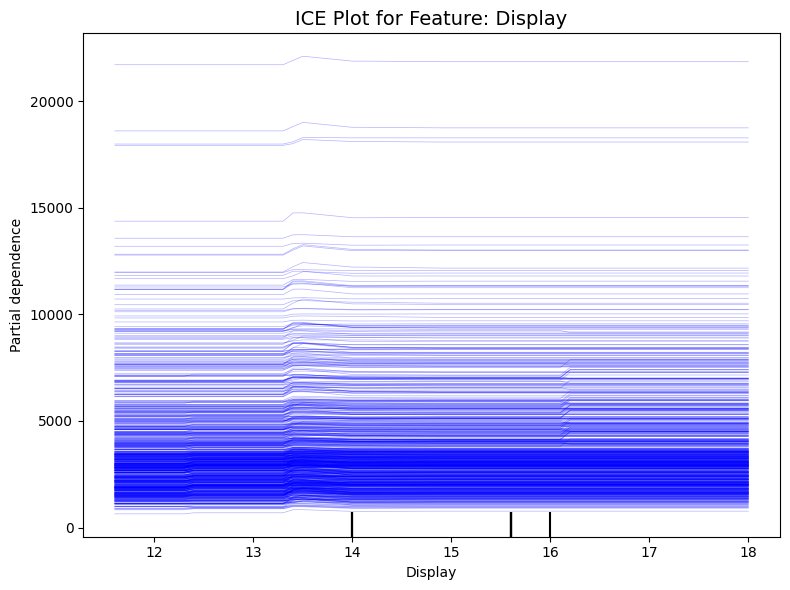

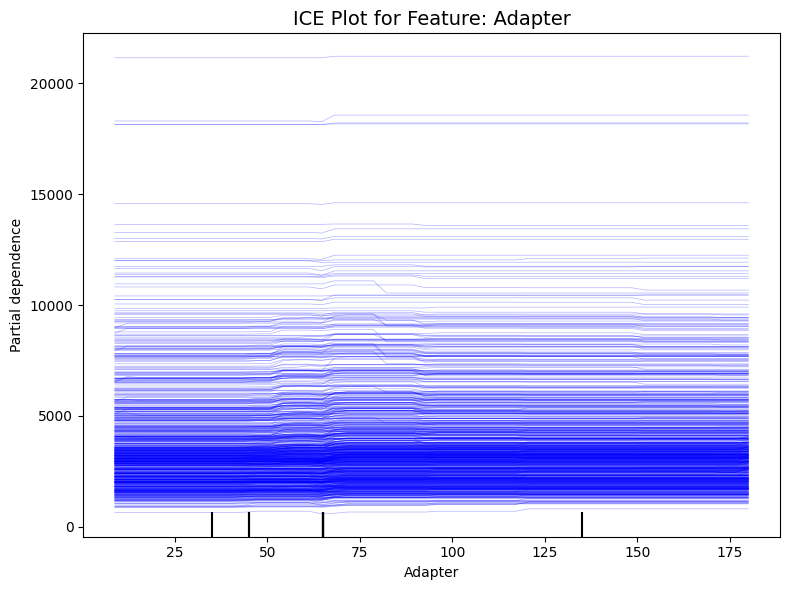

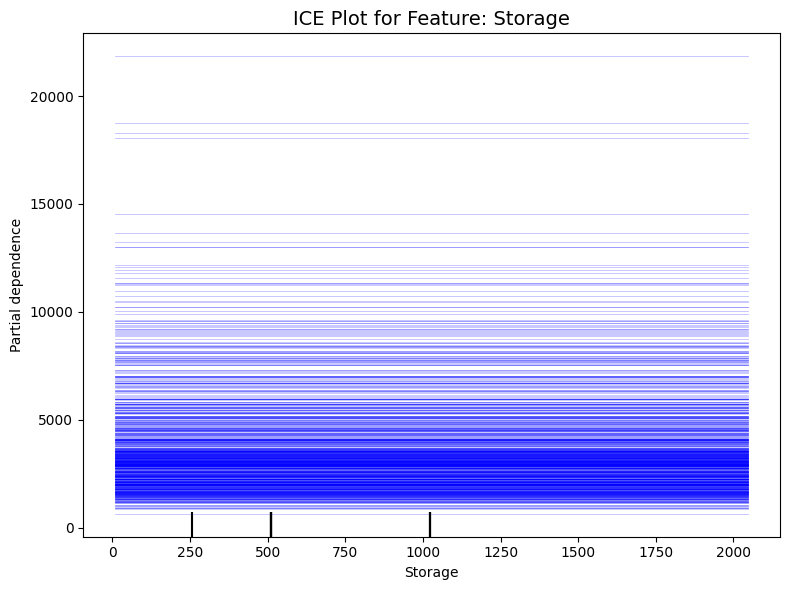

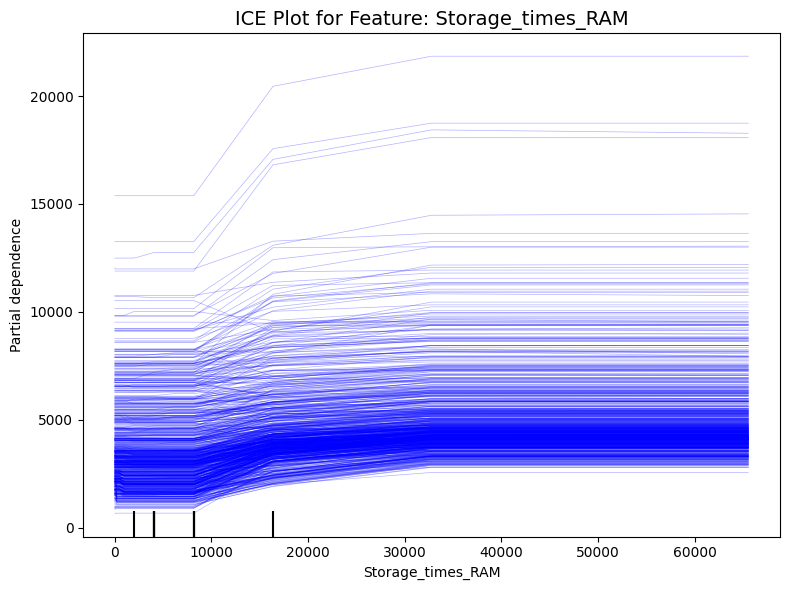

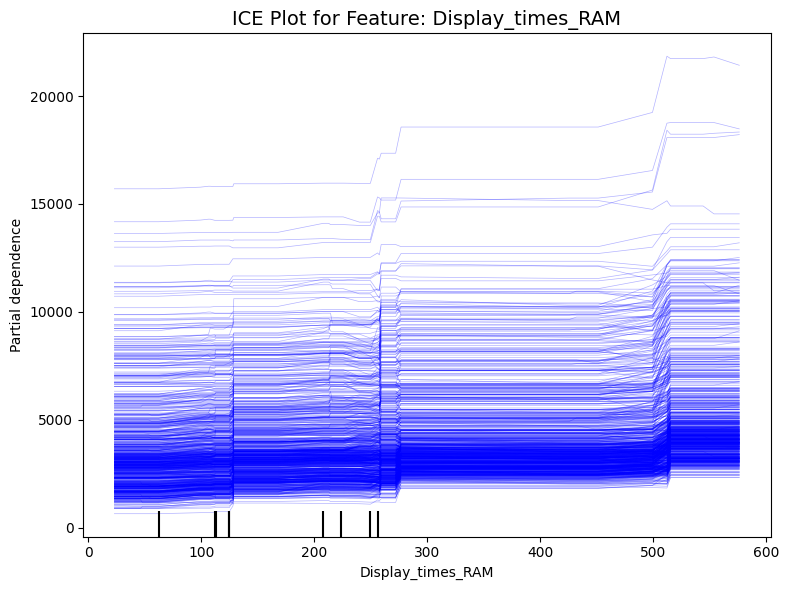

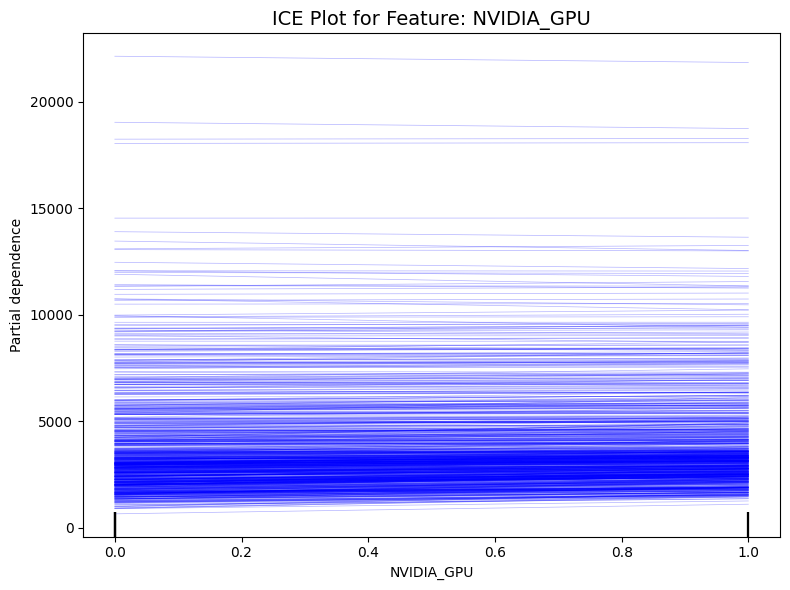

In [306]:
from pdpbox import pdp

# Create ICE plot for a specific feature
feature_name = 'RAM'  # Replace with the name of the feature you want to analyze
# Check if the feature exists in the dataset
if feature_name not in X.columns:
    raise ValueError(f"Feature '{feature_name}' not found in the dataset columns.")
# Create the ICE plot
fig, ax = plt.subplots(figsize=(8, 6))
display = PartialDependenceDisplay.from_estimator(
    xgb_model, 
    X_test, 
    features=[feature_name],     
    kind='individual',   # individual ICE lines
    ax=ax,
    grid_resolution=50,
    line_kw={'alpha':0.3, 'color':'blue'}
)
ax.set_title(f'ICE Plot for Feature: {feature_name}', fontsize=14)



xgb_model.fit(X_train, y_train)
# List of features for which to create ICE plots
features = ['RAM', 'Ghz', 'Display', 'Adapter', 'Storage', 'Storage_times_RAM', 'Display_times_RAM', 'NVIDIA_GPU']
# Loop through each feature and create an ICE plot
for feature_name in features:
    # Check if the feature exists in the dataset
    if feature_name not in X.columns:
        print(f"Feature '{feature_name}' not found in the dataset columns.")
        continue  # Skip to the next feature if not found
    # Create the ICE plot
    fig, ax = plt.subplots(figsize=(8, 6))
    display = PartialDependenceDisplay.from_estimator(
        xgb_model, 
        X_test, 
        features=[feature_name],     
        kind='individual',   # individual ICE lines
        ax=ax,
        grid_resolution=50,
        line_kw={'alpha': 0.3, 'color': 'blue'}
    )
    
    ax.set_title(f'ICE Plot for Feature: {feature_name}', fontsize=14)
    ax.set_ylabel('Predicted Target')
    ax.grid(True, linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    plt.show()  # Show the plot for the current feature